In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read data

In [2]:
file = open('LD2011_2014.txt', 'r')
content=file.readlines()
file.close()
content = [c.strip() for c in content]

In [3]:
file_path = 'LD2011_2014.txt'
df = pd.read_csv(file_path, sep=';', decimal=",")

# df = pd.read_csv('data/LD2011_2014.txt', sep=";", index_col=0, parse_dates=True, decimal=",")

In [4]:
df.columns = ['Time'] + list(df.columns[1:])
# Convert values in the 'Date' column to date variables
df['Time'] = pd.to_datetime(df['Time'])

In [5]:
df

Time    MT_001     MT_002    MT_003      MT_004  \
0      2011-01-01 00:15:00  0.000000   0.000000  0.000000    0.000000   
1      2011-01-01 00:30:00  0.000000   0.000000  0.000000    0.000000   
2      2011-01-01 00:45:00  0.000000   0.000000  0.000000    0.000000   
3      2011-01-01 01:00:00  0.000000   0.000000  0.000000    0.000000   
4      2011-01-01 01:15:00  0.000000   0.000000  0.000000    0.000000   
...                    ...       ...        ...       ...         ...   
140251 2014-12-31 23:00:00  2.538071  22.048364  1.737619  150.406504   
140252 2014-12-31 23:15:00  2.538071  21.337127  1.737619  166.666667   
140253 2014-12-31 23:30:00  2.538071  20.625889  1.737619  162.601626   
140254 2014-12-31 23:45:00  1.269036  21.337127  1.737619  166.666667   
140255 2015-01-01 00:00:00  2.538071  19.914651  1.737619  178.861789   

           MT_005      MT_006     MT_007      MT_008     MT_009  ...  \
0        0.000000    0.000000   0.000000    0.000000   0.000000  ...   
1        0.000000    0.000000   0.000000    0.000000   0.000000  ...   
2        0.000000    0.000000   0.000000    0.000000   0.000000  ...   
3        0.000000    0.000000   0.000000    0.000000   0.000000  ...   
4        0.000000    0.000000   0.000000    0.000000   0.000000  ...   
...           ...         ...        ...         ...        ...  ...   
140251  85.365854  303.571429  11.305822  282.828283  68.181818  ...   
140252  81.707317  324.404762  11.305822  252.525253  64.685315  ...   
140253  82.926829  318.452381  10.175240  242.424242  61.188811  ...   
140254  85.365854  285.714286  10.175240  225.589226  64.685315  ...   
140255  84.146341  279.761905  10.175240  249.158249  62.937063  ...   

            MT_361   MT_362       MT_363       MT_364     MT_365    MT_366  \
0         0.000000      0.0     0.000000     0.000000   0.000000  0.000000   
1         0.000000      0.0     0.000000     0.000000   0.000000  0.000000   
2         0.000000      0.0     0.000000     0.000000   0.000000  0.000000   
3         0.000000      0.0     0.000000     0.000000   0.000000  0.000000   
4         0.000000      0.0     0.000000     0.000000   0.000000  0.000000   
...            ...      ...          ...          ...        ...       ...   
140251  276.945039  28200.0  1616.033755  1363.636364  29.986962  5.851375   
140252  279.800143  28300.0  1569.620253  1340.909091  29.986962  9.947338   
140253  284.796574  27800.0  1556.962025  1318.181818  27.379400  9.362200   
140254  246.252677  28000.0  1443.037975   909.090909  26.075619  4.095963   
140255  188.436831  27800.0  1409.282700   954.545455  27.379400  4.095963   

            MT_367      MT_368      MT_369       MT_370  
0         0.000000    0.000000    0.000000     0.000000  
1         0.000000    0.000000    0.000000     0.000000  
2         0.000000    0.000000    0.000000     0.000000  
3         0.000000    0.000000    0.000000     0.000000  
4         0.000000    0.000000    0.000000     0.000000  
...            ...         ...         ...          ...  
140251  697.102722  176.961603  651.026393  7621.621622  
140252  671.641791  168.614357  669.354839  6702.702703  
140253  670.763828  153.589316  670.087977  6864.864865  
140254  664.618086  146.911519  646.627566  6540.540541  
140255  628.621598  131.886477  673.020528  7135.135135  

[140256 rows x 371 columns]

In [6]:
# find the maximum value
# df.iloc[:, 1:].max().max()
df[df.eq(192800).any(axis=1)]

Time    MT_001     MT_002    MT_003     MT_004  MT_005  \
56424 2012-08-10 18:15:00  2.538071  38.406828  1.737619  83.333333    50.0   

           MT_006     MT_007     MT_008     MT_009  ...      MT_361    MT_362  \
56424  196.428571  22.611645  350.16835  62.937063  ...  576.017131  192800.0   

            MT_363       MT_364      MT_365     MT_366      MT_367  \
56424  6308.016878  7431.818182  203.389831  40.959626  686.567164   

           MT_368       MT_369  MT_370  
56424  210.350584  1054.985337     0.0  

[1 rows x 371 columns]

In [7]:
# # view whole dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# # back to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [8]:
# check the first non-zero row for each column
df.apply(lambda col: (col != 0).idxmax() if (col != 0).any() else pd.NaT)

Time          0
MT_001    35040
MT_002    35040
MT_003    35040
MT_004    35040
          ...  
MT_366    35040
MT_367    35040
MT_368    35040
MT_369    35040
MT_370    70176
Length: 371, dtype: int64

In [9]:
# Clients have non-zero electricity consumption from 2011-2014
# - 2 because there is a group column and a time column
sum(df.iloc[0] != 0) - 1

158

## Aggregate to per hour (per day) and convert from kw to kwh

In [10]:
df_per_hour = df.copy()
df_per_hour['group'] = (df_per_hour.index // 4) + 1
value_columns = df_per_hour.columns[1:]
df_per_hour = df_per_hour.groupby('group').agg({'Time': 'last', **{col: 'sum' for col in value_columns}}).reset_index(drop=True)
df_per_hour[value_columns] = df_per_hour[value_columns] / 4
df_per_hour

Time    MT_001     MT_002    MT_003      MT_004  \
0     2011-01-01 01:00:00  0.000000   0.000000  0.000000    0.000000   
1     2011-01-01 02:00:00  0.000000   0.000000  0.000000    0.000000   
2     2011-01-01 03:00:00  0.000000   0.000000  0.000000    0.000000   
3     2011-01-01 04:00:00  0.000000   0.000000  0.000000    0.000000   
4     2011-01-01 05:00:00  0.000000   0.000000  0.000000    0.000000   
...                   ...       ...        ...       ...         ...   
35059 2014-12-31 20:00:00  1.903553  27.560455  1.737619  205.284553   
35060 2014-12-31 21:00:00  2.220812  24.359886  1.737619  178.353659   
35061 2014-12-31 22:00:00  2.538071  22.581792  1.737619  162.601626   
35062 2014-12-31 23:00:00  2.220812  22.048364  1.737619  157.520325   
35063 2015-01-01 00:00:00  2.220812  20.803698  1.737619  168.699187   

          MT_005      MT_006     MT_007      MT_008      MT_009  ...   MT_362  \
0       0.000000    0.000000   0.000000    0.000000    0.000000  ...      0.0   
1       0.000000    0.000000   0.000000    0.000000    0.000000  ...      0.0   
2       0.000000    0.000000   0.000000    0.000000    0.000000  ...      0.0   
3       0.000000    0.000000   0.000000    0.000000    0.000000  ...      0.0   
4       0.000000    0.000000   0.000000    0.000000    0.000000  ...      0.0   
...          ...         ...        ...         ...         ...  ...      ...   
35059  96.341463  383.184524  11.871114  345.117845  103.146853  ...  40925.0   
35060  89.939024  331.101190  11.305822  297.138047   87.849650  ...  39475.0   
35061  87.804878  316.964286  11.588468  268.518519   73.426573  ...  38550.0   
35062  84.756098  311.755952  11.305822  256.734007   70.804196  ...  33275.0   
35063  83.536585  302.083333  10.457886  242.424242   63.374126  ...  27975.0   

            MT_363       MT_364     MT_365    MT_366      MT_367      MT_368  \
0         0.000000     0.000000   0.000000  0.000000    0.000000    0.000000   
1         0.000000     0.000000   0.000000  0.000000    0.000000    0.000000   
2         0.000000     0.000000   0.000000  0.000000    0.000000    0.000000   
3         0.000000     0.000000   0.000000  0.000000    0.000000    0.000000   
4         0.000000     0.000000   0.000000  0.000000    0.000000    0.000000   
...            ...          ...        ...       ...         ...         ...   
35059  2194.092827  2392.045455  71.056063  4.973669  460.052678   40.066778   
35060  1646.624473  2085.227273  74.641460  4.095963  339.332748  131.469115   
35061  1647.679325  1426.136364  73.663625  4.388531  511.852502  165.275459   
35062  1628.691983  1363.636364  55.084746  7.606788  699.078139  196.160267   
35063  1494.725738  1130.681818  27.705346  6.875366  658.911326  150.250417   

           MT_369       MT_370    group  
0        0.000000     0.000000      1.0  
1        0.000000     0.000000      2.0  
2        0.000000     0.000000      3.0  
3        0.000000     0.000000      4.0  
4        0.000000     0.000000      5.0  
...           ...          ...      ...  
35059  691.165689  8729.729730  35060.0  
35060  680.718475  8216.216216  35061.0  
35061  661.840176  8297.297297  35062.0  
35062  677.419355  7527.027027  35063.0  
35063  664.772727  6810.810811  35064.0  

[35064 rows x 372 columns]

In [11]:
df_per_day = df.copy()
df_per_day['group'] = (df_per_day.index // 96) + 1
value_columns = df_per_day.columns[1:]
df_per_day = df_per_day.groupby('group').agg({'Time': 'first', **{col: 'sum' for col in value_columns}}).reset_index(drop=True)
df_per_day['Time'] = df_per_day['Time'].dt.date
df_per_day[value_columns] = df_per_day[value_columns] / 4
df_per_day.drop(columns=['group'], inplace=True)
df_per_day

Time     MT_001      MT_002     MT_003       MT_004       MT_005  \
0     2011-01-01   0.000000    0.000000   0.000000     0.000000     0.000000   
1     2011-01-02   0.000000    0.000000   0.000000     0.000000     0.000000   
2     2011-01-03   0.000000    0.000000   0.000000     0.000000     0.000000   
3     2011-01-04   0.000000    0.000000   0.000000     0.000000     0.000000   
4     2011-01-05   0.000000    0.000000   0.000000     0.000000     0.000000   
...          ...        ...         ...        ...          ...          ...   
1456  2014-12-27  53.299492  536.273115  44.309296  3740.853659  1838.719512   
1457  2014-12-28  56.789340  532.894737  37.793223  3570.121951  1696.646341   
1458  2014-12-29  62.182741  553.342817  40.182450  3523.882114  1797.865854   
1459  2014-12-30  58.058376  551.386913  41.268462  3577.743902  1796.646341   
1460  2014-12-31  57.423858  568.100996  41.702867  3498.475610  1754.573171   

           MT_006      MT_007       MT_008       MT_009  ...       MT_361  \
0        0.000000    0.000000     0.000000     0.000000  ...     0.000000   
1        0.000000    0.000000     0.000000     0.000000  ...     0.000000   
2        0.000000    0.000000     0.000000     0.000000  ...     0.000000   
3        0.000000    0.000000     0.000000     0.000000  ...     0.000000   
4        0.000000    0.000000     0.000000     0.000000  ...     0.000000   
...           ...         ...          ...          ...  ...          ...   
1456  5526.785714  125.918598  7186.868687  1490.384615  ...  7065.488936   
1457  5034.970238  107.687959  6309.764310  1279.283217  ...  7203.604568   
1458  5718.750000  137.789712  7590.067340  1673.513986  ...  7190.399714   
1459  5965.773810  147.117015  7728.956229  1623.688811  ...  7124.910778   
1460  5880.952381  173.261730  7153.198653  1553.321678  ...  6743.397573   

        MT_362        MT_363        MT_364       MT_365      MT_366  \
0          0.0      0.000000      0.000000     0.000000    0.000000   
1          0.0      0.000000      0.000000     0.000000    0.000000   
2          0.0      0.000000      0.000000     0.000000    0.000000   
3          0.0      0.000000      0.000000     0.000000    0.000000   
4          0.0      0.000000      0.000000     0.000000    0.000000   
...        ...           ...           ...          ...         ...   
1456  789025.0  54808.016878  65227.272727  2109.843546  171.299005   
1457  818000.0  55137.130802  64363.636364  2042.372881  138.092452   
1458  777175.0  51740.506329  67295.454545  2108.213820  298.273844   
1459  726125.0  51022.151899  65926.136364  2654.172099  214.160328   
1460  686425.0  40570.675105  53892.045455  1837.353325  131.655939   

            MT_367       MT_368        MT_369         MT_370  
0         0.000000     0.000000      0.000000       0.000000  
1         0.000000     0.000000      0.000000       0.000000  
2         0.000000     0.000000      0.000000       0.000000  
3         0.000000     0.000000      0.000000       0.000000  
4         0.000000     0.000000      0.000000       0.000000  
...            ...          ...           ...            ...  
1456  13324.846356  1907.345576  17730.205279  359837.837838  
1457  11488.147498  1104.757930  16532.807918  389000.000000  
1458  13506.145742  3267.111853  18471.957478  451418.918919  
1459  14087.576822  4002.086811  18497.983871  466878.378378  
1460  12529.850746  3287.145242  17589.626100  338972.972973  

[1461 rows x 371 columns]

In [12]:
df_per_day.to_csv('electricity_data.csv', index=False)

In [13]:
# Clients have non-zero electricity consumption from 2011-2014 
# - 2 because there is a group column and a time column
sum(df_per_day.iloc[0] != 0) - 2

157

## Visualization of Data

### Consumptions Per Day

In [14]:
# Convert the 'Time' column to datetime if it's not already
df_per_day_vis = df_per_day.copy()
df_per_day_vis['Time'] = pd.to_datetime(df_per_day_vis['Time'])

# Set the 'Time' column as the index
df_per_day_vis.set_index('Time', inplace=True)

array([<Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>], dtype=object)

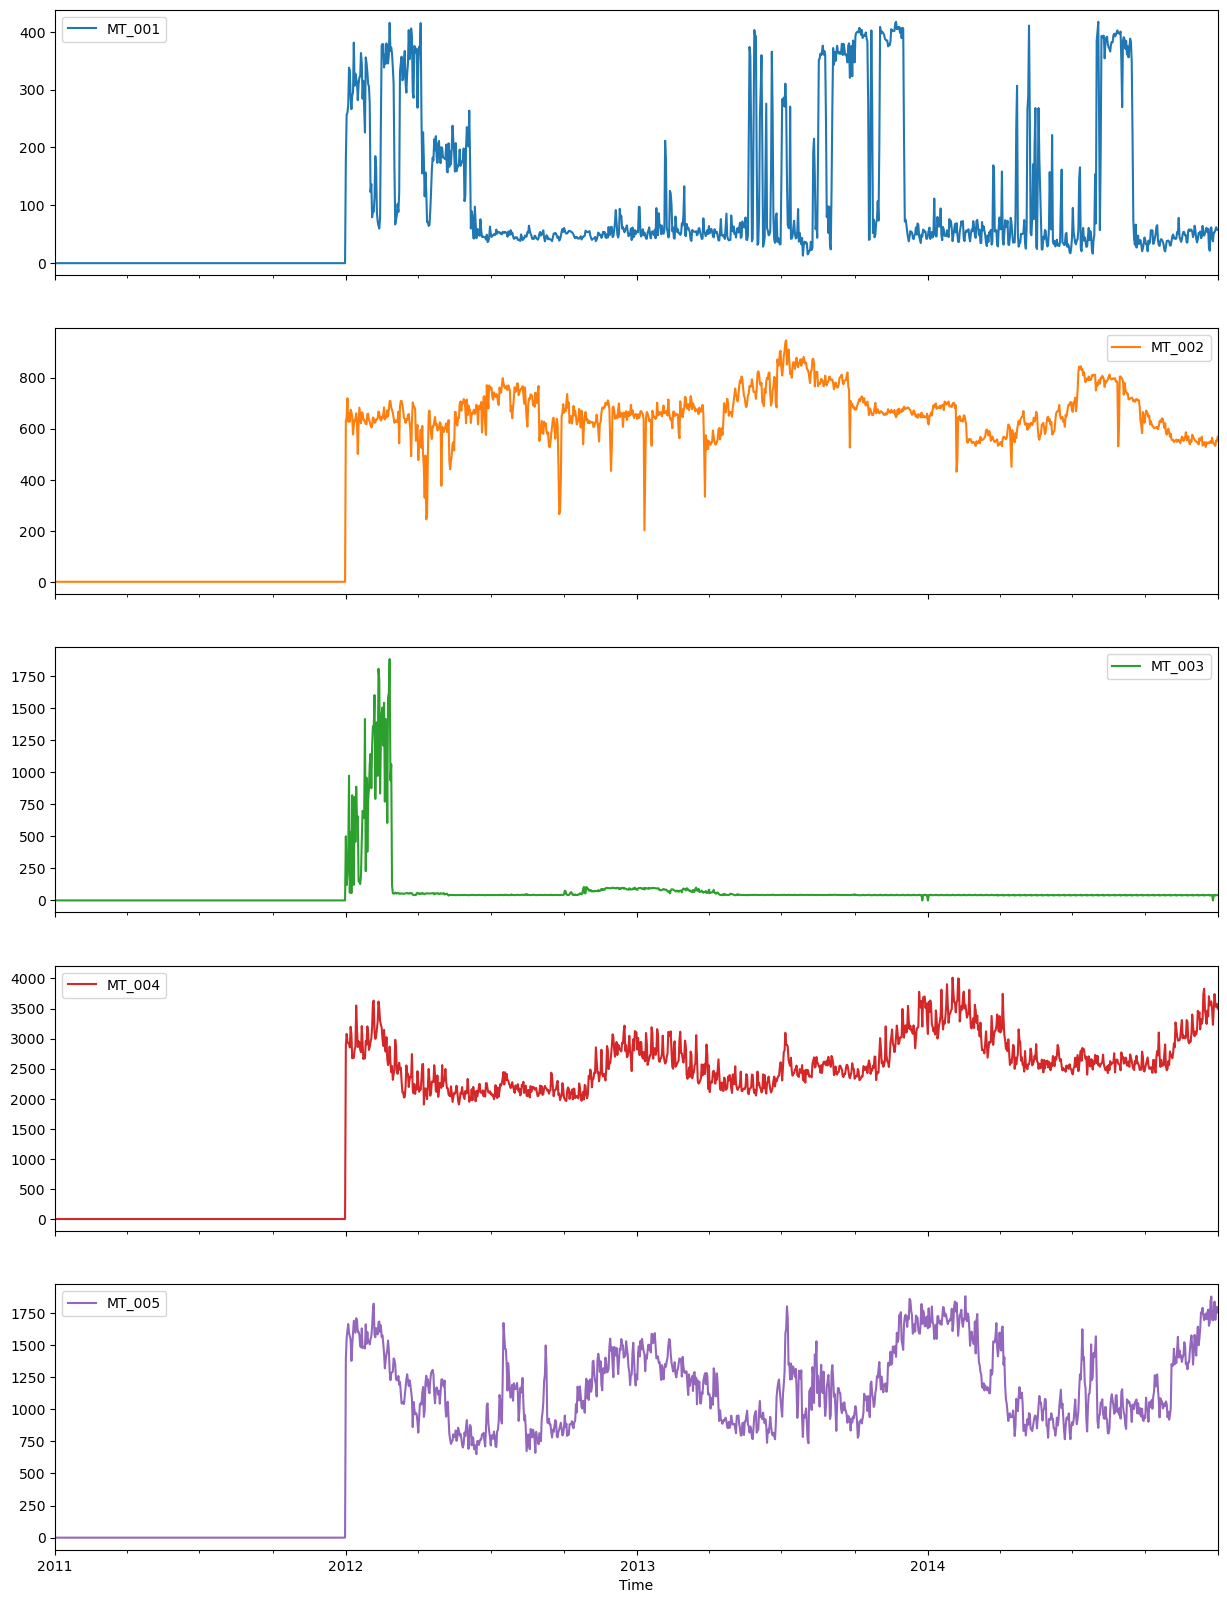

In [15]:
# Plot the top five time series
df_per_day_vis.iloc[:, :5].plot(subplots=True, figsize=(15, 20))

Text(0.5, 1.0, 'The Graph of Electricity Consumption per Day 2011-2014 for Client 1')

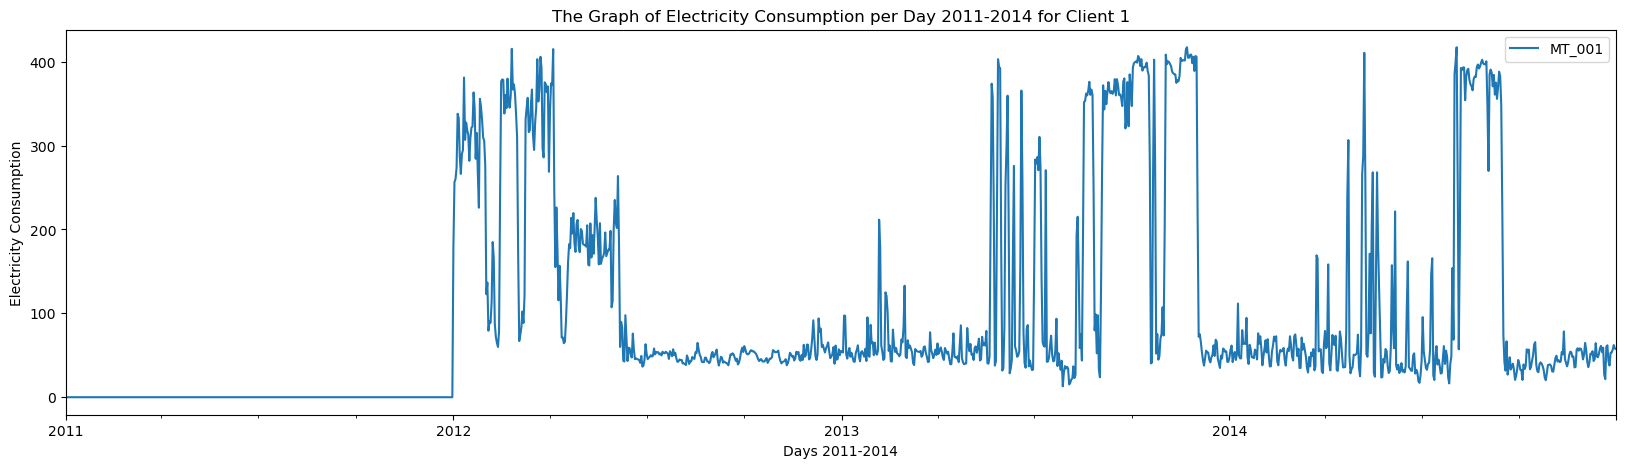

In [16]:
# Plot the first time series
df_per_day_vis.iloc[:, :1].plot(figsize=(20, 5))
plt.xlabel('Days 2011-2014')
plt.ylabel('Electricity Consumption')
plt.title('The Graph of Electricity Consumption per Day 2011-2014 for Client 1')

Text(0.5, 1.0, 'Clients Electricity per Day')

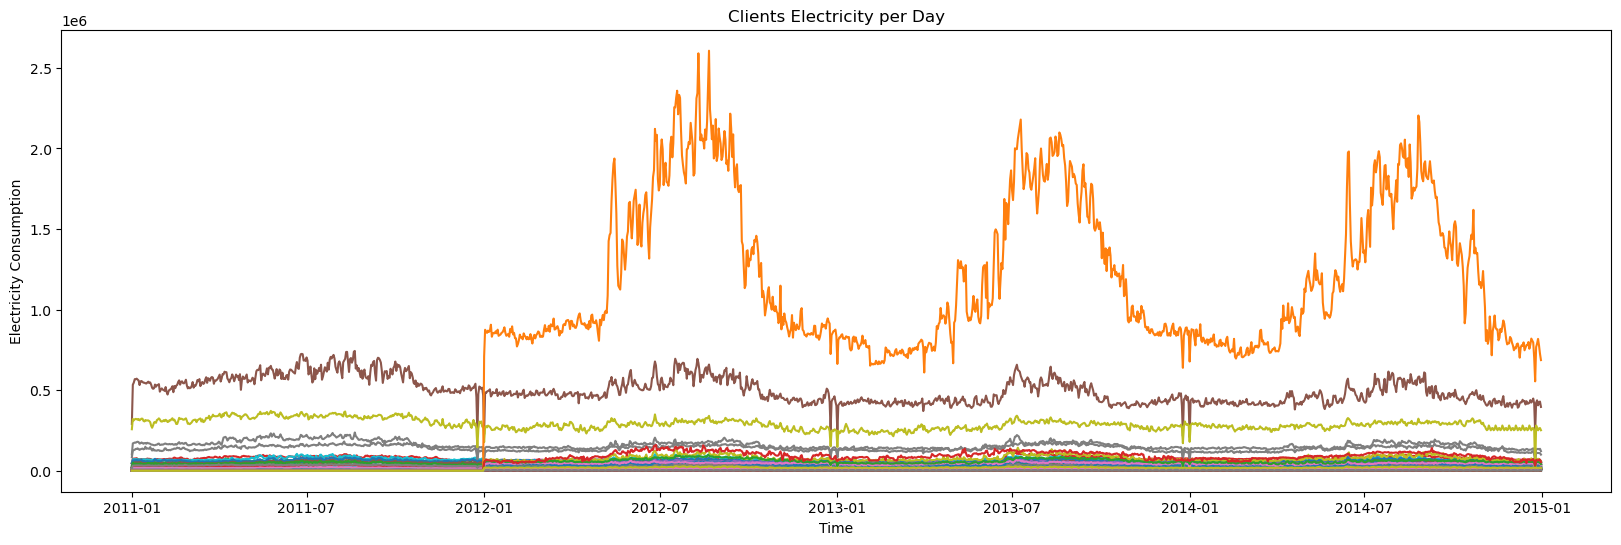

In [17]:
# Plot all time series
plt.figure(figsize=(20, 6))
for column in df_per_day.columns[1:-1]:
    plt.plot(df_per_day['Time'], df_per_day[column], label=column)

plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.title('Clients Electricity per Day')

## Do clustering

In [18]:
#pip install scipy tslearn

df_per_day

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

# Extract time series values and time stamps-using consumption per day
# df_new = df_per_day_for_cluster.iloc[:, 1:-1].transpose().copy()
df_new = df_per_day.iloc[:, 1:-1].transpose().copy()
df_new.columns = df_per_day.iloc[:, 0]
# len(time_series_values[0]) is 1461
# len(time_series_values) is 158

time_series_values = df_new.values
time_stamps = pd.to_datetime(df_per_day[730:].iloc[:, 0], format='%Y-%m-%d %H:%M:%S')

# Normalize or scale the time series data
scaled_values = time_series_values.copy()
for i in range(len(time_series_values)):
    scaler = MinMaxScaler()
    scaled_values[i] = scaler.fit_transform(time_series_values[i].reshape(-1,1)).flatten()

In [20]:
scaled_values

array([[0.        , 0.        , 0.        , ..., 0.14904943, 0.1391635 ,
        0.13764259],
       [0.        , 0.        , 0.        , ..., 0.58496241, 0.58289474,
        0.60056391],
       [0.        , 0.        , 0.        , ..., 0.02135765, 0.02193489,
        0.02216578],
       ...,
       [0.        , 0.        , 0.        , ..., 0.71712934, 0.74800131,
        0.66529147],
       [0.        , 0.        , 0.        , ..., 0.69182501, 0.84745913,
        0.69606717],
       [0.        , 0.        , 0.        , ..., 0.6584456 , 0.65937333,
        0.62699429]])

In [21]:
 %pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Find optimal number of clusters

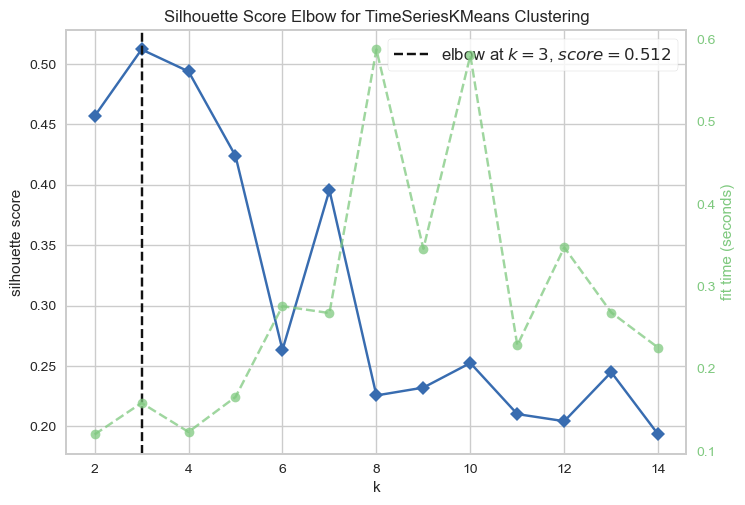

<Axes: title={'center': 'Silhouette Score Elbow for TimeSeriesKMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.style import set_palette
from yellowbrick.style.palettes import PALETTES

set_palette(PALETTES['accent'])  

model = TimeSeriesKMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings= True, colors=['blue', 'green', 'red', 'orange', 'purple'])

visualizer.fit(scaled_values)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
# Apply Time Series K-Means clustering
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", verbose=True, max_iter=10, random_state=42)
cluster_assignments = kmeans.fit_predict(scaled_values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 369 out of 369 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1107 out of 1107 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1107 out of 1107 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1107 out of 1107 | elapsed:   17.6s finished


8.872 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1107 out of 1107 | elapsed:   17.5s finished


5.121 --> 

In [ ]:
cluster_assignments

In [ ]:
print(cluster_assignments[1])
print(cluster_assignments[181])
print(cluster_assignments[0])

## Checking Stationarity [Augmented Dickey-Fuller Test]

In [137]:
df_1.rename(columns={'Time': 'ds', 'MT_002': 'y'}, inplace=True)
df_2.rename(columns={'Time': 'ds', 'MT_182': 'y'}, inplace=True)
df_3.rename(columns={'Time': 'ds', 'MT_001': 'y'}, inplace=True)

In [138]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on the 'y' column of df_1
result = adfuller(df_1['y'])

# Output the results of the ADF test
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result
adf_results = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Used Lag": used_lag,
    "Number of Observations": n_obs,
    "Critical Values": critical_values,
    "Information Criterion": ic_best
}
adf_results

{'ADF Statistic': -1.977277519802678,
 'p-value': 0.2966241133017994,
 'Used Lag': 5,
 'Number of Observations': 1455,
 'Critical Values': {'1%': -3.4348523191002123,
  '5%': -2.8635284734563364,
  '10%': -2.567828646449617},
 'Information Criterion': 14781.54274843259}

In [139]:
# Augmented Dickey-Fuller test on the 'y' column of df_1
result = adfuller(df_2['y'])

# Output the results of the ADF test
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result
adf_results = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Used Lag": used_lag,
    "Number of Observations": n_obs,
    "Critical Values": critical_values,
    "Information Criterion": ic_best
}
adf_results

{'ADF Statistic': -2.5974121424699415,
 'p-value': 0.09353330542838084,
 'Used Lag': 9,
 'Number of Observations': 1451,
 'Critical Values': {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 'Information Criterion': 15475.92929776032}

In [140]:
# Augmented Dickey-Fuller test on the 'y' column of df_1
result = adfuller(df_3['y'])

# Output the results of the ADF test
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result
adf_results = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Used Lag": used_lag,
    "Number of Observations": n_obs,
    "Critical Values": critical_values,
    "Information Criterion": ic_best
}
adf_results

{'ADF Statistic': -3.9914120032297173,
 'p-value': 0.0014561541869830437,
 'Used Lag': 16,
 'Number of Observations': 1444,
 'Critical Values': {'1%': -3.434886677803751,
  '5%': -2.8635436366589673,
  '10%': -2.5678367211155533},
 'Information Criterion': 14684.892179778903}

#### Make df_1 and df_2 stationary

In [142]:
# Apply first differencing to make the series stationary
df_1['y_diff'] = df_1['y'].diff()

# Drop the first NaN value that now appears in the dataset after differencing
df_1.dropna(inplace=True)

# Display the first few rows to confirm changes
df_1.head()

ds    y  y_diff
1 2011-01-02  0.0     0.0
2 2011-01-03  0.0     0.0
3 2011-01-04  0.0     0.0
4 2011-01-05  0.0     0.0
5 2011-01-06  0.0     0.0

In [143]:
# Apply first differencing to make the series stationary
df_2['y_diff'] = df_2['y'].diff()

# Drop the first NaN value that now appears in the dataset after differencing
df_2.dropna(inplace=True)

# Display the first few rows to confirm changes
df_2.head()

ds            y      y_diff
1 2011-01-02  1149.622016  215.361406
2 2011-01-03  1143.015584   -6.606432
3 2011-01-04  1125.699602  -17.315981
4 2011-01-05  1285.266910  159.567308
5 2011-01-06  1363.849469   78.582560

### Checking Stationarity Again

In [146]:
# Augmented Dickey-Fuller test on the 'y' column of df_1
result = adfuller(df_1['y_diff'])

# Output the results of the ADF test
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result
adf_results = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Used Lag": used_lag,
    "Number of Observations": n_obs,
    "Critical Values": critical_values,
    "Information Criterion": ic_best
}
adf_results

{'ADF Statistic': -23.205827424913217,
 'p-value': 0.0,
 'Used Lag': 4,
 'Number of Observations': 1455,
 'Critical Values': {'1%': -3.4348523191002123,
  '5%': -2.8635284734563364,
  '10%': -2.567828646449617},
 'Information Criterion': 14774.336351217129}

In [147]:
# Augmented Dickey-Fuller test on the 'y' column of df_1
result = adfuller(df_2['y_diff'])

# Output the results of the ADF test
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result
adf_results = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Used Lag": used_lag,
    "Number of Observations": n_obs,
    "Critical Values": critical_values,
    "Information Criterion": ic_best
}
adf_results

{'ADF Statistic': -16.39981253296912,
 'p-value': 2.644850947519408e-29,
 'Used Lag': 9,
 'Number of Observations': 1450,
 'Critical Values': {'1%': -3.4348678719530934,
  '5%': -2.863535337271721,
  '10%': -2.5678323015457787},
 'Information Criterion': 15471.19372295788}

## Data Analysis

### Peicewise Linear Fit

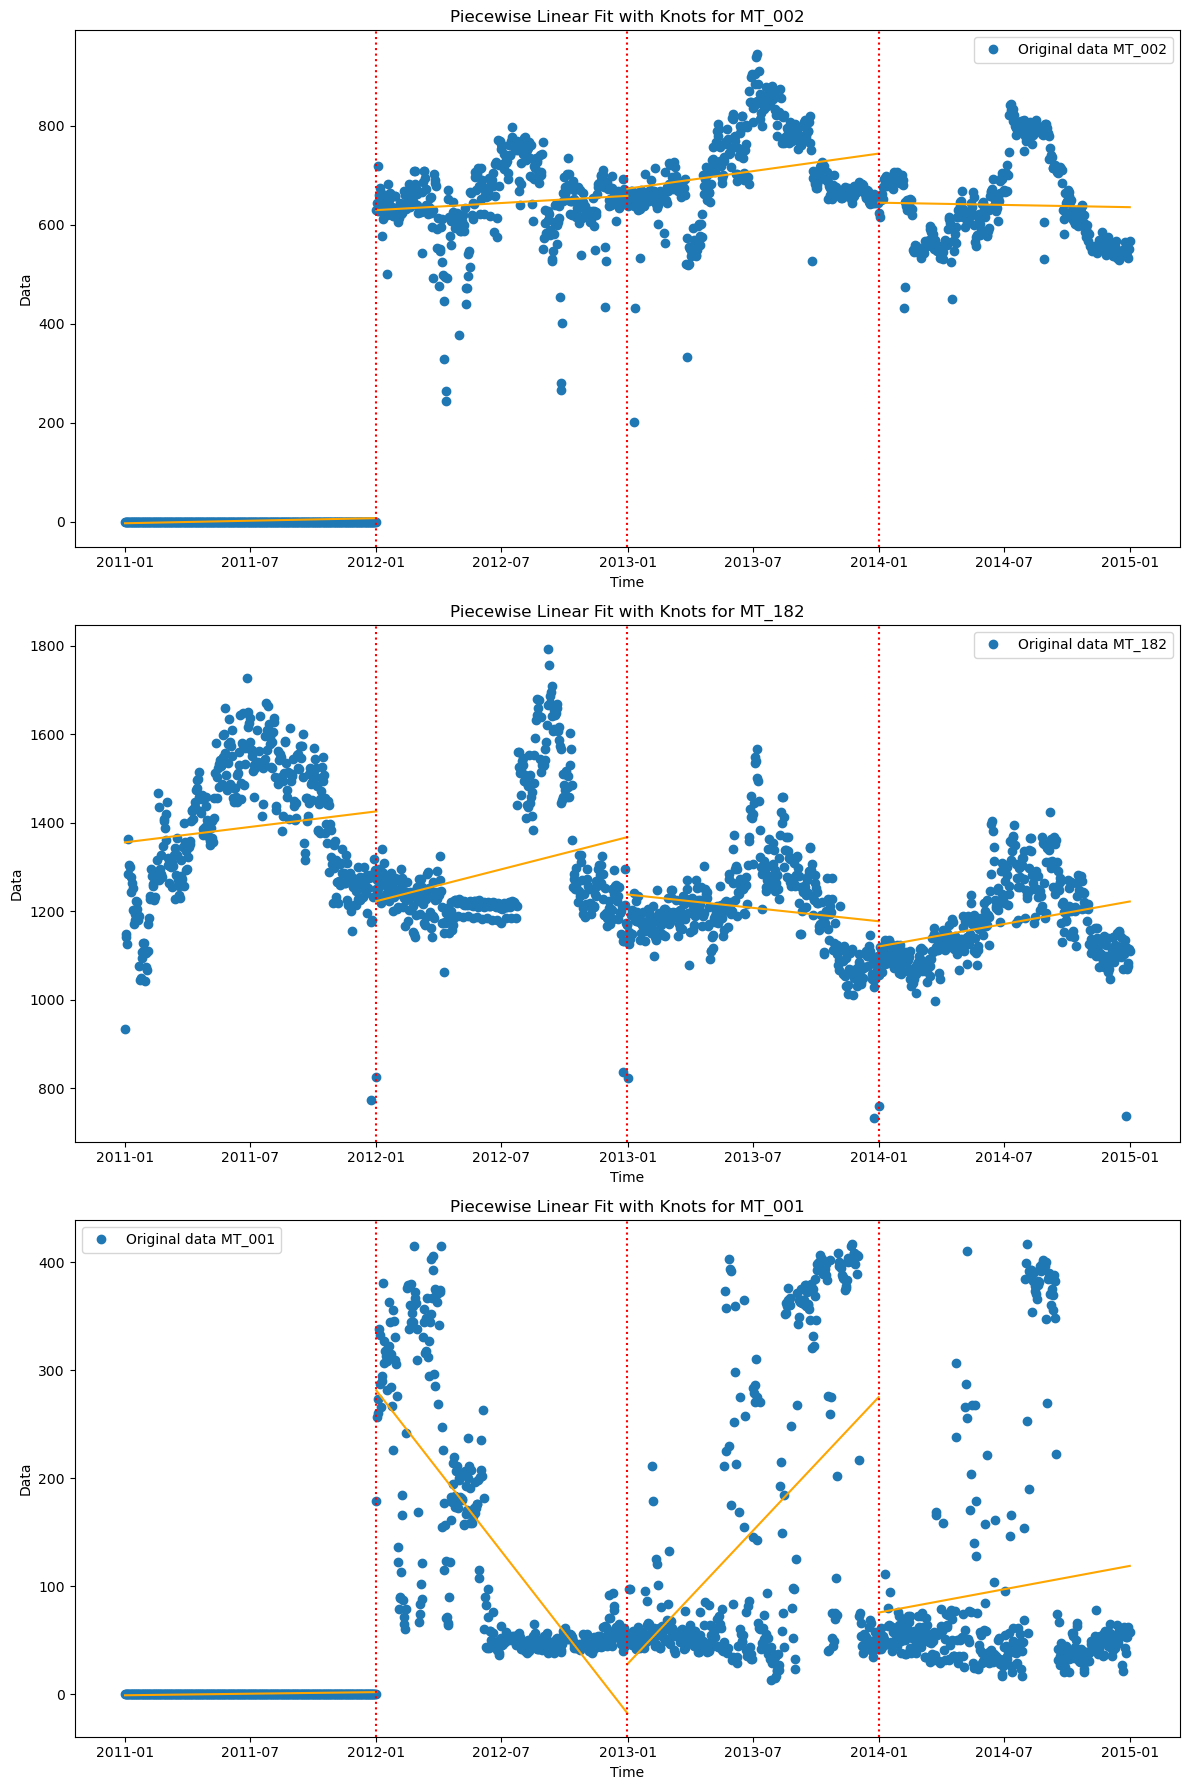

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Function to plot piecewise linear fit with 3 internal knots
def plot_piecewise_linear_fit(df, column_name, ax):
    time = df['Time']
    data = df[column_name]

    # Convert time to a numerical format (days since start)
    time_numeric = (time - time.min()) / pd.Timedelta(days=1)

    # Determine knot positions - three internal knots, four equal segments
    knots = np.linspace(time_numeric.min(), time_numeric.max(), 5)[1:-1]  # Get knots between the start and end

    # Plotting the original data
    ax.plot(time, data, 'o', label=f'Original data {column_name}')

    # Fit and plot linear segments
    segments = np.concatenate([[time_numeric.min()], knots, [time_numeric.max()]])
    for i in range(len(segments) - 1):
        # Segment data
        mask = (time_numeric >= segments[i]) & (time_numeric <= segments[i+1])
        segment_time = time_numeric[mask]
        segment_data = data[mask]

        # Linear fit to the segment
        slope, intercept, r_value, p_value, std_err = linregress(segment_time, segment_data)
        dense_time = np.linspace(segment_time.min(), segment_time.max(), 500)
        dense_data = slope * dense_time + intercept

        # Plotting the segment fit in green
        ax.plot(time.min() + pd.to_timedelta(dense_time, unit='D'), dense_data, color='orange')

    # Plotting the knots as vertical lines
    for knot in knots:
        ax.axvline(x=time.min() + pd.to_timedelta(knot, unit='D'), color='red', linestyle='dotted')

    ax.set_xlabel('Time')
    ax.set_ylabel('Data')
    ax.set_title(f'Piecewise Linear Fit with Knots for {column_name}')
    ax.legend()

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Apply the function to each DataFrame
plot_piecewise_linear_fit(df_per_day.reset_index(), 'MT_002', axs[0])
plot_piecewise_linear_fit(df_per_day.reset_index(), 'MT_182', axs[1])
plot_piecewise_linear_fit(df_per_day.reset_index(), 'MT_001', axs[2])

plt.tight_layout()
plt.show()

### Cubic Spline Fit

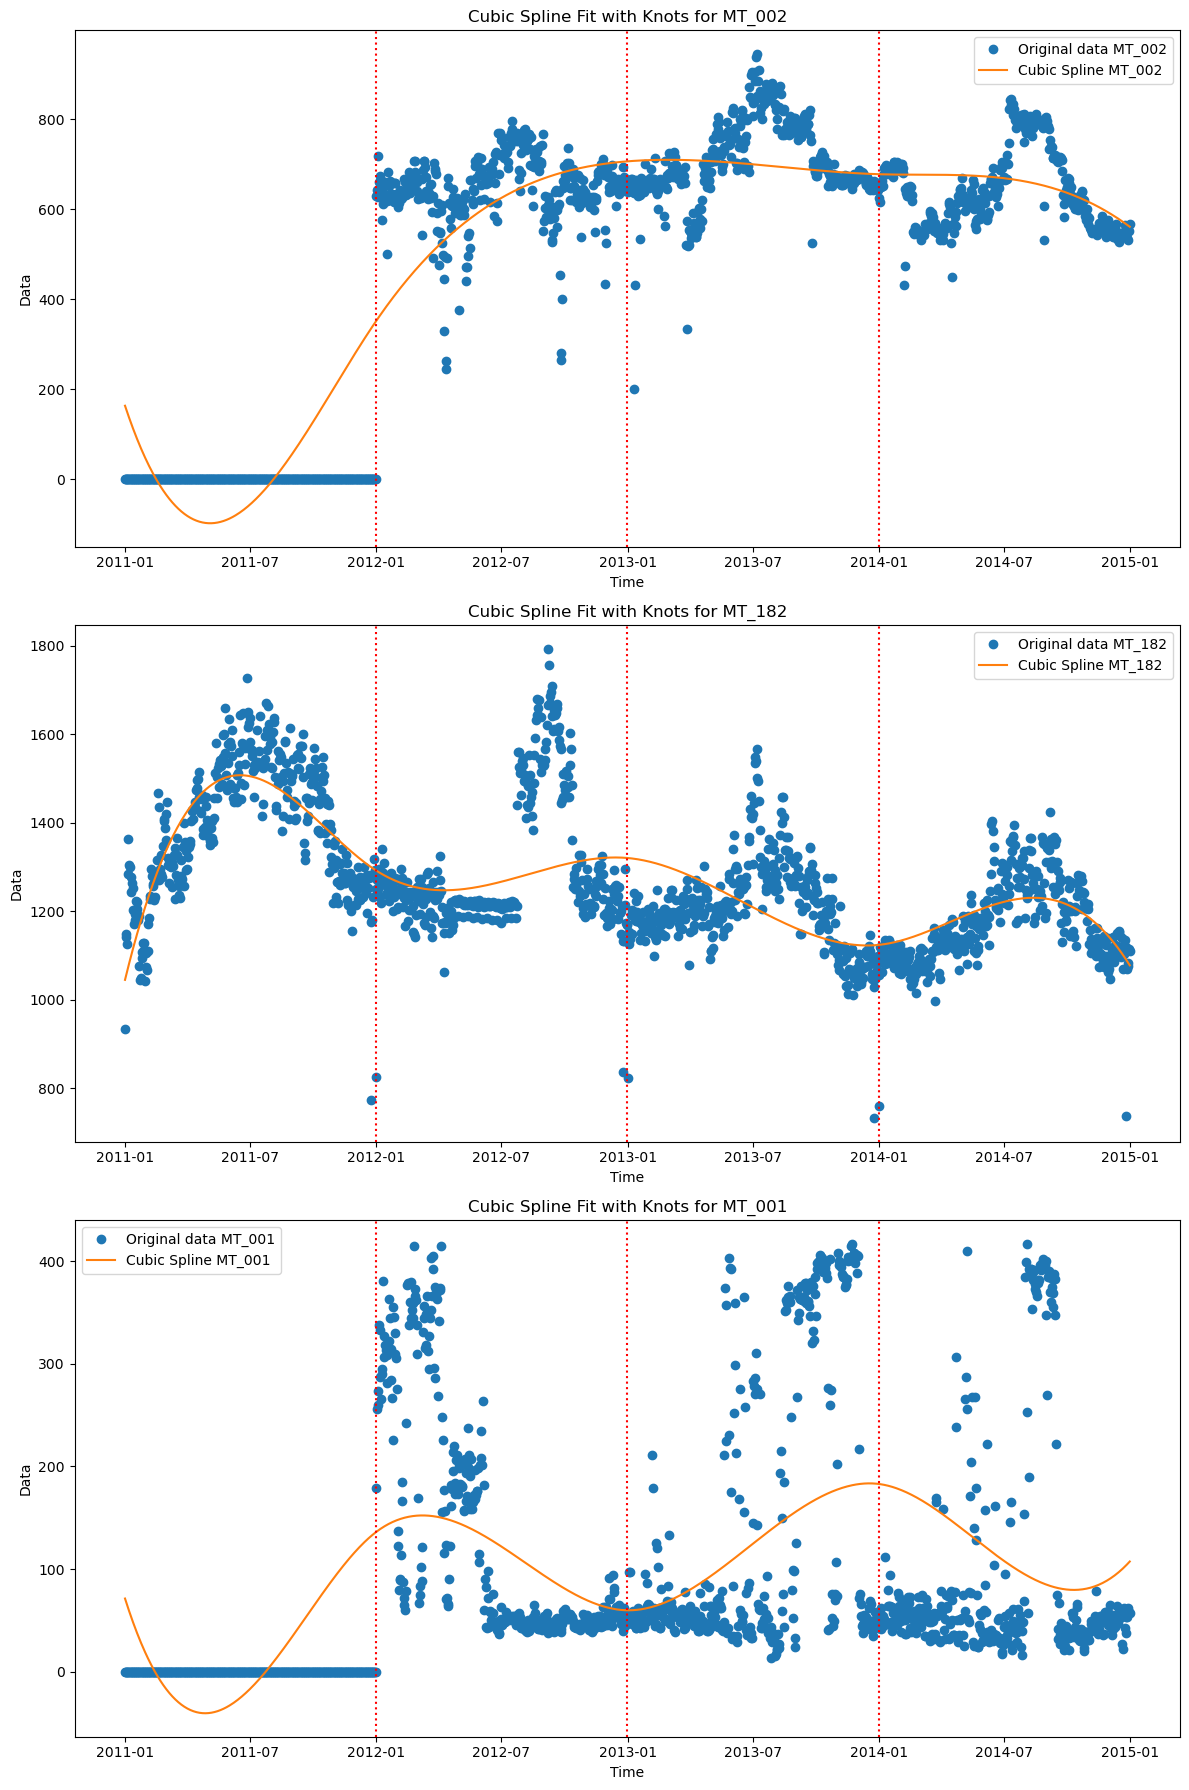

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import LSQUnivariateSpline
import numpy as np

# Function to plot cubic spline with 3 internal knots and show knots on the plot without adding them to the legend
def plot_cubic_spline_with_knots(df, column_name, ax):
    time = df['Time']
    data = df[column_name]

    # Convert time to a numerical format (days since start)
    time_numeric = (time - time.min()) / pd.Timedelta(days=1)

    # Determine knot positions - three internal knots, four equal segments
    knots = np.linspace(time_numeric.min(), time_numeric.max(), 5)[1:-1]  # Get knots between the start and end

    # Fit the cubic spline with specified knots
    spline = LSQUnivariateSpline(time_numeric, data, t=knots)

    # Generate more points for a smoother curve
    time_numeric_dense = np.linspace(time_numeric.min(), time_numeric.max(), 1000)
    data_dense = spline(time_numeric_dense)

    # Plotting the original data and the spline
    ax.plot(time, data, 'o', label=f'Original data {column_name}')
    ax.plot(time.min() + pd.to_timedelta(time_numeric_dense, unit='D'), data_dense, label=f'Cubic Spline {column_name}')

    # Plotting the knots as vertical lines without adding to the legend
    for knot in knots:
        ax.axvline(x=time.min() + pd.to_timedelta(knot, unit='D'), color='red', linestyle='dotted')

    ax.set_xlabel('Time')
    ax.set_ylabel('Data')
    ax.set_title(f'Cubic Spline Fit with Knots for {column_name}')
    ax.legend()

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot each DataFrame
plot_cubic_spline_with_knots(df_per_day.reset_index(), 'MT_002', axs[0])
plot_cubic_spline_with_knots(df_per_day.reset_index(), 'MT_182', axs[1])
plot_cubic_spline_with_knots(df_per_day.reset_index(), 'MT_001', axs[2])

plt.tight_layout()
plt.show()

# Modelling

## ARIMA & SARIMA

In [38]:
!pip install pmdarima

import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error

### Group 1

<Axes: xlabel='Time'>

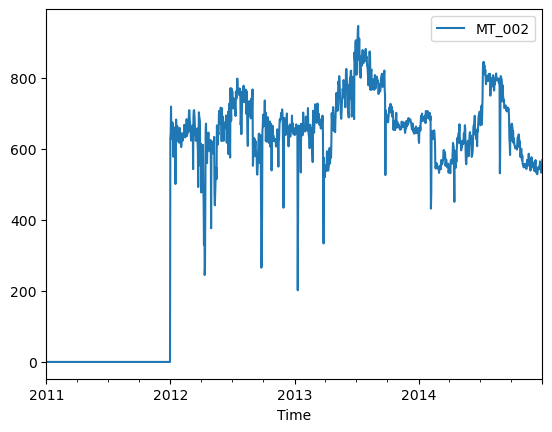

In [53]:
df_per_day = df_per_day.reset_index()

data = df_per_day[['Time', 'MT_002']].copy()

# Convert the 'Time' column to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'Time' column as the index
data.set_index('Time', inplace=True)
data.index = pd.to_datetime(data.index)

# Visualize
data.plot()

In [54]:
# Split the data into train and test sets
train_data = data['2011':'2013']  # This includes all data from 2011 to the end of 2013
test_data = data['2014':]          # This includes all data from 2014

In [55]:
ARIMA_model = pm.auto_arima(train_data['MT_002'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11425.225, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11497.031, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11481.460, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11473.408, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11495.218, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11424.436, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11460.995, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11425.986, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11428.544, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11424.692, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11437.871, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11423.125, Time=0.35 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11418.183, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11421.190, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0

In [57]:
#adding exogenous variable
train_data['day_index'] = train_data.index.day

# SARIMA Model
SARIMA_model = pm.auto_arima(train_data['MT_002'], exogenous=train_data[['day_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           m=30, #seasonality
                           max_p=2, max_q=2,
                           seasonal=True, 
                           trace=True)

/var/folders/9t/jwr0675520x7pzpgdly3cs3c0000gn/T/ipykernel_21959/2308320538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_index'] = train_data.index.day


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=11426.588, Time=5.90 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=11497.031, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=11481.495, Time=1.17 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=11473.460, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=11495.218, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=11424.995, Time=3.66 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=11425.225, Time=0.18 sec
 ARIMA(1,1,1)(0,0,2)[30] intercept   : AIC=11426.295, Time=20.23 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=11425.112, Time=3.19 sec
 ARIMA(1,1,1)(1,0,2)[30] intercept   : AIC=inf, Time=33.33 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=11481.404, Time=0.63 sec
 ARIMA(2,1,1)(0,0,1)[30] intercept   : AIC=11423.995, Time=4.09 sec
 ARIMA(2,1,1)(0,0,0)[30] intercept   : AIC=11424.436, Time=0.28 sec
 ARIMA(2,1,1)(1,0,1)[30] intercept   : AIC=11425.640, Time=6.15 sec
 ARIMA(2,

In [59]:
def forecast(ARIMA_model, train_data, test_data, periods=365):
    # Make sure the index is a datetime index
    # If the index is not datetime type, convert it
    if not isinstance(train_data.index, pd.DatetimeIndex):
        train_data.index = pd.to_datetime(train_data.index)

    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    # Create the new index for the forecasted data
    last_date = train_data.index[-1]
    index_of_fc = pd.date_range(last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    # Total MAPE
    if test_data is not None and len(test_data) == periods:
        mape = mean_absolute_percentage_error(test_data, fitted_series)
        print(f"Total MAPE: {mape * 100:.2f}%")
    else:
        print("Test data not provided or length mismatch with periods; cannot compute MAPE.")

    
    
    # Calculate MAPE for four time region
    # First 90 days
    group_1_mape_1 = np.mean(np.abs((test_data[:90].values - fitted[:90].values) / test_data[:90].values)) * 100
    # Second 90 days
    group_1_mape_2 = np.mean(np.abs((test_data[90:180].values - fitted[90:180].values) / test_data[90:180].values)) * 100
    # Third 90 days
    group_1_mape_3 = np.mean(np.abs((test_data[180:270].values - fitted[180:270].values) / test_data[180:270].values)) * 100
    # Fourth 90 days
    group_1_mape_4 = np.mean(np.abs((test_data[270:360].values - fitted[270:360].values) /test_data[270:360].values)) * 100

    print(f'MAPE for 1st 90 days: {group_1_mape_1}%')
    print(f'MAPE for 2nd 90 days: {group_1_mape_2}%')
    print(f'MAPE for 3rd 90 days: {group_1_mape_3}%')
    print(f'MAPE for 4th 90 days: {group_1_mape_4}%')

    # Box plot of errors
    data1 = np.array(test_data[:90]).flatten() - np.array(fitted[:90]).flatten()
    data2 = np.array(test_data[90:180]).flatten() - np.array(fitted[90:180]).flatten()
    data3 = np.array(test_data[180:270]).flatten() - np.array(fitted[180:270]).flatten()
    data4 = np.array(test_data[270:360]).flatten() - np.array(fitted[270:360]).flatten()

    # Combine the data into a list of arrays
    data_to_plot = [data1, data2, data3, data4]

    # Create the box plot
    plt.boxplot(data_to_plot)

    # Customize the plot
    plt.title('Box plot of Errors for Four Period')
    plt.ylabel('Errors')
    plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

    # Display the plot
    plt.show()


    # Forcast Plot 2014
    plt.figure(figsize=(15,7))
    plt.plot(train_data['MT_002'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA - Forecast of Electricity Consumptions MT_002 (Group 1)")
    plt.show()

Total MAPE: 11.94%
MAPE for 1st 90 days: 11.171832388716734%
MAPE for 2nd 90 days: 8.254368967920811%
MAPE for 3rd 90 days: 14.46896231925961%
MAPE for 4th 90 days: 13.454437464896507%


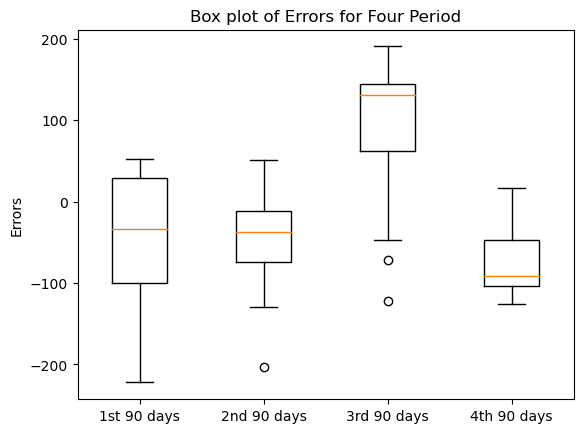

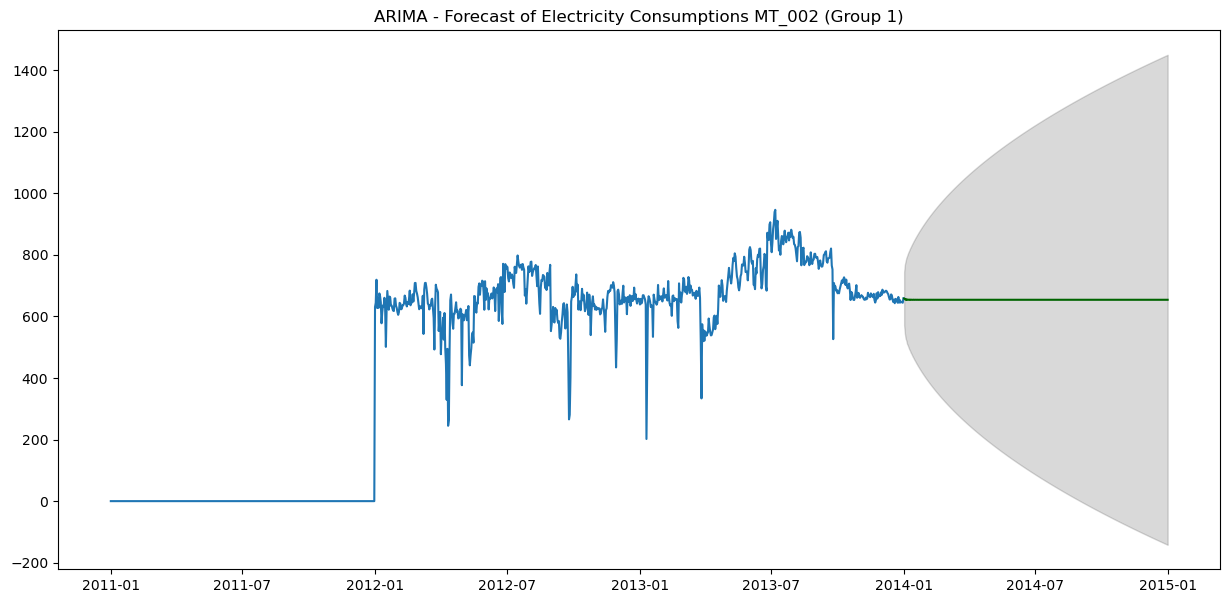

In [60]:
forecast(ARIMA_model,train_data, test_data['MT_002'])

Total MAPE: 11.96%
MAPE for 1st 90 days: 11.188730086679435%
MAPE for 2nd 90 days: 8.29836374760457%
MAPE for 3rd 90 days: 14.42652065145217%
MAPE for 4th 90 days: 13.514071174325256%


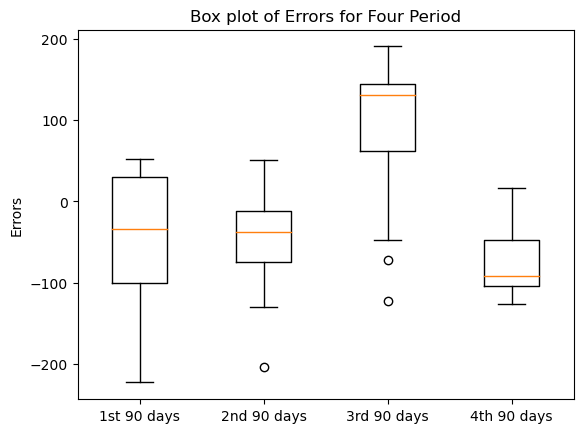

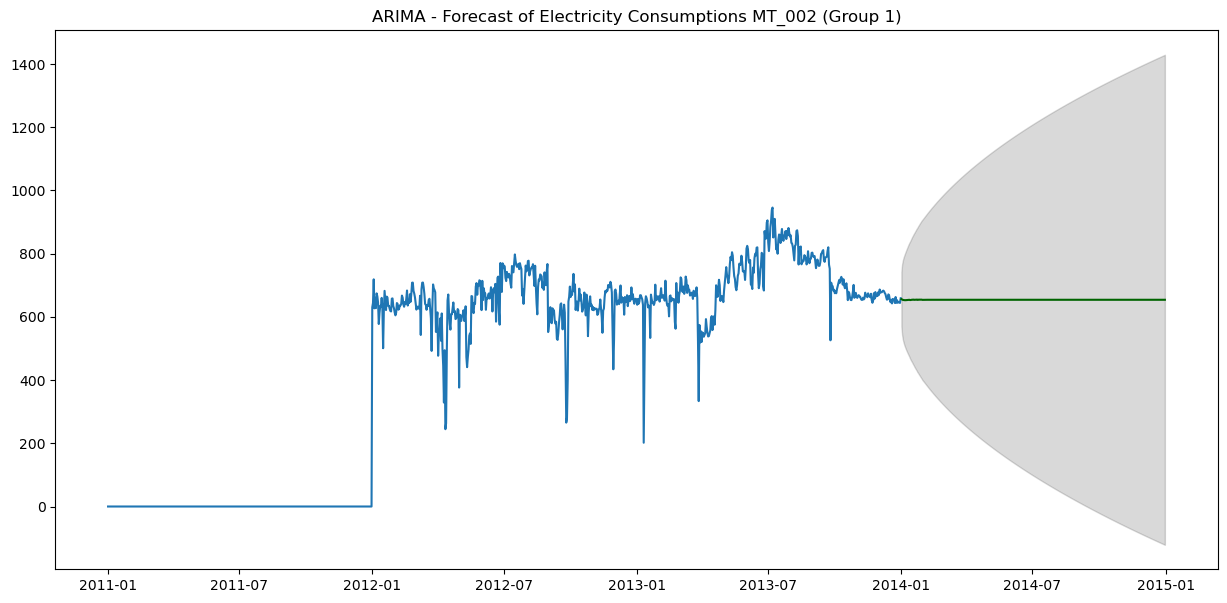

In [61]:
forecast(SARIMA_model, train_data, test_data['MT_002'])

### Group 2

<Axes: xlabel='Time'>

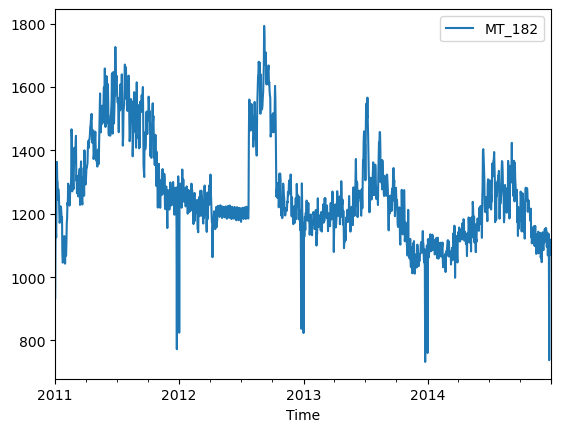

In [62]:
data = df_per_day[['Time', 'MT_182']].copy()

# Convert the 'Time' column to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'Time' column as the index
data.set_index('Time', inplace=True)
data.index = pd.to_datetime(data.index)

# Visualize
data.plot()

In [63]:
# Split the data into train and test sets
train_data = data['2011':'2013']  # This includes all data from 2011 to the end of 2013
test_data = data['2014':]          # This includes all data from 2014

In [64]:
ARIMA_model = pm.auto_arima(train_data['MT_182'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11895.968, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12041.934, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11984.711, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11948.098, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12039.938, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11897.949, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11897.945, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11905.468, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11944.039, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11892.270, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11892.926, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11893.066, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11905.193, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11898.935, Time=0.20 sec
 ARIMA(3,1,3)(0,0,0

In [65]:
#adding exogenous variable
train_data['day_index'] = train_data.index.day

# SARIMA Model
SARIMA_model = pm.auto_arima(train_data['MT_182'], exogenous=train_data[['day_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           m=30, #seasonality
                           max_p=2, max_q=2,
                           seasonal=True, 
                           trace=True)

Performing stepwise search to minimize aic


/var/folders/9t/jwr0675520x7pzpgdly3cs3c0000gn/T/ipykernel_21959/1108804020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_index'] = train_data.index.day


 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=5.49 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=12041.934, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=11985.022, Time=1.15 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=11949.039, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=12039.938, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=11948.098, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=11949.091, Time=1.54 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=11950.579, Time=2.97 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=11895.968, Time=0.19 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=11897.412, Time=2.71 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=11897.367, Time=3.40 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=11984.711, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[30] intercept   : AIC=11897.949, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=11897.945, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=11905.468, 

In [66]:
def forecast(ARIMA_model, train_data, test_data, periods=365):
    # Make sure the index is a datetime index
    # If the index is not datetime type, convert it
    if not isinstance(train_data.index, pd.DatetimeIndex):
        train_data.index = pd.to_datetime(train_data.index)

    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    # Create the new index for the forecasted data
    last_date = train_data.index[-1]
    index_of_fc = pd.date_range(last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    # Total MAPE
    if test_data is not None and len(test_data) == periods:
        mape = mean_absolute_percentage_error(test_data, fitted_series)
        print(f"Total MAPE: {mape * 100:.2f}%")
    else:
        print("Test data not provided or length mismatch with periods; cannot compute MAPE.")

    
    
    # Calculate MAPE for four time region
    # First 90 days
    group_1_mape_1 = np.mean(np.abs((test_data[:90].values - fitted[:90].values) / test_data[:90].values)) * 100
    # Second 90 days
    group_1_mape_2 = np.mean(np.abs((test_data[90:180].values - fitted[90:180].values) / test_data[90:180].values)) * 100
    # Third 90 days
    group_1_mape_3 = np.mean(np.abs((test_data[180:270].values - fitted[180:270].values) / test_data[180:270].values)) * 100
    # Fourth 90 days
    group_1_mape_4 = np.mean(np.abs((test_data[270:360].values - fitted[270:360].values) /test_data[270:360].values)) * 100

    print(f'MAPE for 1st 90 days: {group_1_mape_1}%')
    print(f'MAPE for 2nd 90 days: {group_1_mape_2}%')
    print(f'MAPE for 3rd 90 days: {group_1_mape_3}%')
    print(f'MAPE for 4th 90 days: {group_1_mape_4}%')

    # Box plot of errors
    data1 = np.array(test_data[:90]).flatten() - np.array(fitted[:90]).flatten()
    data2 = np.array(test_data[90:180]).flatten() - np.array(fitted[90:180]).flatten()
    data3 = np.array(test_data[180:270]).flatten() - np.array(fitted[180:270]).flatten()
    data4 = np.array(test_data[270:360]).flatten() - np.array(fitted[270:360]).flatten()

    # Combine the data into a list of arrays
    data_to_plot = [data1, data2, data3, data4]

    # Create the box plot
    plt.boxplot(data_to_plot)

    # Customize the plot
    plt.title('Box plot of Errors for Four Period')
    plt.ylabel('Errors')
    plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

    # Display the plot
    plt.show()


    # Forcast Plot 2014
    plt.figure(figsize=(15,7))
    plt.plot(train_data['MT_182'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA - Forecast of Electricity Consumptions MT_182 (Group 2)")
    plt.show()

Total MAPE: 10.06%
MAPE for 1st 90 days: 3.9735475484043126%
MAPE for 2nd 90 days: 10.078808542078319%
MAPE for 3rd 90 days: 17.549749215067497%
MAPE for 4th 90 days: 9.000823316500671%


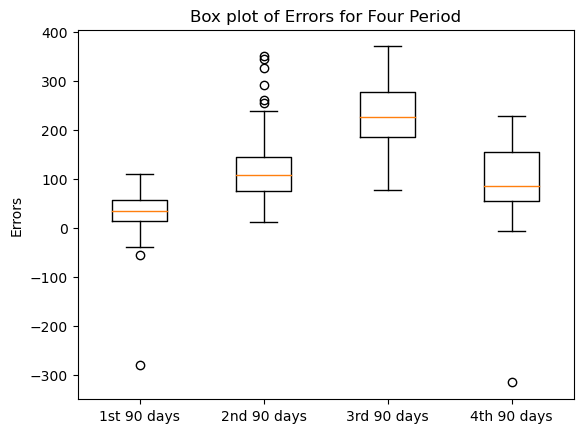

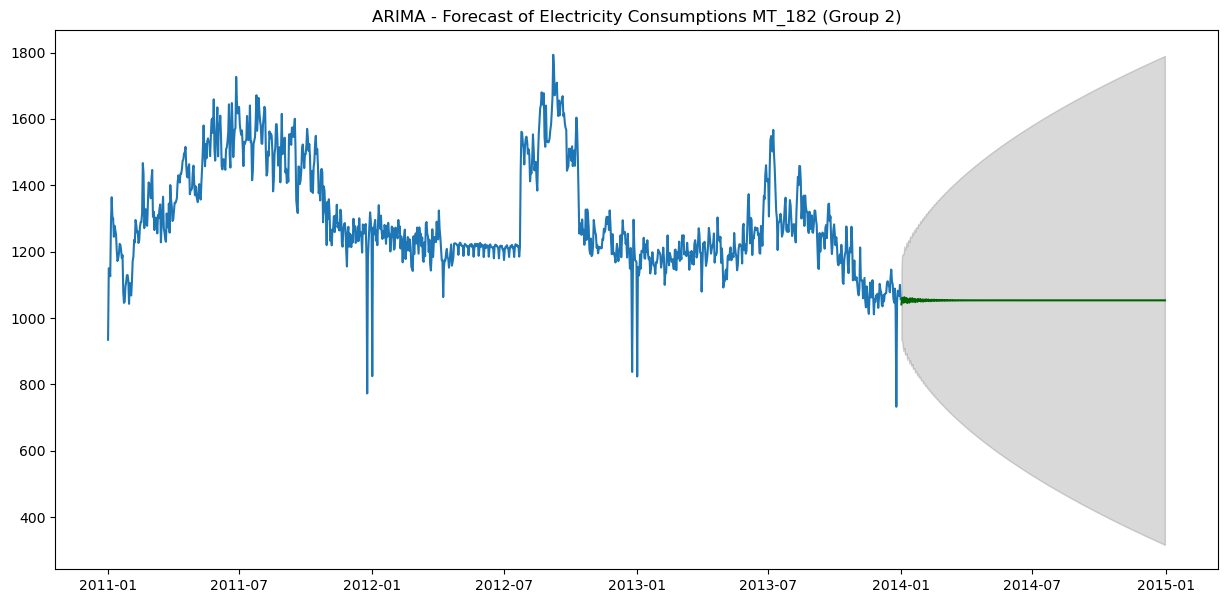

In [67]:
forecast(ARIMA_model,train_data, test_data['MT_182'])

Total MAPE: 10.08%
MAPE for 1st 90 days: 3.996557517564763%
MAPE for 2nd 90 days: 10.10608960981238%
MAPE for 3rd 90 days: 17.574942060459346%
MAPE for 4th 90 days: 9.027278430275063%


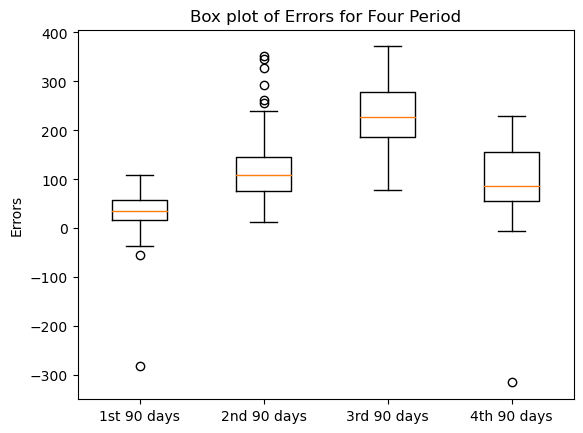

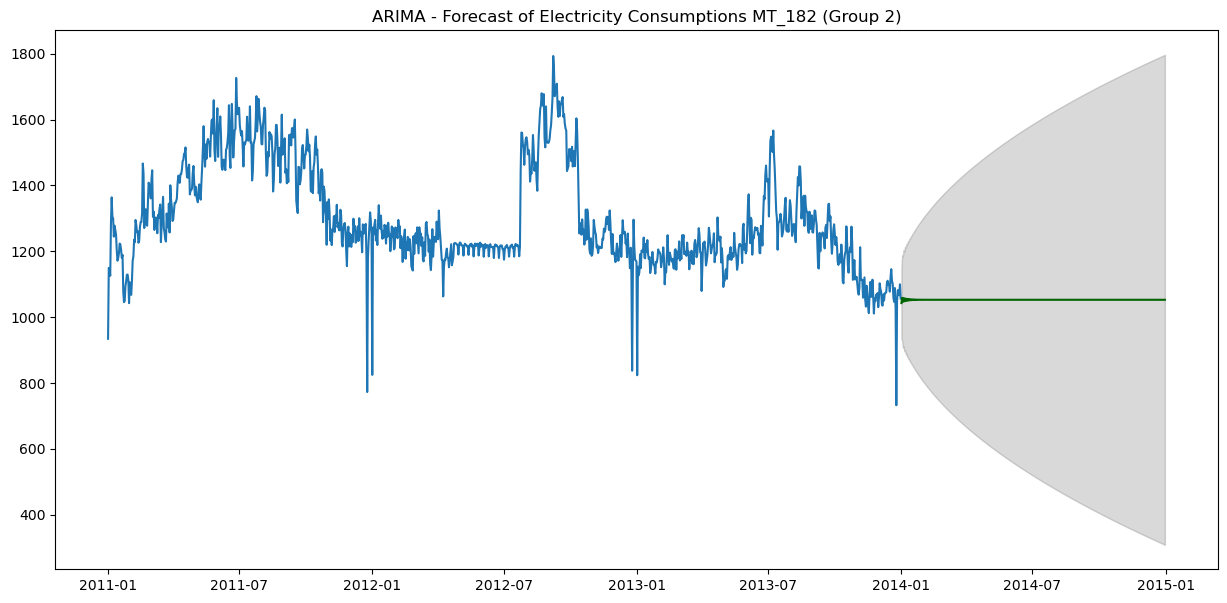

In [68]:
forecast(SARIMA_model,train_data, test_data['MT_182'])

### Group 3

<Axes: xlabel='Time'>

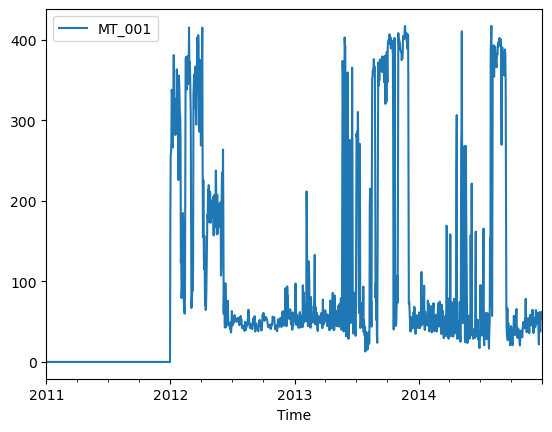

In [69]:
data = df_per_day[['Time', 'MT_001']].copy()

# Convert the 'Time' column to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'Time' column as the index
data.set_index('Time', inplace=True)
data.index = pd.to_datetime(data.index)

# Visualize
data.plot()

In [70]:
# Split the data into train and test sets
train_data = data['2011':'2013']  # This includes all data from 2011 to the end of 2013
test_data = data['2014':]          # This includes all data from 2014

In [71]:
ARIMA_model = pm.auto_arima(train_data['MT_001'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11112.049, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14196.621, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11180.566, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12932.373, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11103.218, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11135.223, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=11052.330, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11080.880, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=11051.367, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=11060.315, Time=0.19 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=11039.651, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=11061.308, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=11032.357, Time=0.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=11058.707, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0

In [72]:
#adding exogenous variable
train_data['day_index'] = train_data.index.day

# SARIMA Model
SARIMA_model = pm.auto_arima(train_data['MT_001'], exogenous=train_data[['day_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           m=30, #seasonality
                           max_p=2, max_q=2,
                           seasonal=True, 
                           trace=True)

/var/folders/9t/jwr0675520x7pzpgdly3cs3c0000gn/T/ipykernel_21959/3164857132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_index'] = train_data.index.day


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=11098.885, Time=4.76 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=13704.805, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=11173.973, Time=1.31 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=12350.535, Time=2.72 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=14196.621, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[30] intercept   : AIC=11098.135, Time=3.79 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=11097.909, Time=0.25 sec
 ARIMA(1,0,1)(1,0,0)[30] intercept   : AIC=11098.011, Time=3.68 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=12507.783, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[30] intercept   : AIC=11172.165, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[30] intercept   : AIC=11091.371, Time=0.20 sec
 ARIMA(2,0,1)(1,0,0)[30] intercept   : AIC=11091.744, Time=5.47 sec
 ARIMA(2,0,1)(0,0,1)[30] intercept   : AIC=11091.856, Time=5.91 sec
 ARIMA(2,0,1)(1,0,1)[30] intercept   : AIC=11092.680, Time=5.22 sec
 ARIM

In [73]:
def forecast(ARIMA_model, train_data, test_data, periods=365):
    # Make sure the index is a datetime index
    # If the index is not datetime type, convert it
    if not isinstance(train_data.index, pd.DatetimeIndex):
        train_data.index = pd.to_datetime(train_data.index)

    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    # Create the new index for the forecasted data
    last_date = train_data.index[-1]
    index_of_fc = pd.date_range(last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    # Total MAPE
    if test_data is not None and len(test_data) == periods:
        mape = mean_absolute_percentage_error(test_data, fitted_series)
        print(f"Total MAPE: {mape * 100:.2f}%")
    else:
        print("Test data not provided or length mismatch with periods; cannot compute MAPE.")

    
    
    # Calculate MAPE for four time region
    # First 90 days
    group_1_mape_1 = np.mean(np.abs((test_data[:90].values - fitted[:90].values) / test_data[:90].values)) * 100
    # Second 90 days
    group_1_mape_2 = np.mean(np.abs((test_data[90:180].values - fitted[90:180].values) / test_data[90:180].values)) * 100
    # Third 90 days
    group_1_mape_3 = np.mean(np.abs((test_data[180:270].values - fitted[180:270].values) / test_data[180:270].values)) * 100
    # Fourth 90 days
    group_1_mape_4 = np.mean(np.abs((test_data[270:360].values - fitted[270:360].values) /test_data[270:360].values)) * 100

    print(f'MAPE for 1st 90 days: {group_1_mape_1}%')
    print(f'MAPE for 2nd 90 days: {group_1_mape_2}%')
    print(f'MAPE for 3rd 90 days: {group_1_mape_3}%')
    print(f'MAPE for 4th 90 days: {group_1_mape_4}%')

    # Box plot of errors
    data1 = np.array(test_data[:90]).flatten() - np.array(fitted[:90]).flatten()
    data2 = np.array(test_data[90:180]).flatten() - np.array(fitted[90:180]).flatten()
    data3 = np.array(test_data[180:270]).flatten() - np.array(fitted[180:270]).flatten()
    data4 = np.array(test_data[270:360]).flatten() - np.array(fitted[270:360]).flatten()

    # Combine the data into a list of arrays
    data_to_plot = [data1, data2, data3, data4]

    # Create the box plot
    plt.boxplot(data_to_plot)

    # Customize the plot
    plt.title('Box plot of Errors for Four Period')
    plt.ylabel('Errors')
    plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

    # Display the plot
    plt.show()


    # Forcast Plot 2014
    plt.figure(figsize=(15,7))
    plt.plot(train_data['MT_001'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA - Forecast of Electricity Consumptions MT_001 (Group 3)")
    plt.show()

Total MAPE: 101.34%
MAPE for 1st 90 days: 62.57101777500029%
MAPE for 2nd 90 days: 116.88467700223919%
MAPE for 3rd 90 days: 106.57712671288277%
MAPE for 4th 90 days: 121.62378908846787%


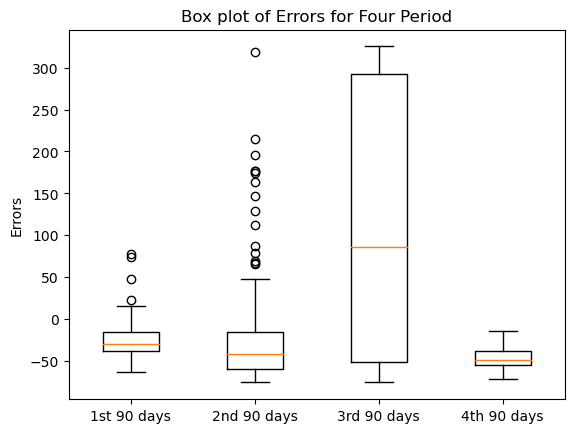

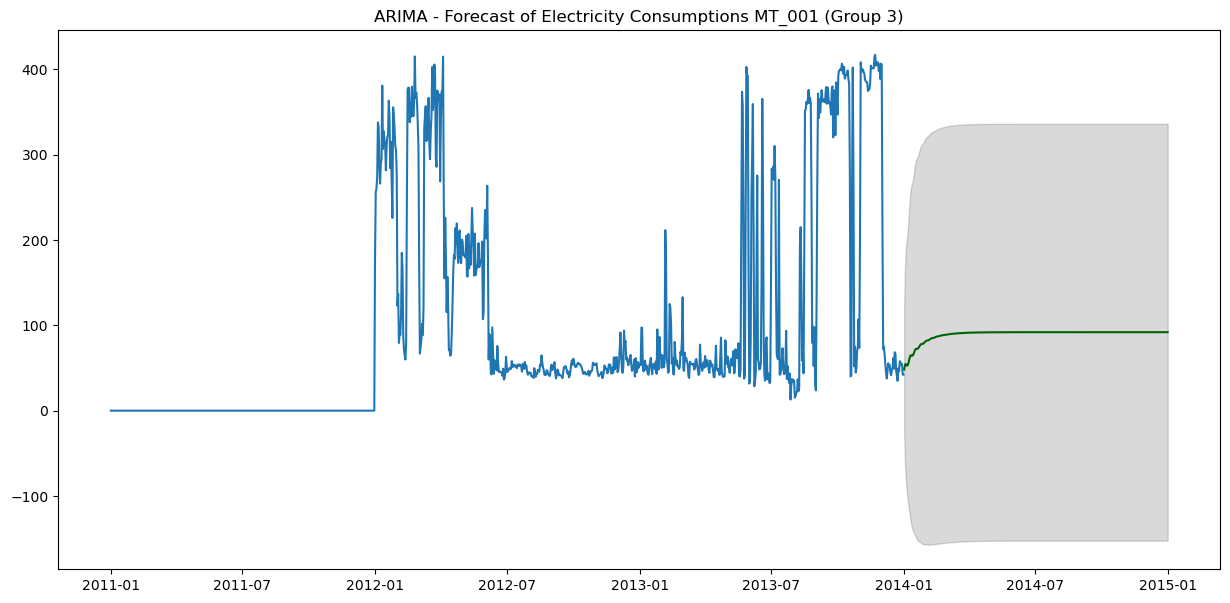

In [74]:
forecast(ARIMA_model,train_data, test_data['MT_001'])

Total MAPE: 91.63%
MAPE for 1st 90 days: 44.946958760745794%
MAPE for 2nd 90 days: 106.34743563454887%
MAPE for 3rd 90 days: 102.85203139800667%
MAPE for 4th 90 days: 114.41528616186292%


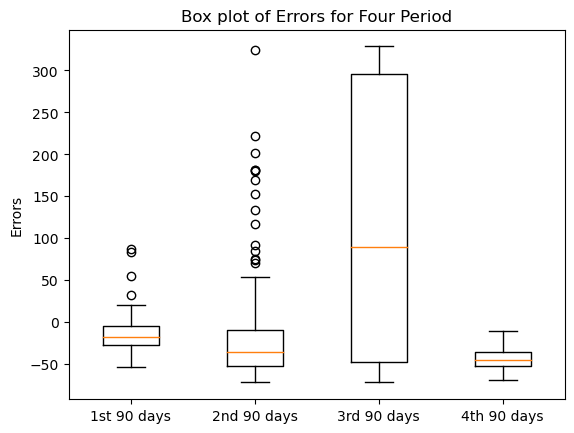

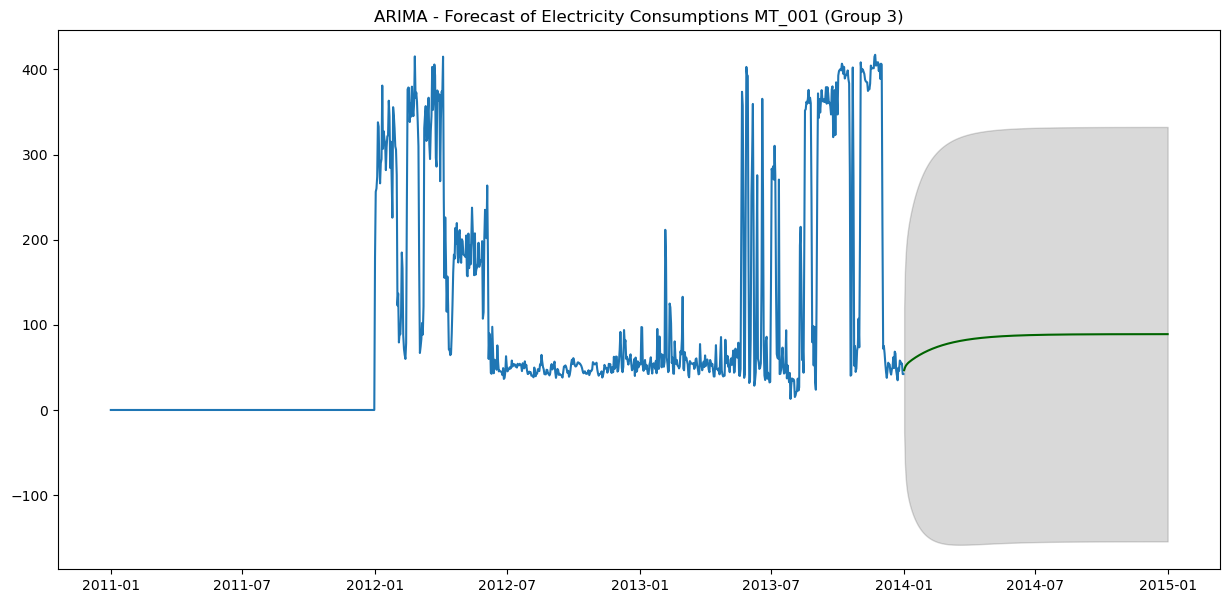

In [75]:
forecast(SARIMA_model,train_data, test_data['MT_001'])

## Facebook Prophet

### Prepare data

In [24]:
# use MT_002 for group 1 (cluster 0), use MT_182 for group 2 (cluster 1), and MT_001 for group 3 (cluster 2)
df_1 = df_per_day[['Time', 'MT_002']].copy()
df_2 = df_per_day[['Time', 'MT_182']].copy()
df_3 = df_per_day[['Time', 'MT_001']].copy()

In [25]:
df_1['Time'] = pd.to_datetime(df_1['Time'], format='%Y-%m-%d')
df_2['Time'] = pd.to_datetime(df_2['Time'], format='%Y-%m-%d')
df_3['Time'] = pd.to_datetime(df_3['Time'], format='%Y-%m-%d')

In [26]:
# Prophet require input columns must be named as ds (the time column) and y (the metric column).
df_1.rename(columns = {'Time':'ds', 'MT_002':'y'}, inplace = True)
df_2.rename(columns = {'Time':'ds', 'MT_182':'y'}, inplace = True)
df_3.rename(columns = {'Time':'ds', 'MT_001':'y'}, inplace = True)

In [27]:
df_1

ds           y
0    2011-01-01    0.000000
1    2011-01-02    0.000000
2    2011-01-03    0.000000
3    2011-01-04    0.000000
4    2011-01-05    0.000000
...         ...         ...
1456 2014-12-27  536.273115
1457 2014-12-28  532.894737
1458 2014-12-29  553.342817
1459 2014-12-30  551.386913
1460 2014-12-31  568.100996

[1461 rows x 2 columns]

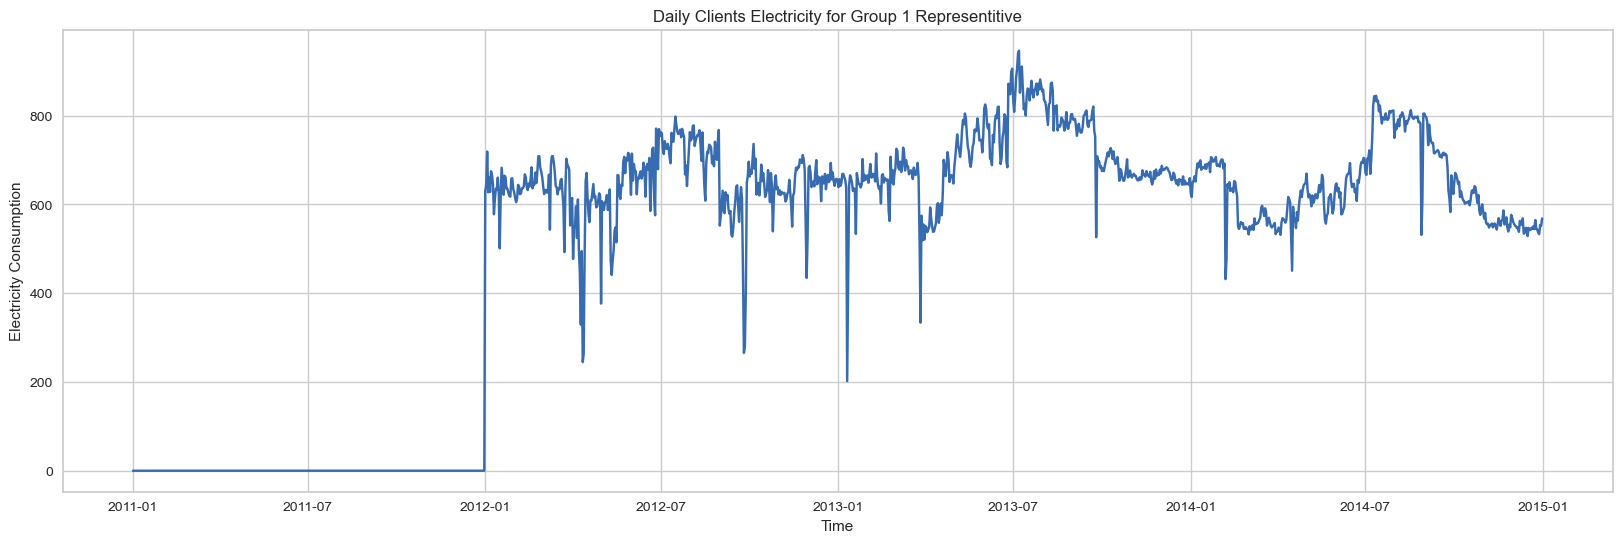

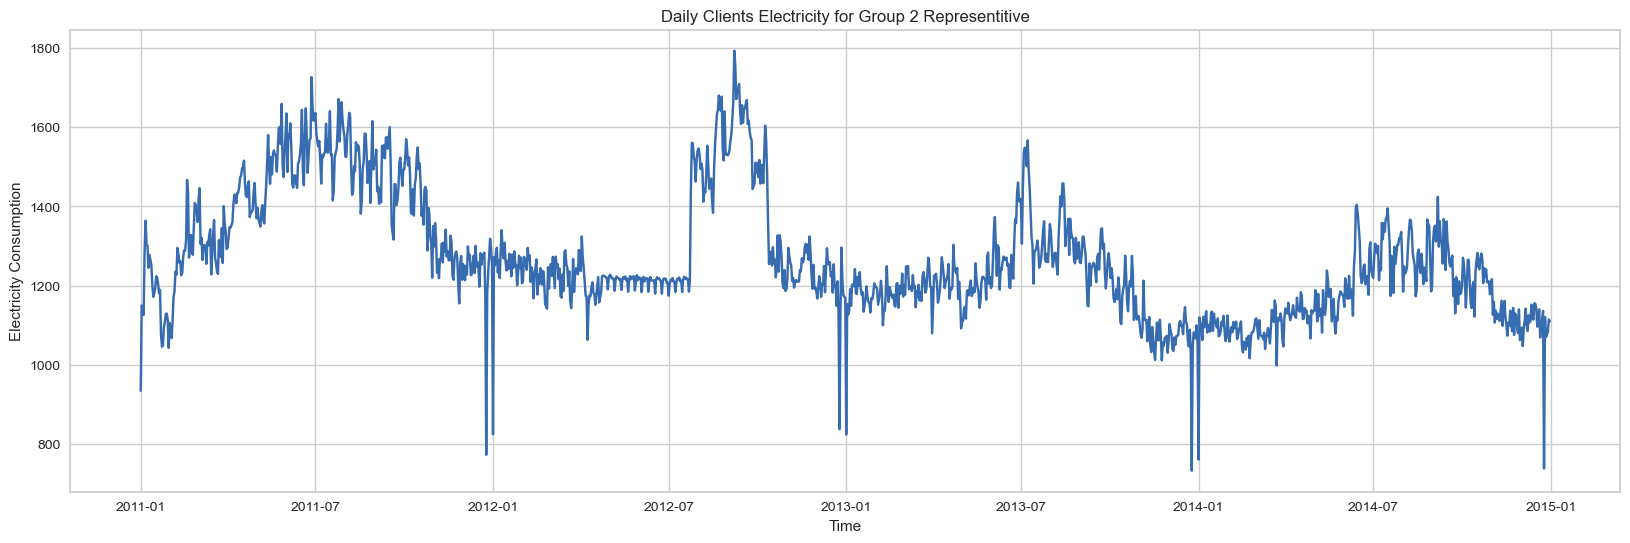

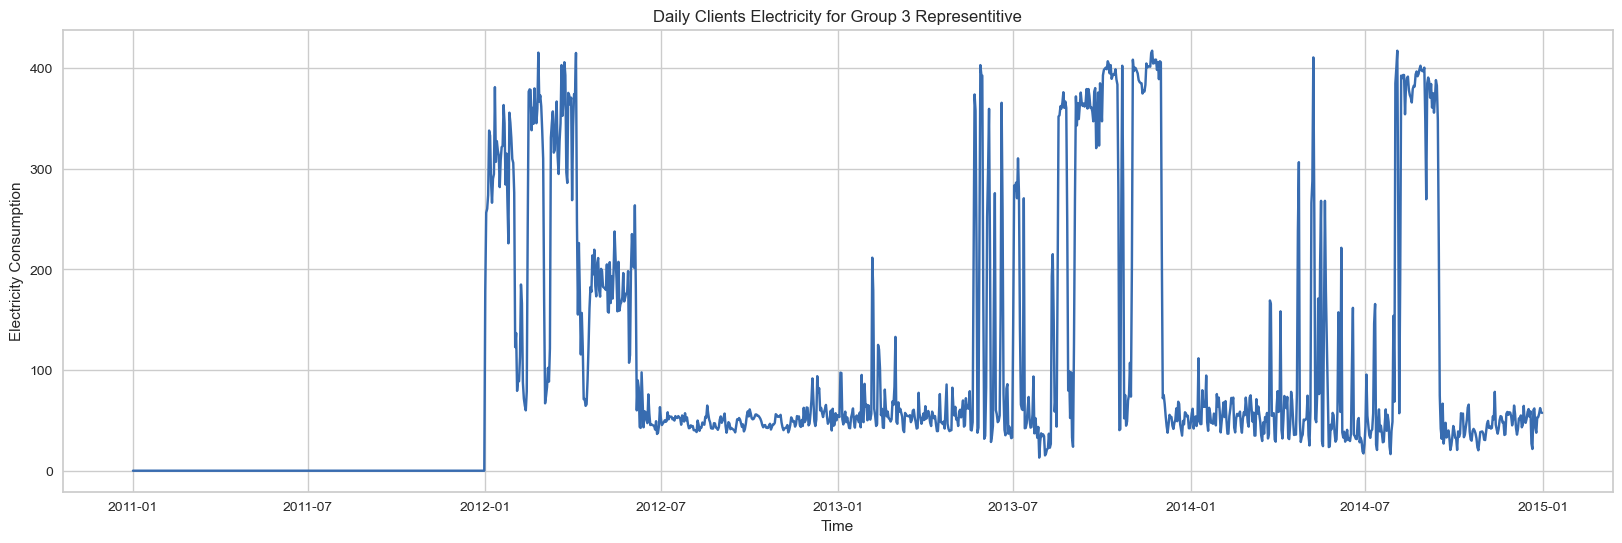

In [49]:
plt.figure(figsize=(20, 6))
plt.plot(df_1['ds'], df_1['y'])
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.title('Daily Clients Electricity for Group 1 Representitive')
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(df_2['ds'], df_2['y'])
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.title('Daily Clients Electricity for Group 2 Representitive')
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(df_3['ds'], df_3['y'])
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.title('Daily Clients Electricity for Group 3 Representitive')
plt.show()

In [50]:
# set holiday according to https://www.timeanddate.com/holidays/portugal/2011
# and https://holidayapi.com/countries/pt/2013
# National_holiday --> use build in country holidays in prophet
# Daylight_Saving_Time

holidays_1 = pd.DataFrame({
  'holiday': 'National_holiday',
  'ds': pd.to_datetime(['2011-01-01', '2011-04-22', '2011-04-24', '2011-04-25', '2011-05-01', '2011-06-10',
                        '2011-06-23', '2011-08-15', '2011-10-05', '2011-11-01', '2011-12-01', '2011-12-08',
                        '2011-12-25']),
  'lower_window': -1,
  'upper_window': 1
})

holidays_2 = pd.DataFrame({
  'holiday': 'Daylight_Saving_Time',
  'ds': pd.to_datetime(['2011-03-27', '2011-10-30']),
  'lower_window': 0,
  'upper_window': 0
})

holidays_3 = pd.DataFrame({
  'holiday': 'National_holiday',
  'ds': pd.to_datetime(['2012-01-01', '2012-04-06', '2012-04-08', '2012-04-25', '2012-05-01', '2012-06-07',
                        '2012-06-10', '2012-08-15', '2012-10-05', '2012-11-01', '2012-12-01', '2012-12-08',
                        '2012-12-25']),
  'lower_window': -1,
  'upper_window': 1
})

holidays_4 = pd.DataFrame({
  'holiday': 'Daylight_Saving_Time',
  'ds': pd.to_datetime(['2012-03-25', '2012-10-28']),
  'lower_window': 0,
  'upper_window': 0
})

holidays_5 = pd.DataFrame({
  'holiday': 'National_holiday',
  'ds': pd.to_datetime(['2013-01-01', '2013-03-29', '2013-03-31', '2013-04-25', '2013-05-01', '2013-05-30',
                        '2013-06-10', '2013-08-15', '2013-10-05', '2013-11-01', '2013-12-01', '2013-12-08',
                        '2013-12-25']),
  'lower_window': -1,
  'upper_window': 1
})

holidays_6 = pd.DataFrame({
  'holiday': 'Daylight_Saving_Time',
  'ds': pd.to_datetime(['2013-03-31', '2013-10-27']),
  'lower_window': 0,
  'upper_window': 0
})

holidays = pd.concat([holidays_2, holidays_4, holidays_6], ignore_index=True)

In [51]:
holidays

holiday         ds  lower_window  upper_window
0  Daylight_Saving_Time 2011-03-27             0             0
1  Daylight_Saving_Time 2011-10-30             0             0
2  Daylight_Saving_Time 2012-03-25             0             0
3  Daylight_Saving_Time 2012-10-28             0             0
4  Daylight_Saving_Time 2013-03-31             0             0
5  Daylight_Saving_Time 2013-10-27             0             0

## Building model

In [85]:
# !pip install fbprophet
# !pip install prophet

In [54]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
df_1_train = df_1[df_1['ds'] <= '2013-12-31']
df_1_test = df_1[df_1['ds'] >= '2014-01-01']

df_2_train = df_2[df_2['ds'] <= '2013-12-31']
df_2_test = df_2[df_2['ds'] >= '2014-01-01']

df_3_train = df_3[df_3['ds'] <= '2013-12-31']
df_3_test = df_3[df_3['ds'] >= '2014-01-01']

### Group 1

In [56]:
# group 1
# multiplicative performs better than additive generally
param_grid = { 
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1, 5, 10],
    'holidays_prior_scale': [0.01, 0.05, 0.1, 0.2, 0.5],
    'seasonality_mode': ['multiplicative']
}

results = []

for cps in param_grid['changepoint_prior_scale']:
    for sps in param_grid['seasonality_prior_scale']:
        for hps in param_grid['holidays_prior_scale']:
            for sm in param_grid['seasonality_mode']:
                
                # Initialize and fit Prophet model
                m1 = Prophet(
                     yearly_seasonality=True,
                     weekly_seasonality=True,
                     daily_seasonality=False,
                     holidays=holidays,
                     changepoint_prior_scale=cps,
                     seasonality_prior_scale=sps,
                     holidays_prior_scale=hps,
                     seasonality_mode=sm
                )
                m1.add_country_holidays(country_name='Portugal')
                m1.fit(df_1_train)
                
                # Perform cross-validation
                df_1_cv = cross_validation(m1, initial='547 days', period='90 days', horizon = '180 days')
                
                # Calculate MAPE
                mape = mean_absolute_percentage_error(df_1_cv['y'], df_1_cv['yhat'])
                
                # Store results
                results.append({'MAPE': mape, 'changepoint_prior_scale': cps,
                                'seasonality_prior_scale': sps, 'holidays_prior_scale': hps,
                                'seasonality_mode': sm})

# Find the best parameters
best_params = min(results, key=lambda x: x['MAPE'])

print("Best Parameters:", best_params)

14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] done processing
14:27:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:53 - cmdstanpy - INFO - Chain [1] done processing
14:27:53 - cmdstanpy - INFO - Chain [1] start processing
14:27:53 - cmdstanpy - INFO - Chain [1] done processing
14:27:53 - cmdstanpy - INFO - Chain [1] start processing
14:27:53 - cmdstanpy - INFO - Chain [1] done processing
14:27:53 - cmdstanpy - INFO - Chain [1] start processing
14:27:54 - cmdstanpy - INFO - Chain [1] done processing
14:27:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:27:54 - cmdstanpy - INFO - Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing
14:27:55 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:27:55 - cmdstanpy - INFO - Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing
14:27:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:27:55 - cmdstanpy - INFO - Chain [1] start processing
14:27:56 - cmdstanpy - INFO - Chain [1] done processing
14:27:56 - cmdstanpy - INFO - Chain [1] start processing
14:27:56 - cmdstanpy - INFO - Chain [1] done processing
14:27:56 - cmdstanpy - INFO - Chain [1] start processing
14:27:56 - cmdstanpy - INFO - Chain [1] done processing
14:27:56 - cmdstanpy - INFO - Chain [1] start processing
14:27:56 - cmdstanpy - INFO - Chain [1] done processing
14:27:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:27:56 - cmdstanpy - INFO - Chain [1] start processing
14:27:57 - cmdstanpy - INFO - Chain [1] done processing
14:27:57 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:27:57 - cmdstanpy - INFO - Chain [1] start processing
14:27:57 - cmdstanpy - INFO - Chain [1] done processing
14:27:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:27:57 - cmdstanpy - INFO - Chain [1] start processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing
14:27:58 - cmdstanpy - INFO - Chain [1] start processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing
14:27:58 - cmdstanpy - INFO - Chain [1] start processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing
14:27:58 - cmdstanpy - INFO - Chain [1] start processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing
14:27:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:27:58 - cmdstanpy - INFO - Chain [1] start processing
14:27:59 - cmdstanpy - INFO - Chain [1] done processing
14:27:59 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:00 - cmdstanpy - INFO - Chain [1] start processing
14:28:00 - cmdstanpy - INFO - Chain [1] done processing
14:28:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:00 - cmdstanpy - INFO - Chain [1] start processing
14:28:00 - cmdstanpy - INFO - Chain [1] done processing
14:28:00 - cmdstanpy - INFO - Chain [1] start processing
14:28:01 - cmdstanpy - INFO - Chain [1] done processing
14:28:01 - cmdstanpy - INFO - Chain [1] start processing
14:28:01 - cmdstanpy - INFO - Chain [1] done processing
14:28:01 - cmdstanpy - INFO - Chain [1] start processing
14:28:01 - cmdstanpy - INFO - Chain [1] done processing
14:28:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:01 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] done processing
14:28:02 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] done processing
14:28:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:03 - cmdstanpy - INFO - Chain [1] done processing
14:28:03 - cmdstanpy - INFO - Chain [1] start processing
14:28:03 - cmdstanpy - INFO - Chain [1] done processing
14:28:03 - cmdstanpy - INFO - Chain [1] start processing
14:28:03 - cmdstanpy - INFO - Chain [1] done processing
14:28:03 - cmdstanpy - INFO - Chain [1] start processing
14:28:03 - cmdstanpy - INFO - Chain [1] done processing
14:28:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:03 - cmdstanpy - INFO - Chain [1] start processing
14:28:04 - cmdstanpy - INFO - Chain [1] done processing
14:28:05 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:05 - cmdstanpy - INFO - Chain [1] start processing
14:28:05 - cmdstanpy - INFO - Chain [1] done processing
14:28:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:05 - cmdstanpy - INFO - Chain [1] start processing
14:28:06 - cmdstanpy - INFO - Chain [1] done processing
14:28:06 - cmdstanpy - INFO - Chain [1] start processing
14:28:06 - cmdstanpy - INFO - Chain [1] done processing
14:28:06 - cmdstanpy - INFO - Chain [1] start processing
14:28:06 - cmdstanpy - INFO - Chain [1] done processing
14:28:06 - cmdstanpy - INFO - Chain [1] start processing
14:28:06 - cmdstanpy - INFO - Chain [1] done processing
14:28:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:06 - cmdstanpy - INFO - Chain [1] start processing
14:28:07 - cmdstanpy - INFO - Chain [1] done processing
14:28:07 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:08 - cmdstanpy - INFO - Chain [1] start processing
14:28:08 - cmdstanpy - INFO - Chain [1] done processing
14:28:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:08 - cmdstanpy - INFO - Chain [1] start processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:09 - cmdstanpy - INFO - Chain [1] start processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:09 - cmdstanpy - INFO - Chain [1] start processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:09 - cmdstanpy - INFO - Chain [1] start processing
14:28:09 - cmdstanpy - INFO - Chain [1] done processing
14:28:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:09 - cmdstanpy - INFO - Chain [1] start processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:10 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:10 - cmdstanpy - INFO - Chain [1] start processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:10 - cmdstanpy - INFO - Chain [1] start processing
14:28:12 - cmdstanpy - INFO - Chain [1] done processing
14:28:12 - cmdstanpy - INFO - Chain [1] start processing
14:28:12 - cmdstanpy - INFO - Chain [1] done processing
14:28:12 - cmdstanpy - INFO - Chain [1] start processing
14:28:12 - cmdstanpy - INFO - Chain [1] done processing
14:28:12 - cmdstanpy - INFO - Chain [1] start processing
14:28:12 - cmdstanpy - INFO - Chain [1] done processing
14:28:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:12 - cmdstanpy - INFO - Chain [1] start processing
14:28:13 - cmdstanpy - INFO - Chain [1] done processing
14:28:13 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:13 - cmdstanpy - INFO - Chain [1] start processing
14:28:13 - cmdstanpy - INFO - Chain [1] done processing
14:28:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:13 - cmdstanpy - INFO - Chain [1] start processing
14:28:15 - cmdstanpy - INFO - Chain [1] done processing
14:28:15 - cmdstanpy - INFO - Chain [1] start processing
14:28:15 - cmdstanpy - INFO - Chain [1] done processing
14:28:15 - cmdstanpy - INFO - Chain [1] start processing
14:28:15 - cmdstanpy - INFO - Chain [1] done processing
14:28:15 - cmdstanpy - INFO - Chain [1] start processing
14:28:15 - cmdstanpy - INFO - Chain [1] done processing
14:28:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:15 - cmdstanpy - INFO - Chain [1] start processing
14:28:16 - cmdstanpy - INFO - Chain [1] done processing
14:28:16 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:16 - cmdstanpy - INFO - Chain [1] start processing
14:28:17 - cmdstanpy - INFO - Chain [1] done processing
14:28:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:17 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:18 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:18 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:18 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:18 - cmdstanpy - INFO - Chain [1] start processing
14:28:19 - cmdstanpy - INFO - Chain [1] done processing
14:28:19 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:19 - cmdstanpy - INFO - Chain [1] start processing
14:28:19 - cmdstanpy - INFO - Chain [1] done processing
14:28:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:19 - cmdstanpy - INFO - Chain [1] start processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] start processing
14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] start processing
14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] start processing
14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:21 - cmdstanpy - INFO - Chain [1] start processing
14:28:22 - cmdstanpy - INFO - Chain [1] done processing
14:28:22 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:22 - cmdstanpy - INFO - Chain [1] start processing
14:28:22 - cmdstanpy - INFO - Chain [1] done processing
14:28:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:22 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] done processing
14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] done processing
14:28:24 - cmdstanpy - INFO - Chain [1] start processing
14:28:24 - cmdstanpy - INFO - Chain [1] done processing
14:28:24 - cmdstanpy - INFO - Chain [1] start processing
14:28:24 - cmdstanpy - INFO - Chain [1] done processing
14:28:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:24 - cmdstanpy - INFO - Chain [1] start processing
14:28:25 - cmdstanpy - INFO - Chain [1] done processing
14:28:25 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:25 - cmdstanpy - INFO - Chain [1] start processing
14:28:25 - cmdstanpy - INFO - Chain [1] done processing
14:28:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:25 - cmdstanpy - INFO - Chain [1] start processing
14:28:26 - cmdstanpy - INFO - Chain [1] done processing
14:28:26 - cmdstanpy - INFO - Chain [1] start processing
14:28:26 - cmdstanpy - INFO - Chain [1] done processing
14:28:26 - cmdstanpy - INFO - Chain [1] start processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - INFO - Chain [1] start processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:27 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
14:28:28 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
14:28:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing
14:28:30 - cmdstanpy - INFO - Chain [1] start processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing
14:28:30 - cmdstanpy - INFO - Chain [1] start processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing
14:28:30 - cmdstanpy - INFO - Chain [1] start processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing
14:28:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:30 - cmdstanpy - INFO - Chain [1] start processing
14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:31 - cmdstanpy - INFO - Chain [1] start processing
14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:31 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:34 - cmdstanpy - INFO - Chain [1] done processing
14:28:34 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:35 - cmdstanpy - INFO - Chain [1] start processing
14:28:35 - cmdstanpy - INFO - Chain [1] done processing
14:28:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:35 - cmdstanpy - INFO - Chain [1] start processing
14:28:36 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - INFO - Chain [1] start processing
14:28:36 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - INFO - Chain [1] start processing
14:28:36 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - INFO - Chain [1] start processing
14:28:36 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:36 - cmdstanpy - INFO - Chain [1] start processing
14:28:38 - cmdstanpy - INFO - Chain [1] done processing
14:28:38 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:38 - cmdstanpy - INFO - Chain [1] start processing
14:28:38 - cmdstanpy - INFO - Chain [1] done processing
14:28:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:38 - cmdstanpy - INFO - Chain [1] start processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] start processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] start processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] start processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:39 - cmdstanpy - INFO - Chain [1] start processing
14:28:40 - cmdstanpy - INFO - Chain [1] done processing
14:28:40 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:41 - cmdstanpy - INFO - Chain [1] start processing
14:28:41 - cmdstanpy - INFO - Chain [1] done processing
14:28:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:41 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] done processing
14:28:44 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:44 - cmdstanpy - INFO - Chain [1] done processing
14:28:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:45 - cmdstanpy - INFO - Chain [1] done processing
14:28:45 - cmdstanpy - INFO - Chain [1] start processing
14:28:45 - cmdstanpy - INFO - Chain [1] done processing
14:28:45 - cmdstanpy - INFO - Chain [1] start processing
14:28:45 - cmdstanpy - INFO - Chain [1] done processing
14:28:46 - cmdstanpy - INFO - Chain [1] start processing
14:28:46 - cmdstanpy - INFO - Chain [1] done processing
14:28:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:46 - cmdstanpy - INFO - Chain [1] start processing
14:28:47 - cmdstanpy - INFO - Chain [1] done processing
14:28:47 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:47 - cmdstanpy - INFO - Chain [1] start processing
14:28:47 - cmdstanpy - INFO - Chain [1] done processing
14:28:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:47 - cmdstanpy - INFO - Chain [1] start processing
14:28:48 - cmdstanpy - INFO - Chain [1] done processing
14:28:48 - cmdstanpy - INFO - Chain [1] start processing
14:28:48 - cmdstanpy - INFO - Chain [1] done processing
14:28:48 - cmdstanpy - INFO - Chain [1] start processing
14:28:48 - cmdstanpy - INFO - Chain [1] done processing
14:28:49 - cmdstanpy - INFO - Chain [1] start processing
14:28:49 - cmdstanpy - INFO - Chain [1] done processing
14:28:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:49 - cmdstanpy - INFO - Chain [1] start processing
14:28:49 - cmdstanpy - INFO - Chain [1] done processing
14:28:50 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:50 - cmdstanpy - INFO - Chain [1] start processing
14:28:50 - cmdstanpy - INFO - Chain [1] done processing
14:28:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:50 - cmdstanpy - INFO - Chain [1] start processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] start processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] start processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:52 - cmdstanpy - INFO - Chain [1] start processing
14:28:52 - cmdstanpy - INFO - Chain [1] done processing
14:28:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:52 - cmdstanpy - INFO - Chain [1] start processing
14:28:53 - cmdstanpy - INFO - Chain [1] done processing
14:28:53 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:53 - cmdstanpy - INFO - Chain [1] start processing
14:28:53 - cmdstanpy - INFO - Chain [1] done processing
14:28:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:53 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing
14:28:55 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing
14:28:55 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing
14:28:55 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:55 - cmdstanpy - INFO - Chain [1] start processing
14:28:56 - cmdstanpy - INFO - Chain [1] done processing
14:28:56 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:56 - cmdstanpy - INFO - Chain [1] start processing
14:28:56 - cmdstanpy - INFO - Chain [1] done processing
14:28:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:56 - cmdstanpy - INFO - Chain [1] start processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - INFO - Chain [1] start processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - INFO - Chain [1] start processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - INFO - Chain [1] start processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:58 - cmdstanpy - INFO - Chain [1] start processing
14:28:59 - cmdstanpy - INFO - Chain [1] done processing
14:28:59 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:28:59 - cmdstanpy - INFO - Chain [1] start processing
14:28:59 - cmdstanpy - INFO - Chain [1] done processing
14:28:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:28:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:00 - cmdstanpy - INFO - Chain [1] done processing
14:29:00 - cmdstanpy - INFO - Chain [1] start processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing
14:29:01 - cmdstanpy - INFO - Chain [1] start processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing
14:29:01 - cmdstanpy - INFO - Chain [1] start processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing
14:29:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:01 - cmdstanpy - INFO - Chain [1] start processing
14:29:02 - cmdstanpy - INFO - Chain [1] done processing
14:29:02 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:02 - cmdstanpy - INFO - Chain [1] start processing
14:29:02 - cmdstanpy - INFO - Chain [1] done processing
14:29:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:02 - cmdstanpy - INFO - Chain [1] start processing
14:29:03 - cmdstanpy - INFO - Chain [1] done processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] done processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] done processing
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] done processing
14:29:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:05 - cmdstanpy - INFO - Chain [1] done processing
14:29:05 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:05 - cmdstanpy - INFO - Chain [1] start processing
14:29:05 - cmdstanpy - INFO - Chain [1] done processing
14:29:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:05 - cmdstanpy - INFO - Chain [1] start processing
14:29:07 - cmdstanpy - INFO - Chain [1] done processing
14:29:07 - cmdstanpy - INFO - Chain [1] start processing
14:29:07 - cmdstanpy - INFO - Chain [1] done processing
14:29:07 - cmdstanpy - INFO - Chain [1] start processing
14:29:07 - cmdstanpy - INFO - Chain [1] done processing
14:29:07 - cmdstanpy - INFO - Chain [1] start processing
14:29:07 - cmdstanpy - INFO - Chain [1] done processing
14:29:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:07 - cmdstanpy - INFO - Chain [1] start processing
14:29:09 - cmdstanpy - INFO - Chain [1] done processing
14:29:09 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:09 - cmdstanpy - INFO - Chain [1] start processing
14:29:09 - cmdstanpy - INFO - Chain [1] done processing
14:29:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:09 - cmdstanpy - INFO - Chain [1] start processing
14:29:10 - cmdstanpy - INFO - Chain [1] done processing
14:29:11 - cmdstanpy - INFO - Chain [1] start processing
14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:11 - cmdstanpy - INFO - Chain [1] start processing
14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:11 - cmdstanpy - INFO - Chain [1] start processing
14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:11 - cmdstanpy - INFO - Chain [1] start processing
14:29:12 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:13 - cmdstanpy - INFO - Chain [1] start processing
14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:13 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
14:29:16 - cmdstanpy - INFO - Chain [1] done processing
14:29:16 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:17 - cmdstanpy - INFO - Chain [1] start processing
14:29:17 - cmdstanpy - INFO - Chain [1] done processing
14:29:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:17 - cmdstanpy - INFO - Chain [1] start processing
14:29:18 - cmdstanpy - INFO - Chain [1] done processing
14:29:18 - cmdstanpy - INFO - Chain [1] start processing
14:29:18 - cmdstanpy - INFO - Chain [1] done processing
14:29:18 - cmdstanpy - INFO - Chain [1] start processing
14:29:18 - cmdstanpy - INFO - Chain [1] done processing
14:29:18 - cmdstanpy - INFO - Chain [1] start processing
14:29:18 - cmdstanpy - INFO - Chain [1] done processing
14:29:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:18 - cmdstanpy - INFO - Chain [1] start processing
14:29:20 - cmdstanpy - INFO - Chain [1] done processing
14:29:20 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:20 - cmdstanpy - INFO - Chain [1] start processing
14:29:20 - cmdstanpy - INFO - Chain [1] done processing
14:29:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:20 - cmdstanpy - INFO - Chain [1] start processing
14:29:21 - cmdstanpy - INFO - Chain [1] done processing
14:29:21 - cmdstanpy - INFO - Chain [1] start processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] start processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] start processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:29:22 - cmdstanpy - INFO - Chain [1] start processing
14:29:23 - cmdstanpy - INFO - Chain [1] done processing
14:29:23 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:29:23 - cmdstanpy - INFO - Chain [1] start processing
14:29:23 - cmdstanpy - INFO - Chain [1] done processing
14:29:23 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:56 - cmdstanpy - INFO - Chain [1] start processing
14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:02 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing
14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing
14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing
14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing
14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing
14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing
14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing
14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing
14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing
14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing
14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing
14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing
14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing
14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing
14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing
14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing
14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing
14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing
14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing
14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing
14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing
14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing
14:30:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:38 - cmdstanpy - INFO - Chain [1] start processing
14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing
14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing
14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing
14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing
14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing
14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing
14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:45 - cmdstanpy - INFO - Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:46 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:46 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:46 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:46 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:46 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing
14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing
14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing
14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing
14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing
14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing
14:30:51 - cmdstanpy - INFO - Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing
14:30:51 - cmdstanpy - INFO - Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:51 - cmdstanpy - INFO - Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing
14:30:51 - cmdstanpy - INFO - Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing
14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing
14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing
14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing
14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing
14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:53 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing
14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing
14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing
14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing
14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing
14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing
14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing
14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing
14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:06 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:06 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:06 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:06 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:06 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:08 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:08 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:08 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:08 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing
14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing
14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing
14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing
14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing
14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing
14:31:10 - cmdstanpy - INFO - Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing
14:31:10 - cmdstanpy - INFO - Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:10 - cmdstanpy - INFO - Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing
14:31:10 - cmdstanpy - INFO - Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing
14:31:10 - cmdstanpy - INFO - Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing
14:31:11 - cmdstanpy - INFO - Chain [1] start processing
14:31:11 - cmdstanpy - INFO - Chain [1] done processing
14:31:11 - cmdstanpy - INFO - Chain [1] start processing
14:31:11 - cmdstanpy - INFO - Chain [1] done processing
14:31:11 - cmdstanpy - INFO - Chain [1] start processing
14:31:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:11 - cmdstanpy - INFO - Chain [1] start processing
14:31:11 - cmdstanpy - INFO - Chain [1] done processing
14:31:11 - cmdstanpy - INFO - Chain [1] start processing
14:31:11 - cmdstanpy - INFO - Chain [1] done processing
14:31:11 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing
14:31:12 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing
14:31:12 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing
14:31:12 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:12 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing
14:31:12 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing
14:31:13 - cmdstanpy - INFO - Chain [1] start processing
14:31:13 - cmdstanpy - INFO - Chain [1] done processing
14:31:13 - cmdstanpy - INFO - Chain [1] start processing
14:31:13 - cmdstanpy - INFO - Chain [1] done processing
14:31:13 - cmdstanpy - INFO - Chain [1] start processing
14:31:13 - cmdstanpy - INFO - Chain [1] done processing
14:31:13 - cmdstanpy - INFO - Chain [1] start processing
14:31:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:13 - cmdstanpy - INFO - Chain [1] start processing
14:31:13 - cmdstanpy - INFO - Chain [1] done processing
14:31:13 - cmdstanpy - INFO - Chain [1] start processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] start processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] start processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] start processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:14 - cmdstanpy - INFO - Chain [1] start processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:14 - cmdstanpy - INFO - Chain [1] start processing
14:31:14 - cmdstanpy - INFO - Chain [1] done processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] done processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] done processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] done processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] done processing
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:16 - cmdstanpy - INFO - Chain [1] done processing
14:31:16 - cmdstanpy - INFO - Chain [1] start processing
14:31:16 - cmdstanpy - INFO - Chain [1] done processing
14:31:16 - cmdstanpy - INFO - Chain [1] start processing
14:31:16 - cmdstanpy - INFO - Chain [1] done processing
14:31:16 - cmdstanpy - INFO - Chain [1] start processing
14:31:16 - cmdstanpy - INFO - Chain [1] done processing
14:31:16 - cmdstanpy - INFO - Chain [1] start processing
14:31:16 - cmdstanpy - INFO - Chain [1] done processing
14:31:17 - cmdstanpy - INFO - Chain [1] start processing
14:31:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:17 - cmdstanpy - INFO - Chain [1] start processing
14:31:17 - cmdstanpy - INFO - Chain [1] done processing
14:31:17 - cmdstanpy - INFO - Chain [1] start processing
14:31:17 - cmdstanpy - INFO - Chain [1] done processing
14:31:17 - cmdstanpy - INFO - Chain [1] start processing
14:31:17 - cmdstanpy - INFO - Chain [1] done processing
14:31:17 - cmdstanpy - INFO - Chain [1] start processing
14:31:17 - cmdstanpy - INFO - Chain [1] done processing
14:31:17 - cmdstanpy - INFO - Chain [1] start processing
14:31:18 - cmdstanpy - INFO - Chain [1] done processing
14:31:18 - cmdstanpy - INFO - Chain [1] start processing
14:31:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:18 - cmdstanpy - INFO - Chain [1] start processing
14:31:18 - cmdstanpy - INFO - Chain [1] done processing
14:31:18 - cmdstanpy - INFO - Chain [1] start processing
14:31:18 - cmdstanpy - INFO - Chain [1] done processing
14:31:18 - cmdstanpy - INFO - Chain [1] start processing
14:31:18 - cmdstanpy - INFO - Chain [1] done processing
14:31:19 - cmdstanpy - INFO - Chain [1] start processing
14:31:19 - cmdstanpy - INFO - Chain [1] done processing
14:31:19 - cmdstanpy - INFO - Chain [1] start processing
14:31:19 - cmdstanpy - INFO - Chain [1] done processing
14:31:19 - cmdstanpy - INFO - Chain [1] start processing
14:31:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:19 - cmdstanpy - INFO - Chain [1] start processing
14:31:19 - cmdstanpy - INFO - Chain [1] done processing
14:31:19 - cmdstanpy - INFO - Chain [1] start processing
14:31:19 - cmdstanpy - INFO - Chain [1] done processing
14:31:19 - cmdstanpy - INFO - Chain [1] start processing
14:31:20 - cmdstanpy - INFO - Chain [1] done processing
14:31:20 - cmdstanpy - INFO - Chain [1] start processing
14:31:20 - cmdstanpy - INFO - Chain [1] done processing
14:31:20 - cmdstanpy - INFO - Chain [1] start processing
14:31:20 - cmdstanpy - INFO - Chain [1] done processing
14:31:20 - cmdstanpy - INFO - Chain [1] start processing
14:31:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:20 - cmdstanpy - INFO - Chain [1] start processing
14:31:20 - cmdstanpy - INFO - Chain [1] done processing
14:31:21 - cmdstanpy - INFO - Chain [1] start processing
14:31:21 - cmdstanpy - INFO - Chain [1] done processing
14:31:21 - cmdstanpy - INFO - Chain [1] start processing
14:31:21 - cmdstanpy - INFO - Chain [1] done processing
14:31:21 - cmdstanpy - INFO - Chain [1] start processing
14:31:21 - cmdstanpy - INFO - Chain [1] done processing
14:31:21 - cmdstanpy - INFO - Chain [1] start processing
14:31:21 - cmdstanpy - INFO - Chain [1] done processing
14:31:21 - cmdstanpy - INFO - Chain [1] start processing
14:31:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:22 - cmdstanpy - INFO - Chain [1] start processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] start processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] start processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] start processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:22 - cmdstanpy - INFO - Chain [1] start processing
14:31:22 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing
14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:26 - cmdstanpy - INFO - Chain [1] done processing
14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:26 - cmdstanpy - INFO - Chain [1] done processing
14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:26 - cmdstanpy - INFO - Chain [1] done processing
14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:27 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing
14:31:27 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing
14:31:27 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing
14:31:27 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing
14:31:27 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing
14:31:28 - cmdstanpy - INFO - Chain [1] start processing
14:31:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:28 - cmdstanpy - INFO - Chain [1] start processing
14:31:28 - cmdstanpy - INFO - Chain [1] done processing
14:31:28 - cmdstanpy - INFO - Chain [1] start processing
14:31:28 - cmdstanpy - INFO - Chain [1] done processing
14:31:28 - cmdstanpy - INFO - Chain [1] start processing
14:31:28 - cmdstanpy - INFO - Chain [1] done processing
14:31:28 - cmdstanpy - INFO - Chain [1] start processing
14:31:28 - cmdstanpy - INFO - Chain [1] done processing
14:31:29 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing
14:31:29 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:29 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing
14:31:29 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing
14:31:29 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing
14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:31 - cmdstanpy - INFO - Chain [1] done processing
14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:31 - cmdstanpy - INFO - Chain [1] done processing
14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:31 - cmdstanpy - INFO - Chain [1] done processing
14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:32 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:34 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:34 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:34 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:34 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:34 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing
14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing
14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing
14:31:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:35 - cmdstanpy - INFO - Chain [1] start processing
14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing
14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing
14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing
14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing
14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing
14:31:38 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:38 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing
14:31:38 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing
14:31:38 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:40 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing
14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing
14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing
14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing
14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing
14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing
14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing
14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing
14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing
14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:46 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:49 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1] start processing
14:31:49 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1] start processing
14:31:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:49 - cmdstanpy - INFO - Chain [1] start processing
14:31:49 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1] start processing
14:31:49 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:31:51 - cmdstanpy - INFO - Chain [1] start processing
14:31:51 - cmdstanpy - INFO - Chain [1] done processing
14:31:52 - cmdstanpy - INFO - Chain [1] start processing
14:31:52 - cmdstanpy - INFO - Chain [1] done processing
14:31:52 - cmdstanpy - INFO - Chain [1] start processing
14:31:52 - cmdstanpy - INFO - Chain [1] done processing
14:31:52 - cmdstanpy - INFO - Chain [1] start processing
14:31:52 - cmdstanpy - INFO - Chain [1] done processing
14:31:52 - cmdstanpy - INFO - Chain [1] start processing
14:31:52 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'MAPE': 0.16708374212483484, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


In [57]:
m1 = Prophet(yearly_seasonality=True,
             weekly_seasonality=True,
             daily_seasonality=False,
             holidays=holidays,
             changepoint_prior_scale=best_params['changepoint_prior_scale'],
             seasonality_prior_scale=best_params['seasonality_prior_scale'],
             holidays_prior_scale=best_params['holidays_prior_scale'],
             seasonality_mode=best_params['seasonality_mode'])
m1.add_country_holidays(country_name='Portugal')
m1.fit(df_1_train)

14:31:52 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
date_to_forecast = m1.make_future_dataframe(periods=365)
forecast_1 = m1.predict(date_to_forecast)

In [59]:
# Extract the true values and the predicted values
y_1_true = df_1_test['y'].values
y_1_pred = forecast_1['yhat'][-len(df_1_test):].values

# Calculate MAPE
mape_1 = np.mean(np.abs((y_1_true - y_1_pred) / y_1_true)) * 100

# Calculate MSE and RMSE
mse_1 = mean_squared_error(y_1_true, y_1_pred)
rmse_1 = np.sqrt(mse_1)

print(f'MAPE: {mape_1}%')
print(f'MSE: {mse_1}')
print(f'RMSE: {rmse_1}')

MAPE: 9.795796183138982%
MSE: 5473.370593764611
RMSE: 73.98223160843833


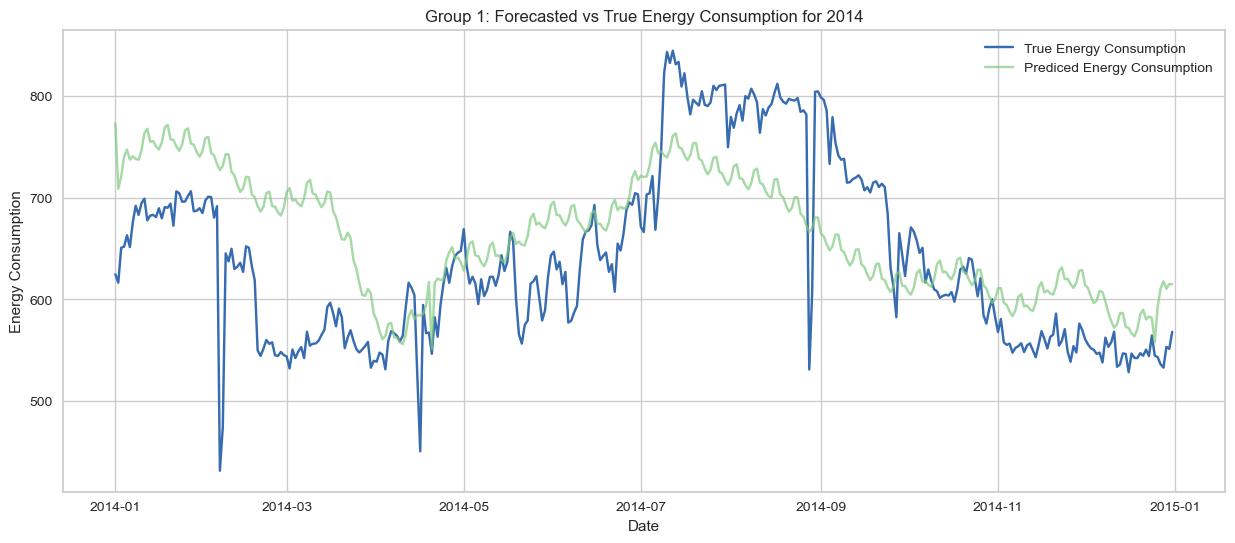

In [60]:
plt.figure(figsize=(15, 6))
plt.plot(df_1_test['ds'], y_1_true, label='True Energy Consumption')
plt.plot(df_1_test['ds'], y_1_pred, label='Prediced Energy Consumption', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Group 1: Forecasted vs True Energy Consumption for 2014')
plt.legend()
plt.show()

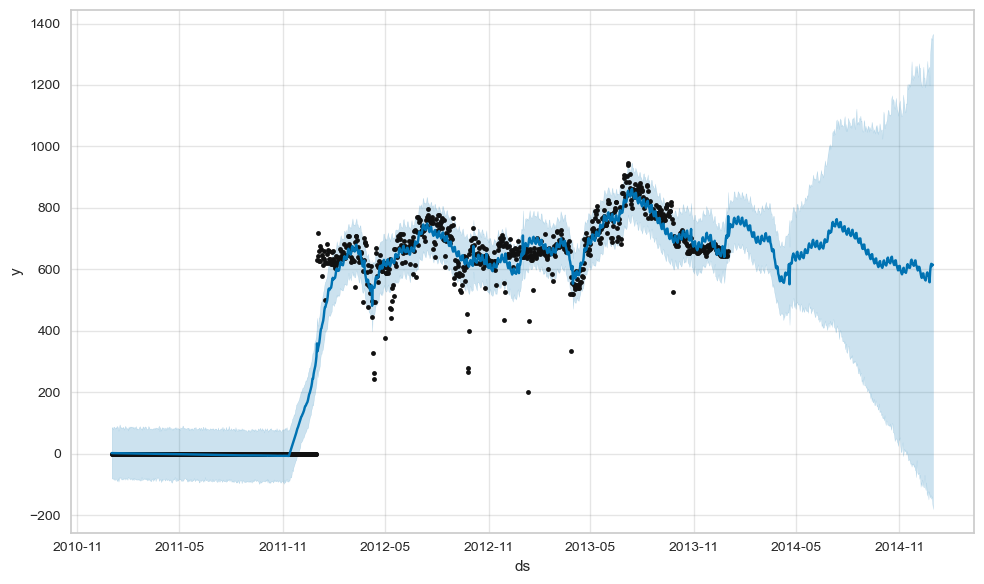

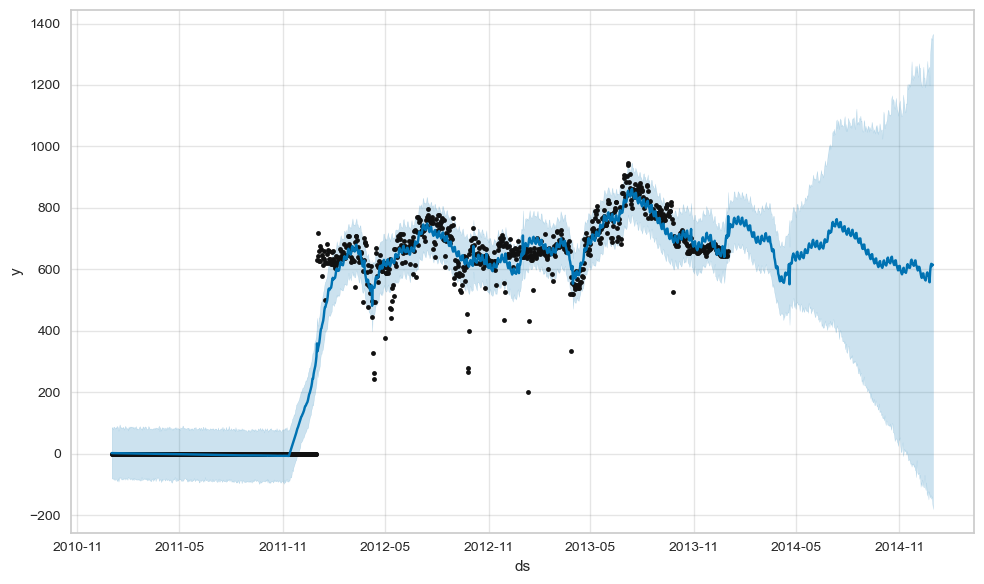

In [61]:
m1.plot(forecast_1)

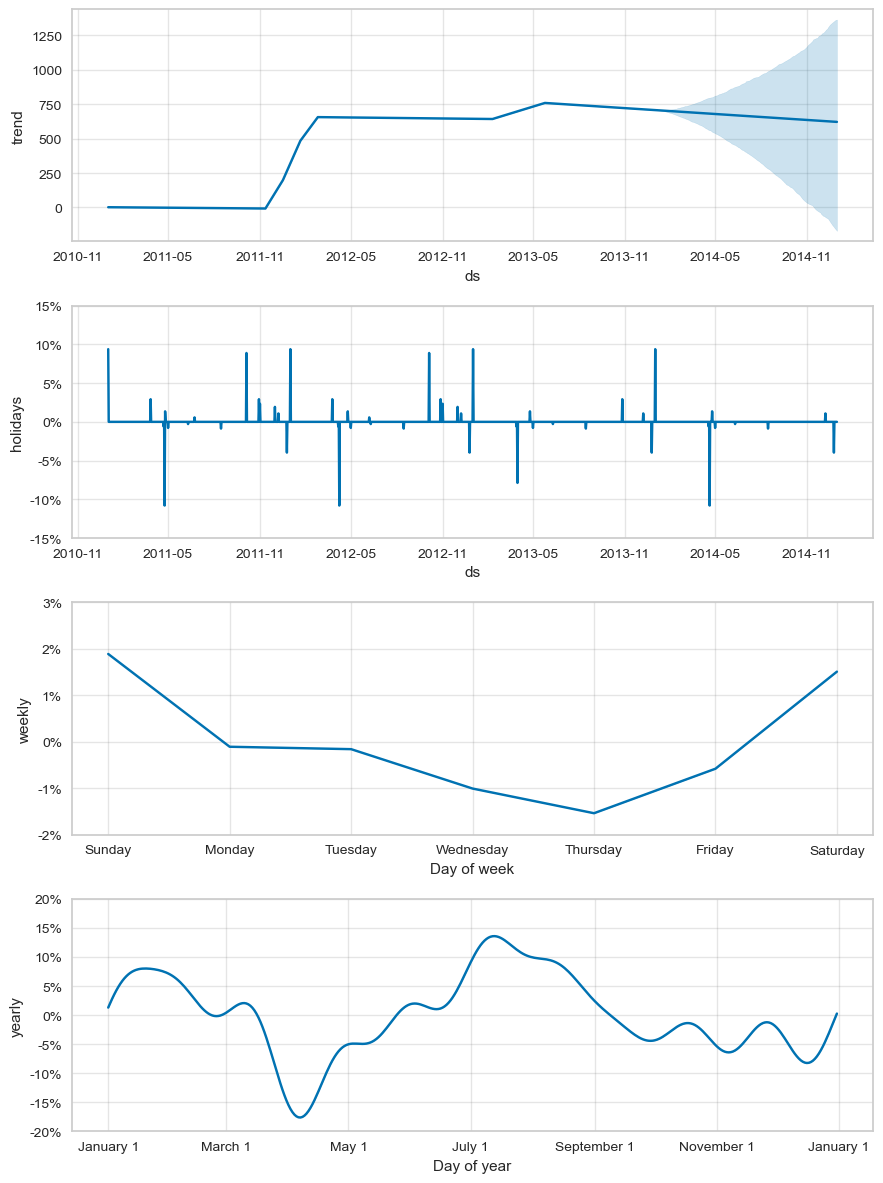

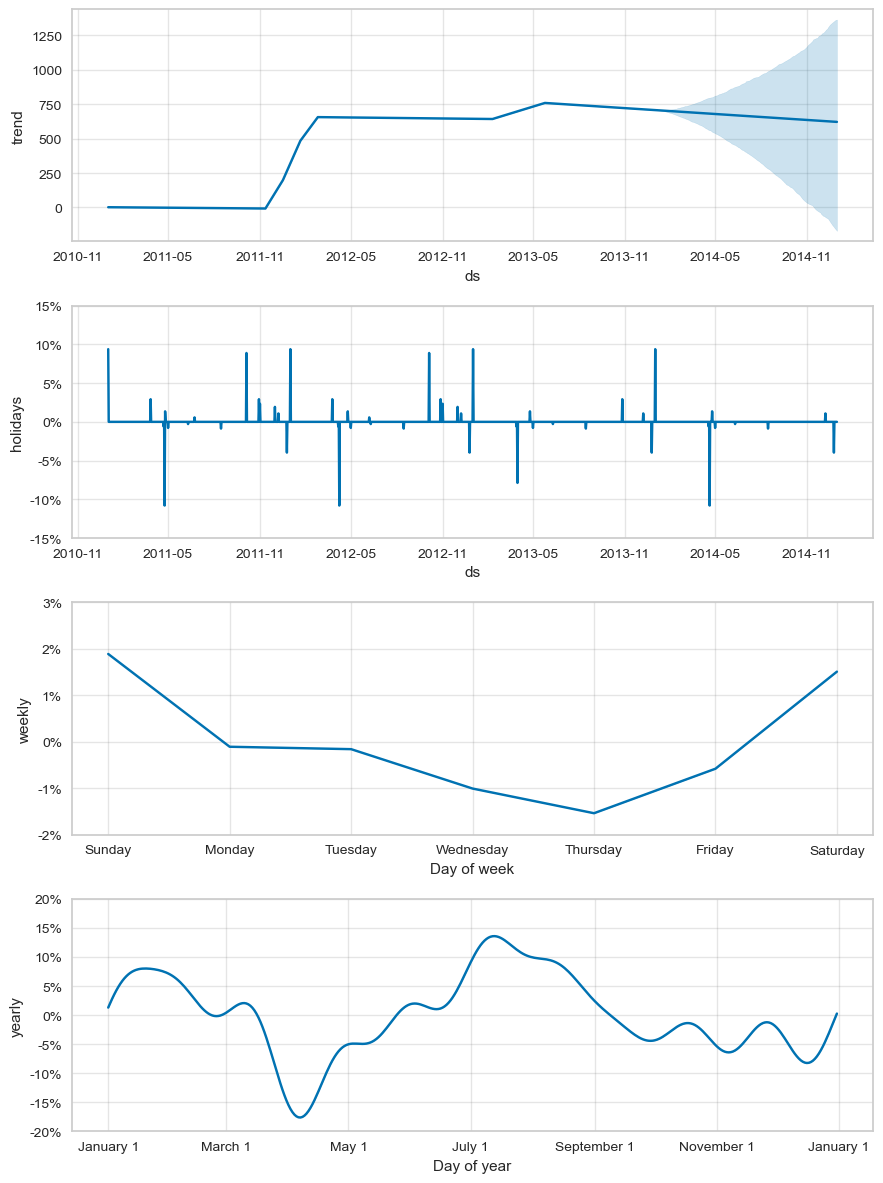

In [62]:
m1.plot_components(forecast_1)

In [63]:
# Calculate MAPE
# first 90 days
group_1_mape_1 = np.mean(np.abs((y_1_true[:90] - y_1_pred[:90]) / y_1_true[:90])) * 100
# second 90 days
group_1_mape_2 = np.mean(np.abs((y_1_true[90:180] - y_1_pred[90:180]) / y_1_true[90:180])) * 100
# third 90 days
group_1_mape_3 = np.mean(np.abs((y_1_true[180:270] - y_1_pred[180:270]) / y_1_true[180:270])) * 100
# fourth 90 days
group_1_mape_4 = np.mean(np.abs((y_1_true[270:360] - y_1_pred[270:360]) / y_1_true[270:360])) * 100
print(f'MAPE: {group_1_mape_1}%')
print(f'MAPE: {group_1_mape_2}%')
print(f'MAPE: {group_1_mape_3}%')
print(f'MAPE: {group_1_mape_4}%')

MAPE: 16.647177363799788%
MAPE: 6.153098584140276%
MAPE: 10.01943895703973%
MAPE: 6.241485989268138%


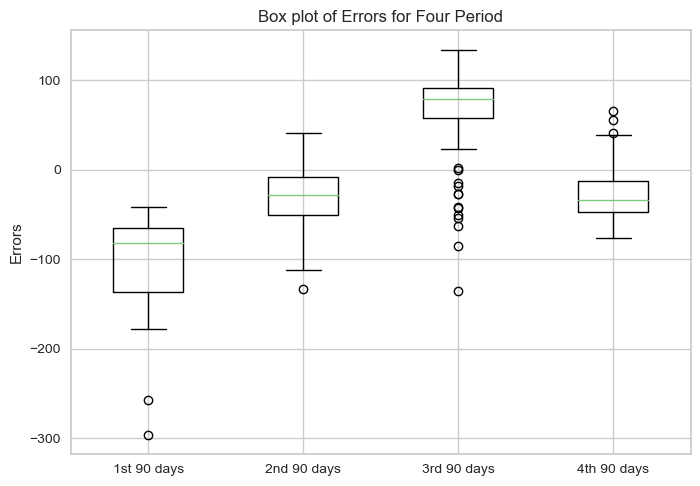

In [64]:
data1 = y_1_true[:90] - y_1_pred[:90]
data2 = y_1_true[90:180] - y_1_pred[90:180]
data3 = y_1_true[180:270] - y_1_pred[180:270]
data4 = y_1_true[270:360] - y_1_pred[270:360]

# Combine the data into a list of arrays
data_to_plot = [data1, data2, data3, data4]

# Create the box plot
plt.boxplot(data_to_plot)

# Customize the plot
plt.title('Box plot of Errors for Four Period')
plt.ylabel('Errors')
plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

# Display the plot
plt.show()

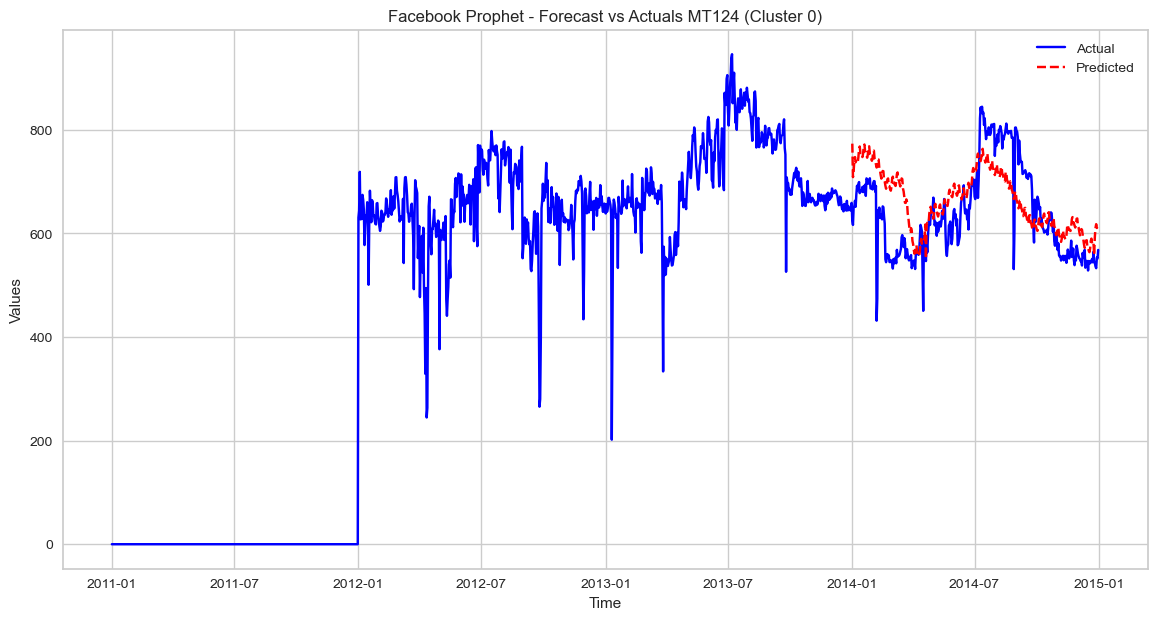

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(df_1['ds'], df_1['y'], label='Actual', color='blue')
plt.plot(df_1_test['ds'], y_1_pred, label='Predicted', color='red', linestyle='--')
plt.title('Facebook Prophet - Forecast vs Actuals MT124 (Cluster 0)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

### Group 2

In [66]:
# group 2
# multiplicative performs better than 'additive'
param_grid = { 
    'changepoint_prior_scale': [0.03, 0.05, 0.07, 0.1],
    'seasonality_prior_scale': [1, 10, 20, 30],
    'holidays_prior_scale': [5, 10, 20, 30],
    'seasonality_mode': ['multiplicative']
}

results_2 = []

for cps in param_grid['changepoint_prior_scale']:
    for sps in param_grid['seasonality_prior_scale']:
        for hps in param_grid['holidays_prior_scale']:
            for sm in param_grid['seasonality_mode']:
                
                # Initialize and fit Prophet model
                m2 = Prophet(
                     yearly_seasonality=True,
                     weekly_seasonality=True,
                     daily_seasonality=False,
                     holidays=holidays,
                     changepoint_prior_scale=cps,
                     seasonality_prior_scale=sps,
                     holidays_prior_scale=hps,
                     seasonality_mode=sm
                )
                m2.add_country_holidays(country_name='Portugal')
                m2.fit(df_2_train)
                
                # Perform cross-validation
                df_2_cv = cross_validation(m2, initial='547 days', period='90 days', horizon = '180 days')
                
                # Calculate MAPE
                mape = mean_absolute_percentage_error(df_2_cv['y'], df_2_cv['yhat'])
                
                # Store results
                results_2.append({'MAPE': mape, 'changepoint_prior_scale': cps,
                                'seasonality_prior_scale': sps, 'holidays_prior_scale': hps,
                                'seasonality_mode': sm})

# Find the best parameters
best_params_2 = min(results_2, key=lambda x: x['MAPE'])

print("Best Parameters:", best_params_2)

14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing
14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing
14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing
14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing
14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:28 - cmdstanpy - INFO - Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:38 - cmdstanpy - INFO - Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:43 - cmdstanpy - INFO - Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:45 - cmdstanpy - INFO - Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing
14:32:46 - cmdstanpy - INFO - Chain [1] done processing
14:32:46 - cmdstanpy - INFO - Chain [1] start processing
14:32:46 - cmdstanpy - INFO - Chain [1] done processing
14:32:46 - cmdstanpy - INFO - Chain [1] start processing
14:32:46 - cmdstanpy - INFO - Chain [1] done processing
14:32:46 - cmdstanpy - INFO - Chain [1] start processing
14:32:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:46 - cmdstanpy - INFO - Chain [1] start processing
14:32:46 - cmdstanpy - INFO - Chain [1] done processing
14:32:46 - cmdstanpy - INFO - Chain [1] start processing
14:32:46 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:47 - cmdstanpy - INFO - Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:47 - cmdstanpy - INFO - Chain [1] start processing
14:32:47 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] start processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] start processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] start processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:48 - cmdstanpy - INFO - Chain [1] start processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:48 - cmdstanpy - INFO - Chain [1] start processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
14:32:49 - cmdstanpy - INFO - Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
14:32:49 - cmdstanpy - INFO - Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
14:32:49 - cmdstanpy - INFO - Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
14:32:49 - cmdstanpy - INFO - Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
14:32:49 - cmdstanpy - INFO - Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:49 - cmdstanpy - INFO - Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:51 - cmdstanpy - INFO - Chain [1] start processing
14:32:51 - cmdstanpy - INFO - Chain [1] done processing
14:32:51 - cmdstanpy - INFO - Chain [1] start processing
14:32:51 - cmdstanpy - INFO - Chain [1] done processing
14:32:51 - cmdstanpy - INFO - Chain [1] start processing
14:32:51 - cmdstanpy - INFO - Chain [1] done processing
14:32:51 - cmdstanpy - INFO - Chain [1] start processing
14:32:51 - cmdstanpy - INFO - Chain [1] done processing
14:32:51 - cmdstanpy - INFO - Chain [1] start processing
14:32:51 - cmdstanpy - INFO - Chain [1] done processing
14:32:51 - cmdstanpy - INFO - Chain [1] start processing
14:32:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:52 - cmdstanpy - INFO - Chain [1] start processing
14:32:52 - cmdstanpy - INFO - Chain [1] done processing
14:32:52 - cmdstanpy - INFO - Chain [1] start processing
14:32:52 - cmdstanpy - INFO - Chain [1] done processing
14:32:52 - cmdstanpy - INFO - Chain [1] start processing
14:32:52 - cmdstanpy - INFO - Chain [1] done processing
14:32:52 - cmdstanpy - INFO - Chain [1] start processing
14:32:52 - cmdstanpy - INFO - Chain [1] done processing
14:32:52 - cmdstanpy - INFO - Chain [1] start processing
14:32:52 - cmdstanpy - INFO - Chain [1] done processing
14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:53 - cmdstanpy - INFO - Chain [1] done processing
14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:53 - cmdstanpy - INFO - Chain [1] done processing
14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:53 - cmdstanpy - INFO - Chain [1] done processing
14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:53 - cmdstanpy - INFO - Chain [1] done processing
14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:54 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:54 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:54 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:54 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:54 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:55 - cmdstanpy - INFO - Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing
14:32:55 - cmdstanpy - INFO - Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:55 - cmdstanpy - INFO - Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing
14:32:55 - cmdstanpy - INFO - Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing
14:32:55 - cmdstanpy - INFO - Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing
14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing
14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing
14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing
14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing
14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing
14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing
14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing
14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing
14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing
14:32:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing
14:32:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing
14:32:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing
14:32:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:32:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:00 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing
14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
14:33:03 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
14:33:03 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:03 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
14:33:03 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:04 - cmdstanpy - INFO - Chain [1] start processing
14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing
14:33:05 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing
14:33:05 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing
14:33:05 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing
14:33:05 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing
14:33:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing
14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing
14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing
14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing
14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing
14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing
14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing
14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing
14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing
14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing
14:33:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:08 - cmdstanpy - INFO - Chain [1] start processing
14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing
14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing
14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing
14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing
14:33:09 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:09 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing
14:33:09 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing
14:33:09 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing
14:33:09 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:11 - cmdstanpy - INFO - Chain [1] start processing
14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] start processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] start processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] start processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:15 - cmdstanpy - INFO - Chain [1] start processing
14:33:15 - cmdstanpy - INFO - Chain [1] done processing
14:33:15 - cmdstanpy - INFO - Chain [1] start processing
14:33:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:15 - cmdstanpy - INFO - Chain [1] start processing
14:33:15 - cmdstanpy - INFO - Chain [1] done processing
14:33:15 - cmdstanpy - INFO - Chain [1] start processing
14:33:15 - cmdstanpy - INFO - Chain [1] done processing
14:33:15 - cmdstanpy - INFO - Chain [1] start processing
14:33:16 - cmdstanpy - INFO - Chain [1] done processing
14:33:16 - cmdstanpy - INFO - Chain [1] start processing
14:33:16 - cmdstanpy - INFO - Chain [1] done processing
14:33:16 - cmdstanpy - INFO - Chain [1] start processing
14:33:16 - cmdstanpy - INFO - Chain [1] done processing
14:33:16 - cmdstanpy - INFO - Chain [1] start processing
14:33:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:16 - cmdstanpy - INFO - Chain [1] start processing
14:33:16 - cmdstanpy - INFO - Chain [1] done processing
14:33:17 - cmdstanpy - INFO - Chain [1] start processing
14:33:17 - cmdstanpy - INFO - Chain [1] done processing
14:33:17 - cmdstanpy - INFO - Chain [1] start processing
14:33:17 - cmdstanpy - INFO - Chain [1] done processing
14:33:17 - cmdstanpy - INFO - Chain [1] start processing
14:33:17 - cmdstanpy - INFO - Chain [1] done processing
14:33:17 - cmdstanpy - INFO - Chain [1] start processing
14:33:17 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing
14:33:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:18 - cmdstanpy - INFO - Chain [1] start processing
14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing
14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing
14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing
14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:19 - cmdstanpy - INFO - Chain [1] start processing
14:33:19 - cmdstanpy - INFO - Chain [1] done processing
14:33:19 - cmdstanpy - INFO - Chain [1] start processing
14:33:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:19 - cmdstanpy - INFO - Chain [1] start processing
14:33:19 - cmdstanpy - INFO - Chain [1] done processing
14:33:19 - cmdstanpy - INFO - Chain [1] start processing
14:33:19 - cmdstanpy - INFO - Chain [1] done processing
14:33:19 - cmdstanpy - INFO - Chain [1] start processing
14:33:19 - cmdstanpy - INFO - Chain [1] done processing
14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing
14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing
14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing
14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:21 - cmdstanpy - INFO - Chain [1] done processing
14:33:21 - cmdstanpy - INFO - Chain [1] start processing
14:33:21 - cmdstanpy - INFO - Chain [1] done processing
14:33:21 - cmdstanpy - INFO - Chain [1] start processing
14:33:21 - cmdstanpy - INFO - Chain [1] done processing
14:33:21 - cmdstanpy - INFO - Chain [1] start processing
14:33:21 - cmdstanpy - INFO - Chain [1] done processing
14:33:21 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:22 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing
14:33:22 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing
14:33:22 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing
14:33:22 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing
14:33:22 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing
14:33:23 - cmdstanpy - INFO - Chain [1] start processing
14:33:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:23 - cmdstanpy - INFO - Chain [1] start processing
14:33:23 - cmdstanpy - INFO - Chain [1] done processing
14:33:23 - cmdstanpy - INFO - Chain [1] start processing
14:33:23 - cmdstanpy - INFO - Chain [1] done processing
14:33:24 - cmdstanpy - INFO - Chain [1] start processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing
14:33:24 - cmdstanpy - INFO - Chain [1] start processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing
14:33:24 - cmdstanpy - INFO - Chain [1] start processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing
14:33:24 - cmdstanpy - INFO - Chain [1] start processing
14:33:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:25 - cmdstanpy - INFO - Chain [1] start processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] start processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] start processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] start processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:25 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing
14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:27 - cmdstanpy - INFO - Chain [1] done processing
14:33:27 - cmdstanpy - INFO - Chain [1] start processing
14:33:27 - cmdstanpy - INFO - Chain [1] done processing
14:33:27 - cmdstanpy - INFO - Chain [1] start processing
14:33:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:27 - cmdstanpy - INFO - Chain [1] start processing
14:33:27 - cmdstanpy - INFO - Chain [1] done processing
14:33:27 - cmdstanpy - INFO - Chain [1] start processing
14:33:27 - cmdstanpy - INFO - Chain [1] done processing
14:33:27 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] done processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] done processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] done processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:28 - cmdstanpy - INFO - Chain [1] done processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:29 - cmdstanpy - INFO - Chain [1] done processing
14:33:29 - cmdstanpy - INFO - Chain [1] start processing
14:33:29 - cmdstanpy - INFO - Chain [1] done processing
14:33:29 - cmdstanpy - INFO - Chain [1] start processing
14:33:29 - cmdstanpy - INFO - Chain [1] done processing
14:33:29 - cmdstanpy - INFO - Chain [1] start processing
14:33:29 - cmdstanpy - INFO - Chain [1] done processing
14:33:29 - cmdstanpy - INFO - Chain [1] start processing
14:33:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:30 - cmdstanpy - INFO - Chain [1] start processing
14:33:30 - cmdstanpy - INFO - Chain [1] done processing
14:33:30 - cmdstanpy - INFO - Chain [1] start processing
14:33:30 - cmdstanpy - INFO - Chain [1] done processing
14:33:30 - cmdstanpy - INFO - Chain [1] start processing
14:33:30 - cmdstanpy - INFO - Chain [1] done processing
14:33:30 - cmdstanpy - INFO - Chain [1] start processing
14:33:30 - cmdstanpy - INFO - Chain [1] done processing
14:33:30 - cmdstanpy - INFO - Chain [1] start processing
14:33:31 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'MAPE': 0.1286777952042697, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 20, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


In [67]:
m2 = Prophet(yearly_seasonality=True,
             weekly_seasonality=True,
             daily_seasonality=False,
             holidays=holidays,
             changepoint_prior_scale=best_params_2['changepoint_prior_scale'],
             seasonality_prior_scale=best_params_2['seasonality_prior_scale'],
             holidays_prior_scale=best_params_2['holidays_prior_scale'],
             seasonality_mode=best_params_2['seasonality_mode'])
m2.add_country_holidays(country_name='Portugal')
m2.fit(df_2_train)

14:33:31 - cmdstanpy - INFO - Chain [1] start processing
14:33:31 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
date_to_forecast = m2.make_future_dataframe(periods=365)
forecast_2 = m2.predict(date_to_forecast)

In [69]:
# Extract the true values and the predicted values
y_2_true = df_2_test['y'].values
y_2_pred = forecast_2['yhat'][-len(df_2_test):].values

# Calculate MAPE
mape_2 = np.mean(np.abs((y_2_true - y_2_pred) / y_2_true)) * 100

# Calculate MSE and RMSE
mse_2 = mean_squared_error(y_2_true, y_2_pred)
rmse_2 = np.sqrt(mse_2)

print(f'MAPE: {mape_2}%')
print(f'MSE: {mse_2}')
print(f'RMSE: {rmse_2}')

MAPE: 5.017433274540442%
MSE: 5969.798992924637
RMSE: 77.26447432633343


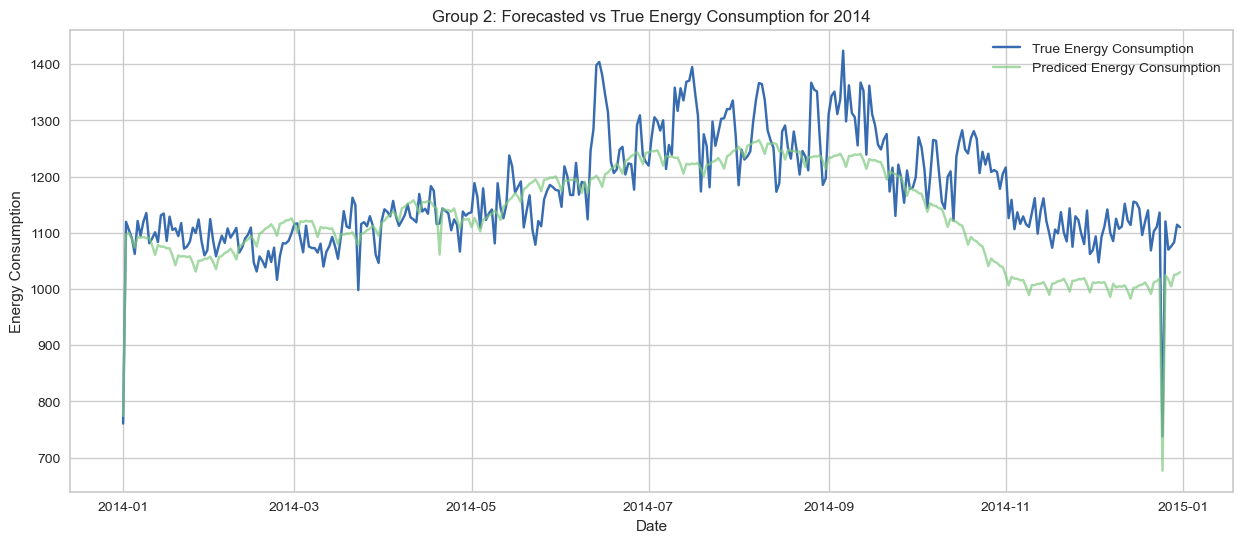

In [70]:
plt.figure(figsize=(15, 6))
plt.plot(df_2_test['ds'], y_2_true, label='True Energy Consumption')
plt.plot(df_2_test['ds'], y_2_pred, label='Prediced Energy Consumption', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Group 2: Forecasted vs True Energy Consumption for 2014')
plt.legend()
plt.show()

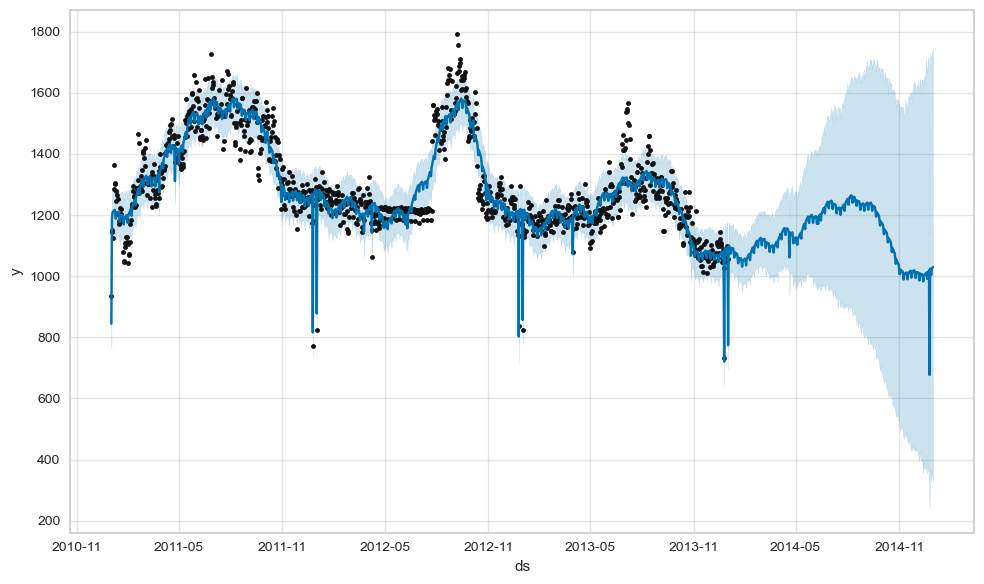

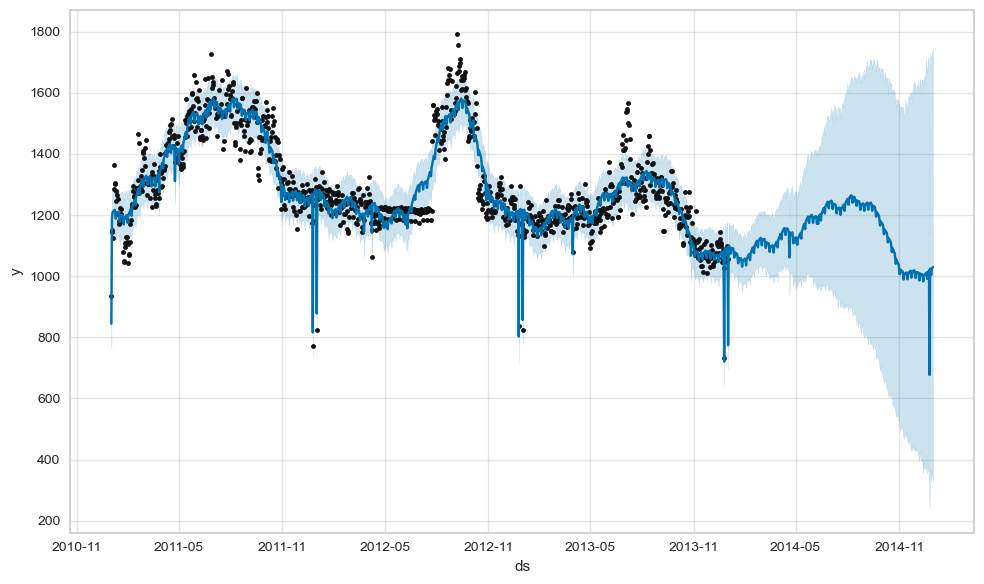

In [71]:
m2.plot(forecast_2)

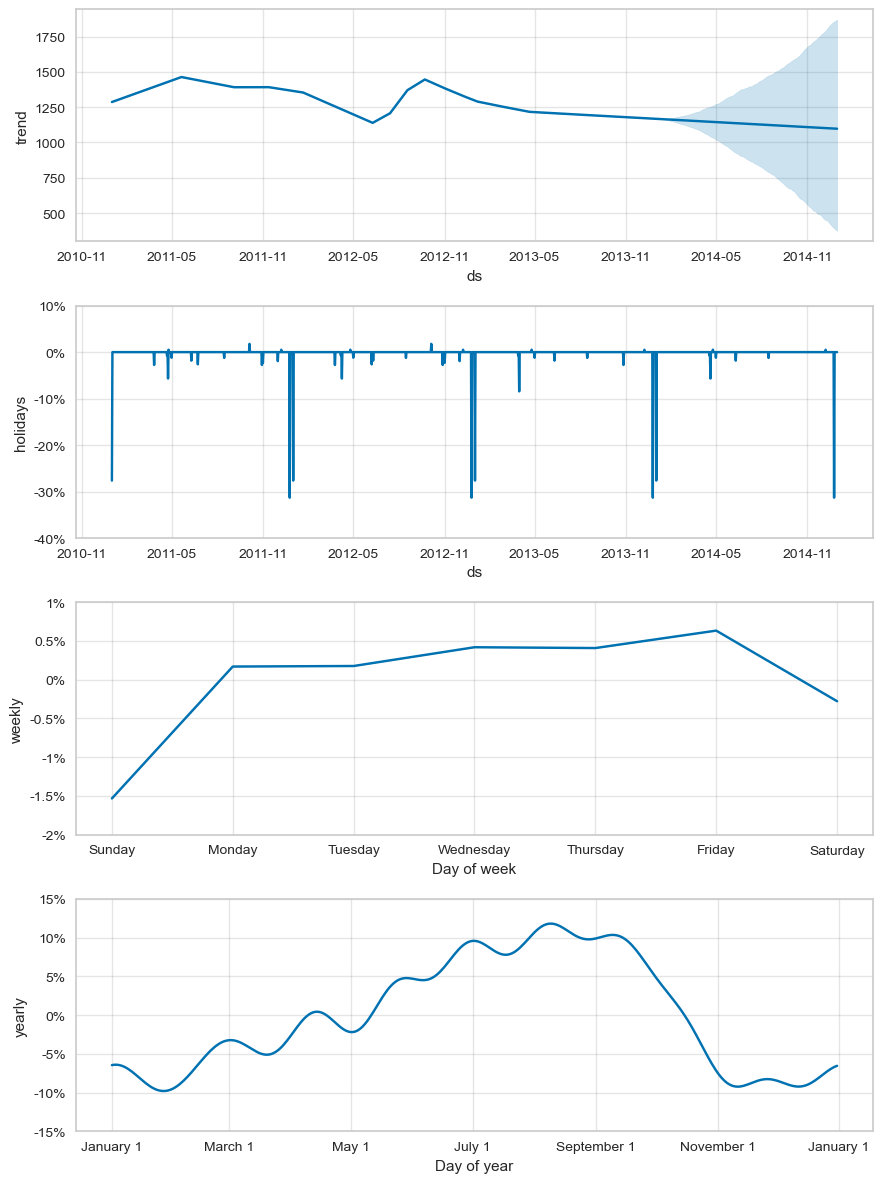

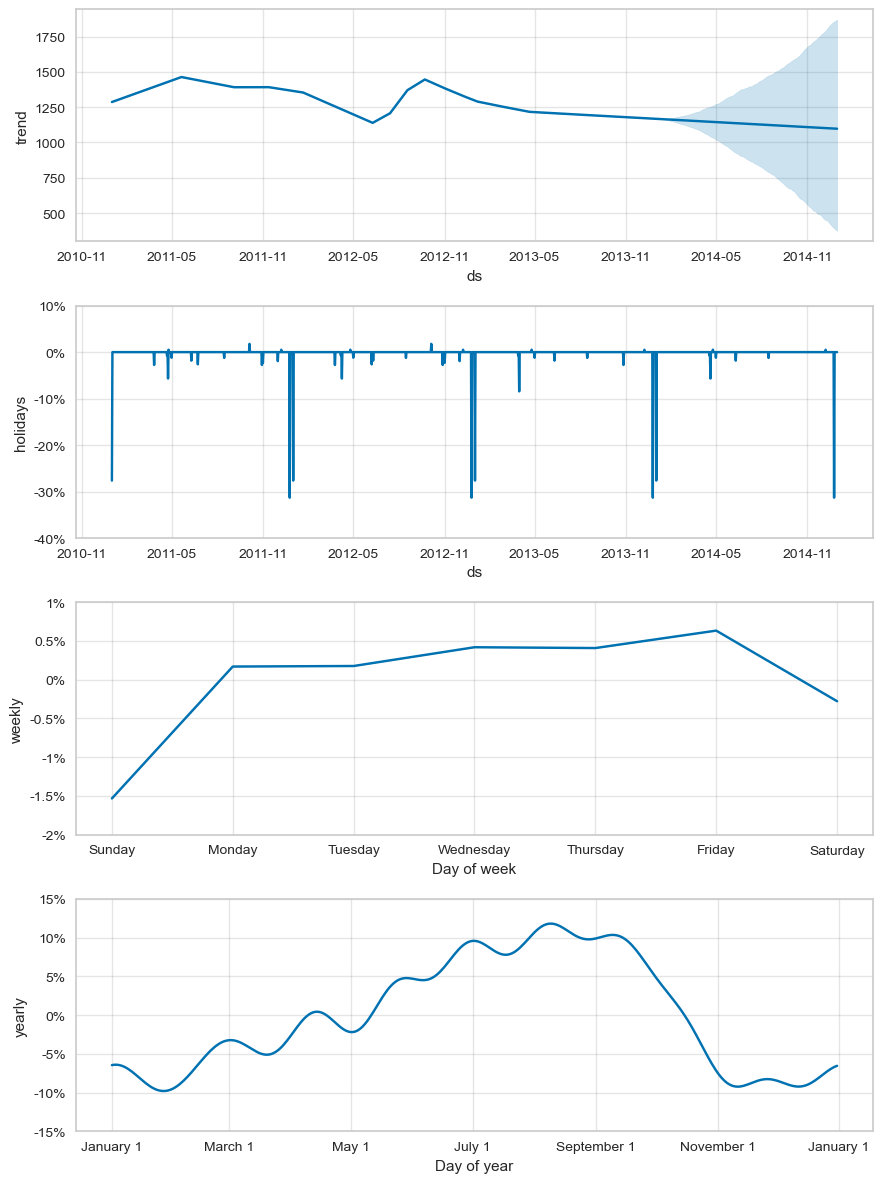

In [72]:
m2.plot_components(forecast_2)

In [73]:
# Calculate MAPE
# first 90 days
group_2_mape_1 = np.mean(np.abs((y_2_true[:90] - y_2_pred[:90]) / y_2_true[:90])) * 100
# second 90 days
group_2_mape_2 = np.mean(np.abs((y_2_true[90:180] - y_2_pred[90:180]) / y_2_true[90:180])) * 100
# third 90 days
group_2_mape_3 = np.mean(np.abs((y_2_true[180:270] - y_2_pred[180:270]) / y_2_true[180:270])) * 100
# fourth 90 days
group_2_mape_4 = np.mean(np.abs((y_2_true[270:360] - y_2_pred[270:360]) / y_2_true[270:360])) * 100
print(f'MAPE: {group_2_mape_1}%')
print(f'MAPE: {group_2_mape_2}%')
print(f'MAPE: {group_2_mape_3}%')
print(f'MAPE: {group_2_mape_4}%')

MAPE: 3.00169008788083%
MAPE: 3.0060750596618284%
MAPE: 4.767144687423674%
MAPE: 9.216743136178552%


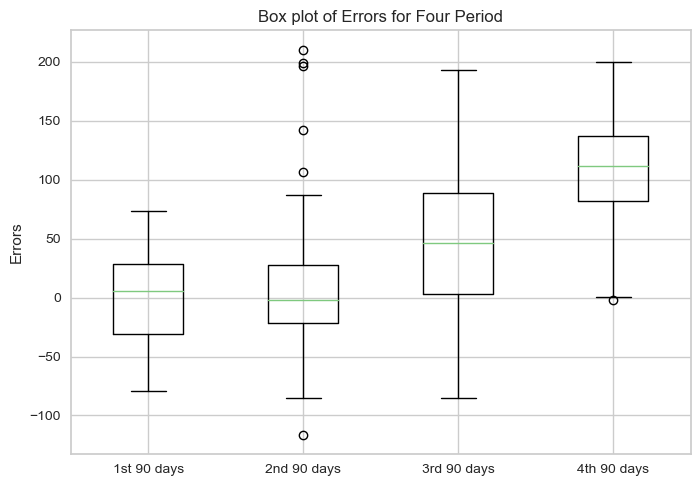

In [74]:
data1 = y_2_true[:90] - y_2_pred[:90]
data2 = y_2_true[90:180] - y_2_pred[90:180]
data3 = y_2_true[180:270] - y_2_pred[180:270]
data4 = y_2_true[270:360] - y_2_pred[270:360]

# Combine the data into a list of arrays
data_to_plot = [data1, data2, data3, data4]

# Create the box plot
plt.boxplot(data_to_plot)

# Customize the plot
plt.title('Box plot of Errors for Four Period')
plt.ylabel('Errors')
plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

# Display the plot
plt.show()

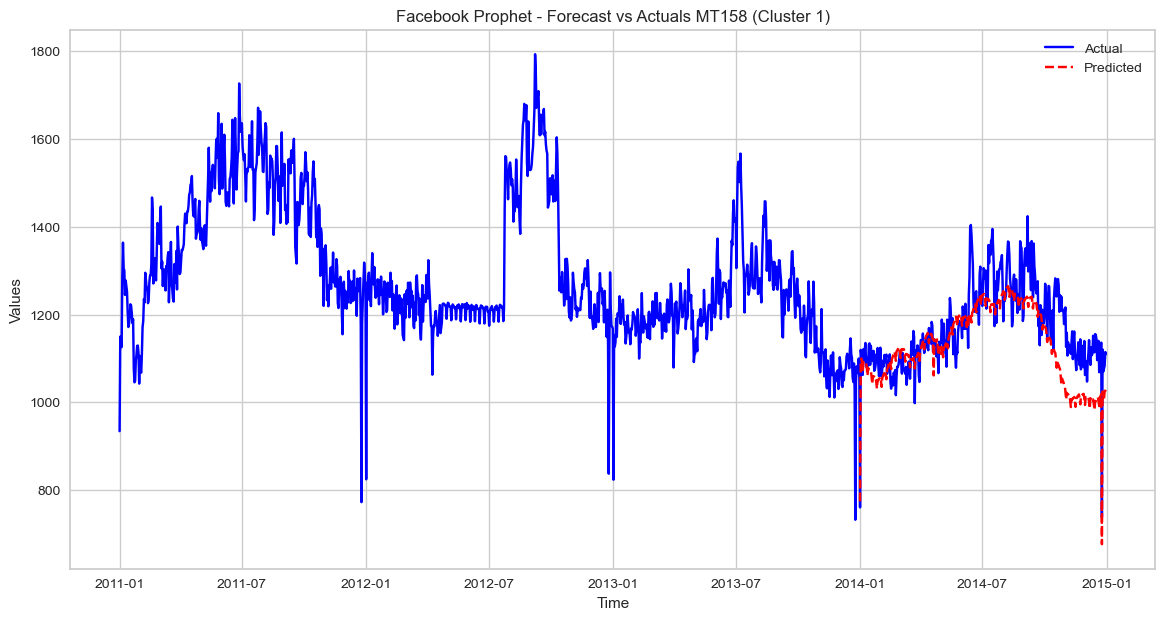

In [75]:
plt.figure(figsize=(14, 7))
plt.plot(df_2['ds'], df_2['y'], label='Actual', color='blue')
plt.plot(df_2_test['ds'], y_2_pred, label='Predicted', color='red', linestyle='--')
plt.title('Facebook Prophet - Forecast vs Actuals MT158 (Cluster 1)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

### Group 3

In [76]:
# group 3
# multiplicative performs better than additive generally
param_grid = { 
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1, 5, 10],
    'holidays_prior_scale': [0.01, 0.05, 0.1, 0.2, 0.5],
    'seasonality_mode': ['multiplicative']
}

results = []

for cps in param_grid['changepoint_prior_scale']:
    for sps in param_grid['seasonality_prior_scale']:
        for hps in param_grid['holidays_prior_scale']:
            for sm in param_grid['seasonality_mode']:
                
                # Initialize and fit Prophet model
                m3 = Prophet(
                     yearly_seasonality=True,
                     weekly_seasonality=True,
                     daily_seasonality=False,
                     holidays=holidays,
                     changepoint_prior_scale=cps,
                     seasonality_prior_scale=sps,
                     holidays_prior_scale=hps,
                     seasonality_mode=sm
                )
                m3.add_country_holidays(country_name='Portugal')
                m3.fit(df_3_train)
                
                # Perform cross-validation
                df_3_cv = cross_validation(m3, initial='547 days', period='90 days', horizon = '180 days')
                
                # Calculate MAPE
                mape = mean_absolute_percentage_error(df_3_cv['y'], df_3_cv['yhat'])
                
                # Store results
                results.append({'MAPE': mape, 'changepoint_prior_scale': cps,
                                'seasonality_prior_scale': sps, 'holidays_prior_scale': hps,
                                'seasonality_mode': sm})

# Find the best parameters
best_params = min(results, key=lambda x: x['MAPE'])

print("Best Parameters:", best_params)

14:33:51 - cmdstanpy - INFO - Chain [1] start processing
14:33:51 - cmdstanpy - INFO - Chain [1] done processing
14:33:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:51 - cmdstanpy - INFO - Chain [1] start processing
14:33:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:33:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:53 - cmdstanpy - INFO - Chain [1] done processing
14:33:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] done processing
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] done processing
14:33:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:55 - cmdstanpy - INFO - Chain [1] done processing
14:33:55 - cmdstanpy - INFO - Chain [1] start processing
14:33:55 - cmdstanpy - INFO - Chain [1] done processing
14:33:55 - cmdstanpy - INFO - Chain [1] start processing
14:33:55 - cmdstanpy - INFO - Chain [1] done processing
14:33:55 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:33:58 - cmdstanpy - INFO - Chain [1] start processing
14:33:58 - cmdstanpy - INFO - Chain [1] done processing
14:33:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:58 - cmdstanpy - INFO - Chain [1] start processing
14:33:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:59 - cmdstanpy - INFO - Chain [1] start processing
14:33:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:33:59 - cmdstanpy - INFO - Chain [1] start processing
14:34:00 - cmdstanpy - INFO - Chain [1] done processing
14:34:00 - cmdstanpy - INFO - Chain [1] start processing
14:34:00 - cmdstanpy - INFO - Chain [1] done processing
14:34:00 - cmdstanpy - INFO - Chain [1] start processing
14:34:00 - cmdstanpy - INFO - Chain [1] done processing
14:34:01 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:04 - cmdstanpy - INFO - Chain [1] start processing
14:34:04 - cmdstanpy - INFO - Chain [1] done processing
14:34:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:04 - cmdstanpy - INFO - Chain [1] start processing
14:34:04 - cmdstanpy - INFO - Chain [1] done processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] done processing
14:34:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] done processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] done processing
14:34:06 - cmdstanpy - INFO - Chain [1] start processing
14:34:06 - cmdstanpy - INFO - Chain [1] done processing
14:34:06 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:09 - cmdstanpy - INFO - Chain [1] done processing
14:34:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:09 - cmdstanpy - INFO - Chain [1] done processing
14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:09 - cmdstanpy - INFO - Chain [1] done processing
14:34:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain [1] done processing
14:34:10 - cmdstanpy - INFO - Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain [1] done processing
14:34:10 - cmdstanpy - INFO - Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain [1] done processing
14:34:10 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:13 - cmdstanpy - INFO - Chain [1] start processing
14:34:13 - cmdstanpy - INFO - Chain [1] done processing
14:34:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:13 - cmdstanpy - INFO - Chain [1] start processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 - cmdstanpy - INFO - Chain [1] start processing
14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 - cmdstanpy - INFO - Chain [1] start processing
14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing
14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing
14:34:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing
14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing
14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing
14:34:48 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] done processing
14:34:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:53 - cmdstanpy - INFO - Chain [1] start processing
14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:53 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
14:34:55 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:34:58 - cmdstanpy - INFO - Chain [1] start processing
14:34:58 - cmdstanpy - INFO - Chain [1] done processing
14:34:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:58 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:34:59 - cmdstanpy - INFO - Chain [1] start processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - INFO - Chain [1] start processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] start processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:05 - cmdstanpy - INFO - Chain [1] start processing
14:35:05 - cmdstanpy - INFO - Chain [1] done processing
14:35:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:05 - cmdstanpy - INFO - Chain [1] start processing
14:35:06 - cmdstanpy - INFO - Chain [1] done processing
14:35:06 - cmdstanpy - INFO - Chain [1] start processing
14:35:06 - cmdstanpy - INFO - Chain [1] done processing
14:35:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:06 - cmdstanpy - INFO - Chain [1] start processing
14:35:07 - cmdstanpy - INFO - Chain [1] done processing
14:35:07 - cmdstanpy - INFO - Chain [1] start processing
14:35:07 - cmdstanpy - INFO - Chain [1] done processing
14:35:07 - cmdstanpy - INFO - Chain [1] start processing
14:35:07 - cmdstanpy - INFO - Chain [1] done processing
14:35:07 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:12 - cmdstanpy - INFO - Chain [1] start processing
14:35:12 - cmdstanpy - INFO - Chain [1] done processing
14:35:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:12 - cmdstanpy - INFO - Chain [1] start processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing
14:35:13 - cmdstanpy - INFO - Chain [1] start processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing
14:35:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:13 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] done processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] done processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] done processing
14:35:14 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:18 - cmdstanpy - INFO - Chain [1] start processing
14:35:18 - cmdstanpy - INFO - Chain [1] done processing
14:35:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:18 - cmdstanpy - INFO - Chain [1] start processing
14:35:19 - cmdstanpy - INFO - Chain [1] done processing
14:35:19 - cmdstanpy - INFO - Chain [1] start processing
14:35:19 - cmdstanpy - INFO - Chain [1] done processing
14:35:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:19 - cmdstanpy - INFO - Chain [1] start processing
14:35:20 - cmdstanpy - INFO - Chain [1] done processing
14:35:20 - cmdstanpy - INFO - Chain [1] start processing
14:35:20 - cmdstanpy - INFO - Chain [1] done processing
14:35:20 - cmdstanpy - INFO - Chain [1] start processing
14:35:20 - cmdstanpy - INFO - Chain [1] done processing
14:35:20 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] done processing
14:35:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:26 - cmdstanpy - INFO - Chain [1] done processing
14:35:26 - cmdstanpy - INFO - Chain [1] start processing
14:35:26 - cmdstanpy - INFO - Chain [1] done processing
14:35:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:26 - cmdstanpy - INFO - Chain [1] start processing
14:35:27 - cmdstanpy - INFO - Chain [1] done processing
14:35:27 - cmdstanpy - INFO - Chain [1] start processing
14:35:27 - cmdstanpy - INFO - Chain [1] done processing
14:35:27 - cmdstanpy - INFO - Chain [1] start processing
14:35:27 - cmdstanpy - INFO - Chain [1] done processing
14:35:28 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:32 - cmdstanpy - INFO - Chain [1] start processing
14:35:32 - cmdstanpy - INFO - Chain [1] done processing
14:35:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:32 - cmdstanpy - INFO - Chain [1] start processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:33 - cmdstanpy - INFO - Chain [1] start processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:33 - cmdstanpy - INFO - Chain [1] start processing
14:35:34 - cmdstanpy - INFO - Chain [1] done processing
14:35:34 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] done processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] done processing
14:35:35 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:39 - cmdstanpy - INFO - Chain [1] start processing
14:35:40 - cmdstanpy - INFO - Chain [1] done processing
14:35:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:40 - cmdstanpy - INFO - Chain [1] start processing
14:35:40 - cmdstanpy - INFO - Chain [1] done processing
14:35:41 - cmdstanpy - INFO - Chain [1] start processing
14:35:41 - cmdstanpy - INFO - Chain [1] done processing
14:35:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:41 - cmdstanpy - INFO - Chain [1] start processing
14:35:42 - cmdstanpy - INFO - Chain [1] done processing
14:35:42 - cmdstanpy - INFO - Chain [1] start processing
14:35:42 - cmdstanpy - INFO - Chain [1] done processing
14:35:42 - cmdstanpy - INFO - Chain [1] start processing
14:35:42 - cmdstanpy - INFO - Chain [1] done processing
14:35:42 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] done processing
14:35:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:47 - cmdstanpy - INFO - Chain [1] done processing
14:35:47 - cmdstanpy - INFO - Chain [1] start processing
14:35:47 - cmdstanpy - INFO - Chain [1] done processing
14:35:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:47 - cmdstanpy - INFO - Chain [1] start processing
14:35:48 - cmdstanpy - INFO - Chain [1] done processing
14:35:48 - cmdstanpy - INFO - Chain [1] start processing
14:35:48 - cmdstanpy - INFO - Chain [1] done processing
14:35:48 - cmdstanpy - INFO - Chain [1] start processing
14:35:48 - cmdstanpy - INFO - Chain [1] done processing
14:35:48 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - INFO - Chain [1] start processing
14:35:52 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:52 - cmdstanpy - INFO - Chain [1] start processing
14:35:53 - cmdstanpy - INFO - Chain [1] done processing
14:35:53 - cmdstanpy - INFO - Chain [1] start processing
14:35:53 - cmdstanpy - INFO - Chain [1] done processing
14:35:54 - cmdstanpy - INFO - Chain [1] start processing
14:35:54 - cmdstanpy - INFO - Chain [1] done processing
14:35:54 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:56 - cmdstanpy - INFO - Chain [1] done processing
14:35:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:56 - cmdstanpy - INFO - Chain [1] start processing
14:35:57 - cmdstanpy - INFO - Chain [1] done processing
14:35:57 - cmdstanpy - INFO - Chain [1] start processing
14:35:57 - cmdstanpy - INFO - Chain [1] done processing
14:35:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:35:57 - cmdstanpy - INFO - Chain [1] start processing
14:35:58 - cmdstanpy - INFO - Chain [1] done processing
14:35:58 - cmdstanpy - INFO - Chain [1] start processing
14:35:58 - cmdstanpy - INFO - Chain [1] done processing
14:35:58 - cmdstanpy - INFO - Chain [1] start processing
14:35:58 - cmdstanpy - INFO - Chain [1] done processing
14:35:58 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:01 - cmdstanpy - INFO - Chain [1] start processing
14:36:01 - cmdstanpy - INFO - Chain [1] done processing
14:36:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:01 - cmdstanpy - INFO - Chain [1] start processing
14:36:02 - cmdstanpy - INFO - Chain [1] done processing
14:36:02 - cmdstanpy - INFO - Chain [1] start processing
14:36:02 - cmdstanpy - INFO - Chain [1] done processing
14:36:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:02 - cmdstanpy - INFO - Chain [1] start processing
14:36:03 - cmdstanpy - INFO - Chain [1] done processing
14:36:03 - cmdstanpy - INFO - Chain [1] start processing
14:36:03 - cmdstanpy - INFO - Chain [1] done processing
14:36:03 - cmdstanpy - INFO - Chain [1] start processing
14:36:03 - cmdstanpy - INFO - Chain [1] done processing
14:36:03 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] done processing
14:36:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:08 - cmdstanpy - INFO - Chain [1] done processing
14:36:08 - cmdstanpy - INFO - Chain [1] start processing
14:36:08 - cmdstanpy - INFO - Chain [1] done processing
14:36:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:08 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:09 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:13 - cmdstanpy - INFO - Chain [1] done processing
14:36:13 - cmdstanpy - INFO - Chain [1] start processing
14:36:13 - cmdstanpy - INFO - Chain [1] done processing
14:36:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:13 - cmdstanpy - INFO - Chain [1] start processing
14:36:14 - cmdstanpy - INFO - Chain [1] done processing
14:36:14 - cmdstanpy - INFO - Chain [1] start processing
14:36:14 - cmdstanpy - INFO - Chain [1] done processing
14:36:14 - cmdstanpy - INFO - Chain [1] start processing
14:36:14 - cmdstanpy - INFO - Chain [1] done processing
14:36:14 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:17 - cmdstanpy - INFO - Chain [1] start processing
14:36:17 - cmdstanpy - INFO - Chain [1] done processing
14:36:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:17 - cmdstanpy - INFO - Chain [1] start processing
14:36:18 - cmdstanpy - INFO - Chain [1] done processing
14:36:18 - cmdstanpy - INFO - Chain [1] start processing
14:36:18 - cmdstanpy - INFO - Chain [1] done processing
14:36:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:18 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] done processing
14:36:19 - cmdstanpy - INFO - Chain [1] start processing
14:36:19 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 - cmdstanpy - INFO - Chain [1] start processing
14:36:20 - cmdstanpy - INFO - Chain [1] done processing
14:36:20 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:24 - cmdstanpy - INFO - Chain [1] done processing
14:36:24 - cmdstanpy - INFO - Chain [1] start processing
14:36:24 - cmdstanpy - INFO - Chain [1] done processing
14:36:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:24 - cmdstanpy - INFO - Chain [1] start processing
14:36:25 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:26 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] done processing
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] done processing
14:36:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
14:36:31 - cmdstanpy - INFO - Chain [1] done processing
14:36:31 - cmdstanpy - INFO - Chain [1] start processing
14:36:31 - cmdstanpy - INFO - Chain [1] done processing
14:36:31 - cmdstanpy - INFO - Chain [1] start processing
14:36:31 - cmdstanpy - INFO - Chain [1] done processing
14:36:31 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:34 - cmdstanpy - INFO - Chain [1] start processing
14:36:34 - cmdstanpy - INFO - Chain [1] done processing
14:36:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:34 - cmdstanpy - INFO - Chain [1] start processing
14:36:35 - cmdstanpy - INFO - Chain [1] done processing
14:36:35 - cmdstanpy - INFO - Chain [1] start processing
14:36:35 - cmdstanpy - INFO - Chain [1] done processing
14:36:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:35 - cmdstanpy - INFO - Chain [1] start processing
14:36:36 - cmdstanpy - INFO - Chain [1] done processing
14:36:36 - cmdstanpy - INFO - Chain [1] start processing
14:36:36 - cmdstanpy - INFO - Chain [1] done processing
14:36:36 - cmdstanpy - INFO - Chain [1] start processing
14:36:36 - cmdstanpy - INFO - Chain [1] done processing
14:36:36 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] done processing
14:36:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] done processing
14:36:42 - cmdstanpy - INFO - Chain [1] start processing
14:36:42 - cmdstanpy - INFO - Chain [1] done processing
14:36:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:36:42 - cmdstanpy - INFO - Chain [1] start processing
14:36:43 - cmdstanpy - INFO - Chain [1] done processing
14:36:43 - cmdstanpy - INFO - Chain [1] start processing
14:36:43 - cmdstanpy - INFO - Chain [1] done processing
14:36:43 - cmdstanpy - INFO - Chain [1] start processing
14:36:43 - cmdstanpy - INFO - Chain [1] done processing
14:36:43 -

  0%|          | 0/5 [00:00<?, ?it/s]

14:36:45 - cmdstanpy - INFO - Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing
14:36:45 - cmdstanpy - INFO - Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing
14:36:45 - cmdstanpy - INFO - Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing
14:36:45 - cmdstanpy - INFO - Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing
14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:46 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:47 - cmdstanpy - INFO - Chain [1] done processing
14:36:47 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:48 - cmdstanpy - INFO - Chain [1] done processing
14:36:48 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:49 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:51 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing
14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing
14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing
14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing
14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing
14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing
14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing
14:36:53 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:55 - cmdstanpy - INFO - Chain [1] start processing
14:36:55 - cmdstanpy - INFO - Chain [1] done processing
14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing
14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing
14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing
14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing
14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing
14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:56 - cmdstanpy - INFO - Chain [1] start processing
14:36:56 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:57 - cmdstanpy - INFO - Chain [1] start processing
14:36:57 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:58 - cmdstanpy - INFO - Chain [1] done processing
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
14:36:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:00 - cmdstanpy - INFO - Chain [1] start processing
14:37:00 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:01 - cmdstanpy - INFO - Chain [1] done processing
14:37:01 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:02 - cmdstanpy - INFO - Chain [1] start processing
14:37:02 - cmdstanpy - INFO - Chain [1] done processing
14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:03 - cmdstanpy - INFO - Chain [1] done processing
14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:03 - cmdstanpy - INFO - Chain [1] done processing
14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:03 - cmdstanpy - INFO - Chain [1] done processing
14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:03 - cmdstanpy - INFO - Chain [1] done processing
14:37:03 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
14:37:05 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:06 - cmdstanpy - INFO - Chain [1] start processing
14:37:06 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:07 - cmdstanpy - INFO - Chain [1] start processing
14:37:07 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:08 - cmdstanpy - INFO - Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:09 - cmdstanpy - INFO - Chain [1] start processing
14:37:09 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:10 - cmdstanpy - INFO - Chain [1] start processing
14:37:10 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:11 - cmdstanpy - INFO - Chain [1] start processing
14:37:11 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing
14:37:13 - cmdstanpy - INFO - Chain [1] start processing
14:37:13 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing
14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:15 - cmdstanpy - INFO - Chain [1] start processing
14:37:15 - cmdstanpy - INFO - Chain [1] done processing
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing
14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing
14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing
14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing
14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing
14:37:18 - cmdstanpy - INFO - Chain [1] start processing
14:37:18 - cmdstanpy - INFO - Chain [1] done processing
14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing
14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing
14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing
14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing
14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing
14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:20 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing
14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:22 - cmdstanpy - INFO - Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:23 - cmdstanpy - INFO - Chain [1] start processing
14:37:23 - cmdstanpy - INFO - Chain [1] done processing
14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing
14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing
14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing
14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing
14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing
14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:24 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:25 - cmdstanpy - INFO - Chain [1] done processing
14:37:25 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:26 - cmdstanpy - INFO - Chain [1] done processing
14:37:26 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing
14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing
14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing
14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing
14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing
14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing
14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:28 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:29 - cmdstanpy - INFO - Chain [1] start processing
14:37:29 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:30 - cmdstanpy - INFO - Chain [1] start processing
14:37:30 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing
14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:32 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing
14:37:34 - cmdstanpy - INFO - Chain [1] start processing
14:37:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:35 - cmdstanpy - INFO - Chain [1] done processing
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:38 - cmdstanpy - INFO - Chain [1] done processing
14:37:38 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing
14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing
14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing
14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing
14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing
14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing
14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing
14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing
14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing
14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing
14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing
14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing
14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing
14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing
14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing
14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:41 - cmdstanpy - INFO - Chain [1] start processing
14:37:41 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:43 - cmdstanpy - INFO - Chain [1] done processing
14:37:43 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:44 - cmdstanpy - INFO - Chain [1] start processing
14:37:44 - cmdstanpy - INFO - Chain [1] done processing
14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:45 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:46 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:47 - cmdstanpy - INFO - Chain [1] done processing
14:37:47 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing
14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing
14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing
14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing
14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing
14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:48 - cmdstanpy - INFO - Chain [1] done processing
14:37:48 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing
14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing
14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing
14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing
14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing
14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing
14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing
14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing
14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing
14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing
14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing
14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing
14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing
14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing
14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing
14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing
14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:52 - cmdstanpy - INFO - Chain [1] start processing
14:37:52 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:53 - cmdstanpy - INFO - Chain [1] done processing
14:37:53 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:54 - cmdstanpy - INFO - Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:55 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:56 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:57 - cmdstanpy - INFO - Chain [1] done processing
14:37:57 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:58 - cmdstanpy - INFO - Chain [1] start processing
14:37:58 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:37:59 - cmdstanpy - INFO - Chain [1] done processing
14:37:59 - cmdstanpy - INFO - Chain [1] start processing
14:38:00 - cmdstanpy - INFO - Chain [1] done processing
14:38:00 - cmdstanpy - INFO - Chain [1] start processing
14:38:00 - cmdstanpy - INFO - Chain [1] done processing
14:38:00 - cmdstanpy - INFO - Chain [1] start processing
14:38:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:00 - cmdstanpy - INFO - Chain [1] start processing
14:38:00 - cmdstanpy - INFO - Chain [1] done processing
14:38:00 - cmdstanpy - INFO - Chain [1] start processing
14:38:00 - cmdstanpy - INFO - Chain [1] done processing
14:38:01 - cmdstanpy - INFO - Chain [1] start processing
14:38:01 - cmdstanpy - INFO - Chain [1] done processing
14:38:01 - cmdstanpy - INFO - Chain [1] start processing
14:38:01 - cmdstanpy - INFO - Chain [1] done processing
14:38:01 - cmdstanpy - INFO - Chain [1] start processing
14:38:01 - cmdstanpy - INFO - Chain [1] done processing
14:38:01 - cmdstanpy - INFO - Chain [1] start processing
14:38:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:01 - cmdstanpy - INFO - Chain [1] start processing
14:38:01 - cmdstanpy - INFO - Chain [1] done processing
14:38:01 - cmdstanpy - INFO - Chain [1] start processing
14:38:01 - cmdstanpy - INFO - Chain [1] done processing
14:38:02 - cmdstanpy - INFO - Chain [1] start processing
14:38:02 - cmdstanpy - INFO - Chain [1] done processing
14:38:02 - cmdstanpy - INFO - Chain [1] start processing
14:38:02 - cmdstanpy - INFO - Chain [1] done processing
14:38:02 - cmdstanpy - INFO - Chain [1] start processing
14:38:02 - cmdstanpy - INFO - Chain [1] done processing
14:38:02 - cmdstanpy - INFO - Chain [1] start processing
14:38:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:02 - cmdstanpy - INFO - Chain [1] start processing
14:38:02 - cmdstanpy - INFO - Chain [1] done processing
14:38:02 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing
14:38:03 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing
14:38:03 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing
14:38:03 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing
14:38:03 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:03 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing
14:38:03 - cmdstanpy - INFO - Chain [1] start processing
14:38:03 - cmdstanpy - INFO - Chain [1] done processing
14:38:04 - cmdstanpy - INFO - Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing
14:38:04 - cmdstanpy - INFO - Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing
14:38:04 - cmdstanpy - INFO - Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing
14:38:04 - cmdstanpy - INFO - Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:04 - cmdstanpy - INFO - Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing
14:38:04 - cmdstanpy - INFO - Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing
14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:05 - cmdstanpy - INFO - Chain [1] done processing
14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:05 - cmdstanpy - INFO - Chain [1] done processing
14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:05 - cmdstanpy - INFO - Chain [1] done processing
14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:05 - cmdstanpy - INFO - Chain [1] done processing
14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:06 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:06 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:06 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:06 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:06 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:06 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] start processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] start processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] start processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] start processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:07 - cmdstanpy - INFO - Chain [1] start processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:07 - cmdstanpy - INFO - Chain [1] start processing
14:38:07 - cmdstanpy - INFO - Chain [1] done processing
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:11 - cmdstanpy - INFO - Chain [1] start processing
14:38:11 - cmdstanpy - INFO - Chain [1] done processing
14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing
14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing
14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing
14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing
14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing
14:38:12 - cmdstanpy - INFO - Chain [1] start processing
14:38:12 - cmdstanpy - INFO - Chain [1] done processing
14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing
14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing
14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing
14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing
14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:14 - cmdstanpy - INFO - Chain [1] done processing
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:14 - cmdstanpy - INFO - Chain [1] done processing
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:14 - cmdstanpy - INFO - Chain [1] done processing
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:14 - cmdstanpy - INFO - Chain [1] done processing
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:14 - cmdstanpy - INFO - Chain [1] done processing
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
14:38:15 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:16 - cmdstanpy - INFO - Chain [1] done processing
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
14:38:17 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
14:38:17 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
14:38:17 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:17 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
14:38:17 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
14:38:17 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:18 - cmdstanpy - INFO - Chain [1] done processing
14:38:18 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:19 - cmdstanpy - INFO - Chain [1] done processing
14:38:19 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] done processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] done processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] done processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] done processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:21 - cmdstanpy - INFO - Chain [1] done processing
14:38:21 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing
14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing
14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing
14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing
14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing
14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:22 - cmdstanpy - INFO - Chain [1] start processing
14:38:22 - cmdstanpy - INFO - Chain [1] done processing
14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing
14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing
14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing
14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing
14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing
14:38:23 - cmdstanpy - INFO - Chain [1] start processing
14:38:23 - cmdstanpy - INFO - Chain [1] done processing
14:38:24 - cmdstanpy - INFO - Chain [1] start processing
14:38:24 - cmdstanpy - INFO - Chain [1] done processing
14:38:24 - cmdstanpy - INFO - Chain [1] start processing
14:38:24 - cmdstanpy - INFO - Chain [1] done processing
14:38:24 - cmdstanpy - INFO - Chain [1] start processing
14:38:24 - cmdstanpy - INFO - Chain [1] done processing
14:38:24 - cmdstanpy - INFO - Chain [1] start processing
14:38:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:24 - cmdstanpy - INFO - Chain [1] start processing
14:38:24 - cmdstanpy - INFO - Chain [1] done processing
14:38:24 - cmdstanpy - INFO - Chain [1] start processing
14:38:24 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing
14:38:26 - cmdstanpy - INFO - Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing
14:38:26 - cmdstanpy - INFO - Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing
14:38:26 - cmdstanpy - INFO - Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:26 - cmdstanpy - INFO - Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing
14:38:26 - cmdstanpy - INFO - Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing
14:38:26 - cmdstanpy - INFO - Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:27 - cmdstanpy - INFO - Chain [1] done processing
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:28 - cmdstanpy - INFO - Chain [1] done processing
14:38:28 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:29 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:29 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] start processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:30 - cmdstanpy - INFO - Chain [1] start processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] start processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] start processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] start processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:30 - cmdstanpy - INFO - Chain [1] start processing
14:38:30 - cmdstanpy - INFO - Chain [1] done processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing
14:38:31 - cmdstanpy - INFO - Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] done processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] done processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] done processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] done processing
14:38:32 - cmdstanpy - INFO - Chain [1] start processing
14:38:32 - cmdstanpy - INFO - Chain [1] done processing
14:38:33 - cmdstanpy - INFO - Chain [1] start processing
14:38:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:33 - cmdstanpy - INFO - Chain [1] start processing
14:38:33 - cmdstanpy - INFO - Chain [1] done processing
14:38:33 - cmdstanpy - INFO - Chain [1] start processing
14:38:33 - cmdstanpy - INFO - Chain [1] done processing
14:38:33 - cmdstanpy - INFO - Chain [1] start processing
14:38:33 - cmdstanpy - INFO - Chain [1] done processing
14:38:33 - cmdstanpy - INFO - Chain [1] start processing
14:38:33 - cmdstanpy - INFO - Chain [1] done processing
14:38:33 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing
14:38:34 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:34 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing
14:38:34 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing
14:38:34 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing
14:38:34 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing
14:38:34 - cmdstanpy - INFO - Chain [1] start processing
14:38:34 - cmdstanpy - INFO - Chain [1] done processing
14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:35 - cmdstanpy - INFO - Chain [1] done processing
14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:35 - cmdstanpy - INFO - Chain [1] done processing
14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:35 - cmdstanpy - INFO - Chain [1] done processing
14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:35 - cmdstanpy - INFO - Chain [1] done processing
14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
14:38:36 - cmdstanpy - INFO - Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:36 - cmdstanpy - INFO - Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
14:38:36 - cmdstanpy - INFO - Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
14:38:36 - cmdstanpy - INFO - Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
14:38:36 - cmdstanpy - INFO - Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
14:38:36 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing
14:38:37 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:37 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing
14:38:37 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing
14:38:37 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing
14:38:37 - cmdstanpy - INFO - Chain [1] start processing
14:38:37 - cmdstanpy - INFO - Chain [1] done processing
14:38:38 - cmdstanpy - INFO - Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
14:38:38 - cmdstanpy - INFO - Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:38 - cmdstanpy - INFO - Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
14:38:38 - cmdstanpy - INFO - Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
14:38:38 - cmdstanpy - INFO - Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
14:38:38 - cmdstanpy - INFO - Chain [1] start processing
14:38:38 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] start processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] start processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:39 - cmdstanpy - INFO - Chain [1] start processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] start processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] start processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:39 - cmdstanpy - INFO - Chain [1] start processing
14:38:39 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1] start processing
14:38:40 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1] start processing
14:38:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:40 - cmdstanpy - INFO - Chain [1] start processing
14:38:40 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1] start processing
14:38:40 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1] start processing
14:38:40 - cmdstanpy - INFO - Chain [1] done processing
14:38:40 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
14:38:42 - cmdstanpy - INFO - Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
14:38:42 - cmdstanpy - INFO - Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:42 - cmdstanpy - INFO - Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
14:38:42 - cmdstanpy - INFO - Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
14:38:42 - cmdstanpy - INFO - Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
14:38:43 - cmdstanpy - INFO - Chain [1] start processing
14:38:43 - cmdstanpy - INFO - Chain [1] done processing
14:38:43 - cmdstanpy - INFO - Chain [1] start processing
14:38:43 - cmdstanpy - INFO - Chain [1] done processing
14:38:43 - cmdstanpy - INFO - Chain [1] start processing
14:38:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:43 - cmdstanpy - INFO - Chain [1] start processing
14:38:43 - cmdstanpy - INFO - Chain [1] done processing
14:38:43 - cmdstanpy - INFO - Chain [1] start processing
14:38:43 - cmdstanpy - INFO - Chain [1] done processing
14:38:43 - cmdstanpy - INFO - Chain [1] start processing
14:38:43 - cmdstanpy - INFO - Chain [1] done processing
14:38:44 - cmdstanpy - INFO - Chain [1] start processing
14:38:44 - cmdstanpy - INFO - Chain [1] done processing
14:38:44 - cmdstanpy - INFO - Chain [1] start processing
14:38:44 - cmdstanpy - INFO - Chain [1] done processing
14:38:44 - cmdstanpy - INFO - Chain [1] start processing
14:38:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:44 - cmdstanpy - INFO - Chain [1] start processing
14:38:44 - cmdstanpy - INFO - Chain [1] done processing
14:38:44 - cmdstanpy - INFO - Chain [1] start processing
14:38:44 - cmdstanpy - INFO - Chain [1] done processing
14:38:44 - cmdstanpy - INFO - Chain [1] start processing
14:38:44 - cmdstanpy - INFO - Chain [1] done processing
14:38:45 - cmdstanpy - INFO - Chain [1] start processing
14:38:45 - cmdstanpy - INFO - Chain [1] done processing
14:38:45 - cmdstanpy - INFO - Chain [1] start processing
14:38:45 - cmdstanpy - INFO - Chain [1] done processing
14:38:45 - cmdstanpy - INFO - Chain [1] start processing
14:38:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:45 - cmdstanpy - INFO - Chain [1] start processing
14:38:45 - cmdstanpy - INFO - Chain [1] done processing
14:38:45 - cmdstanpy - INFO - Chain [1] start processing
14:38:45 - cmdstanpy - INFO - Chain [1] done processing
14:38:45 - cmdstanpy - INFO - Chain [1] start processing
14:38:45 - cmdstanpy - INFO - Chain [1] done processing
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:46 - cmdstanpy - INFO - Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing
14:38:47 - cmdstanpy - INFO - Chain [1] start processing
14:38:47 - cmdstanpy - INFO - Chain [1] done processing
14:38:47 - cmdstanpy - INFO - Chain [1] start processing
14:38:47 - cmdstanpy - INFO - Chain [1] done processing
14:38:47 - cmdstanpy - INFO - Chain [1] start processing
14:38:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:47 - cmdstanpy - INFO - Chain [1] start processing
14:38:47 - cmdstanpy - INFO - Chain [1] done processing
14:38:47 - cmdstanpy - INFO - Chain [1] start processing
14:38:48 - cmdstanpy - INFO - Chain [1] done processing
14:38:48 - cmdstanpy - INFO - Chain [1] start processing
14:38:48 - cmdstanpy - INFO - Chain [1] done processing
14:38:48 - cmdstanpy - INFO - Chain [1] start processing
14:38:48 - cmdstanpy - INFO - Chain [1] done processing
14:38:48 - cmdstanpy - INFO - Chain [1] start processing
14:38:48 - cmdstanpy - INFO - Chain [1] done processing
14:38:48 - cmdstanpy - INFO - Chain [1] start processing
14:38:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:48 - cmdstanpy - INFO - Chain [1] start processing
14:38:48 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing
14:38:49 - cmdstanpy - INFO - Chain [1] start processing
14:38:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:50 - cmdstanpy - INFO - Chain [1] start processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] start processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] start processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] start processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] start processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
14:38:50 - cmdstanpy - INFO - Chain [1] start processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:51 - cmdstanpy - INFO - Chain [1] start processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] start processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] start processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] start processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:51 - cmdstanpy - INFO - Chain [1] start processing
14:38:51 - cmdstanpy - INFO - Chain [1] done processing
14:38:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing
14:38:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing
14:38:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing
14:38:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing
14:38:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing
14:38:53 - cmdstanpy - INFO - Chain [1] start processing
14:38:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:53 - cmdstanpy - INFO - Chain [1] start processing
14:38:53 - cmdstanpy - INFO - Chain [1] done processing
14:38:53 - cmdstanpy - INFO - Chain [1] start processing
14:38:53 - cmdstanpy - INFO - Chain [1] done processing
14:38:53 - cmdstanpy - INFO - Chain [1] start processing
14:38:53 - cmdstanpy - INFO - Chain [1] done processing
14:38:53 - cmdstanpy - INFO - Chain [1] start processing
14:38:53 - cmdstanpy - INFO - Chain [1] done processing
14:38:53 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:54 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
14:38:55 - cmdstanpy - INFO - Chain [1] start processing
14:38:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

14:38:55 - cmdstanpy - INFO - Chain [1] start processing
14:38:55 - cmdstanpy - INFO - Chain [1] done processing
14:38:55 - cmdstanpy - INFO - Chain [1] start processing
14:38:55 - cmdstanpy - INFO - Chain [1] done processing
14:38:55 - cmdstanpy - INFO - Chain [1] start processing
14:38:55 - cmdstanpy - INFO - Chain [1] done processing
14:38:55 - cmdstanpy - INFO - Chain [1] start processing
14:38:55 - cmdstanpy - INFO - Chain [1] done processing
14:38:55 - cmdstanpy - INFO - Chain [1] start processing
14:38:56 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'MAPE': 1.322940409449604, 'changepoint_prior_scale': 0.02, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'}


In [77]:
m3 = Prophet(yearly_seasonality=True,
             weekly_seasonality=True,
             daily_seasonality=False,
             holidays=holidays,
             changepoint_prior_scale=best_params['changepoint_prior_scale'],
             seasonality_prior_scale=best_params['seasonality_prior_scale'],
             holidays_prior_scale=best_params['holidays_prior_scale'],
             seasonality_mode=best_params['seasonality_mode'])
m3.add_country_holidays(country_name='Portugal')
m3.fit(df_3_train)

14:38:56 - cmdstanpy - INFO - Chain [1] start processing
14:38:56 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
date_to_forecast = m3.make_future_dataframe(periods=365)
forecast_3 = m3.predict(date_to_forecast)

In [79]:
# Extract the true values and the predicted values
y_3_true = df_3_test['y'].values
y_3_pred = forecast_3['yhat'][-len(df_3_test):].values

# Calculate MAPE
mape_3 = np.mean(np.abs((y_3_true - y_3_pred) / y_3_true)) * 100

# Calculate MSE and RMSE
mse_3 = mean_squared_error(y_3_true, y_3_pred)
rmse_3 = np.sqrt(mse_3)

print(f'MAPE: {mape_3}%')
print(f'MSE: {mse_3}')
print(f'RMSE: {rmse_3}')

MAPE: 397.15049266638573%
MSE: 35446.93283824309
RMSE: 188.27355852121957


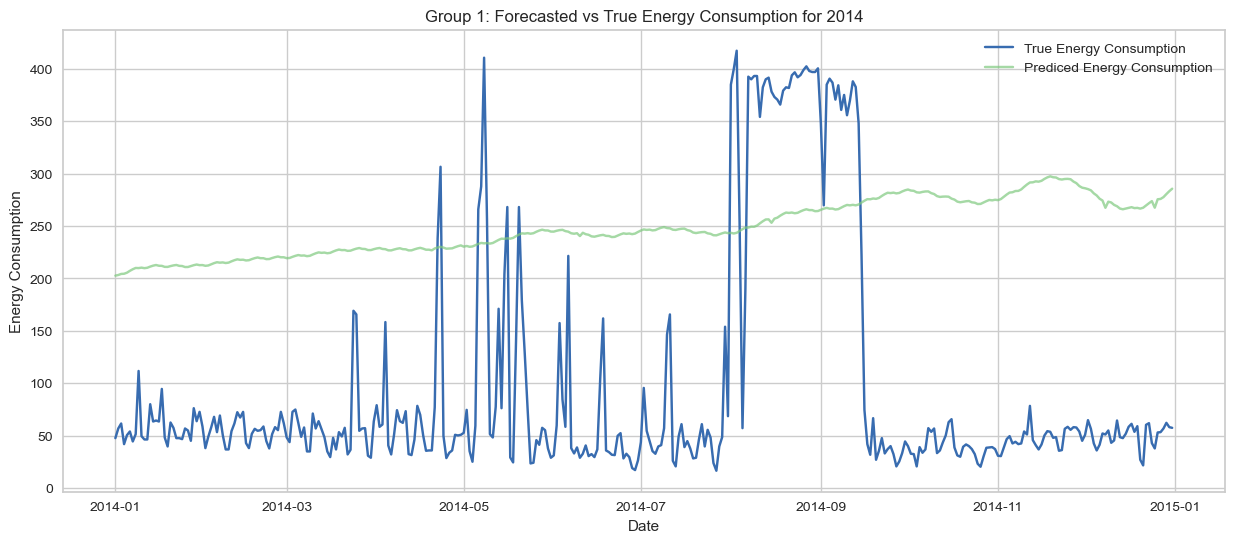

In [80]:
plt.figure(figsize=(15, 6))
plt.plot(df_3_test['ds'], y_3_true, label='True Energy Consumption')
plt.plot(df_3_test['ds'], y_3_pred, label='Prediced Energy Consumption', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Group 1: Forecasted vs True Energy Consumption for 2014')
plt.legend()
plt.show()

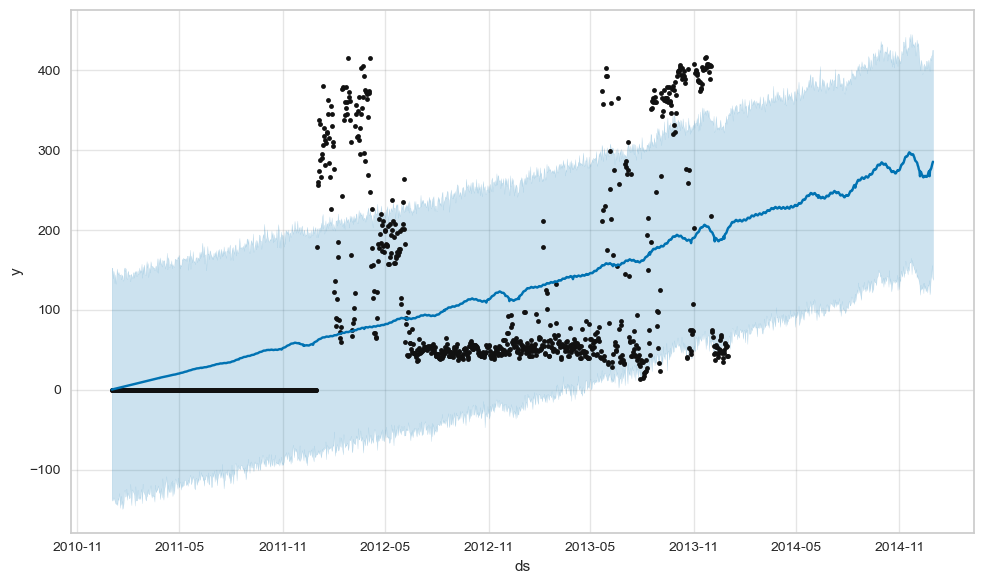

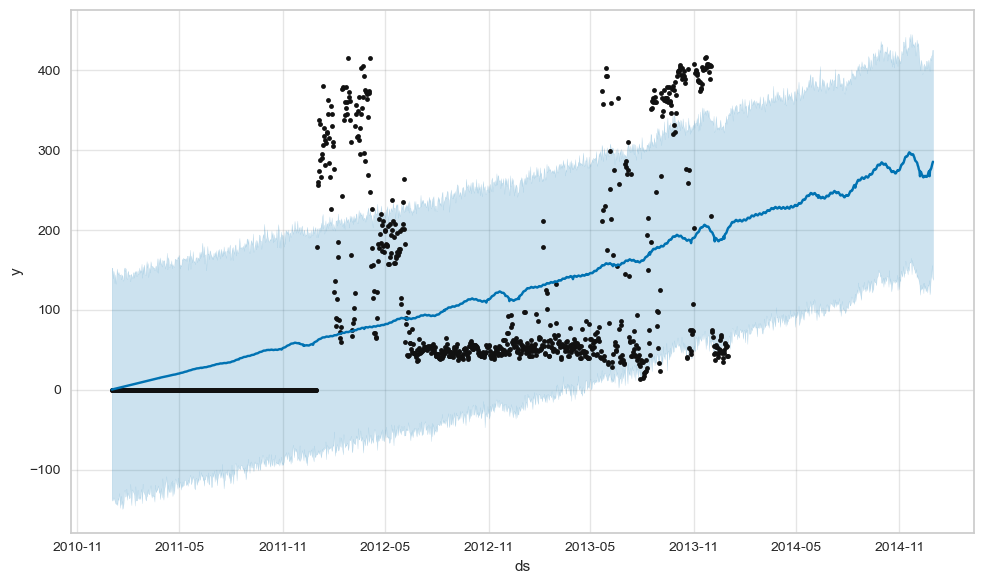

In [81]:
m3.plot(forecast_3)

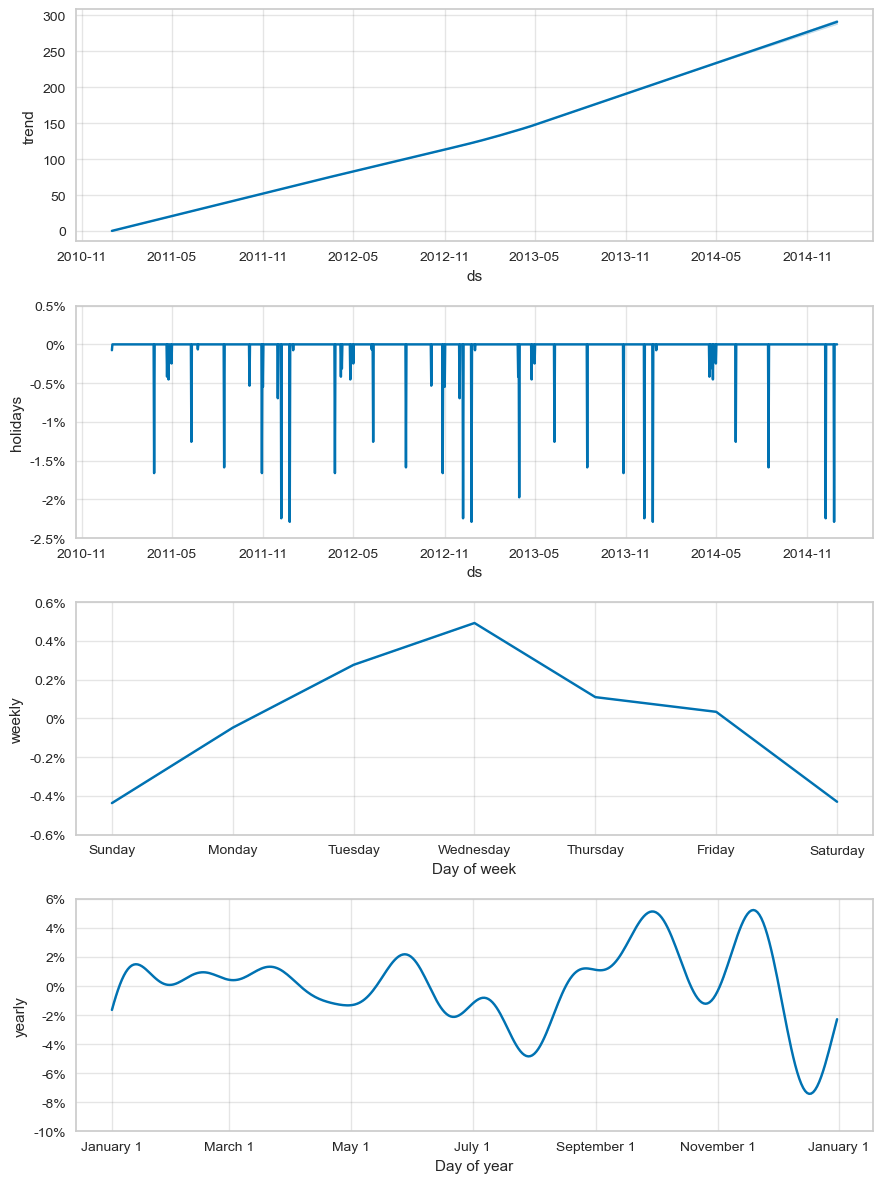

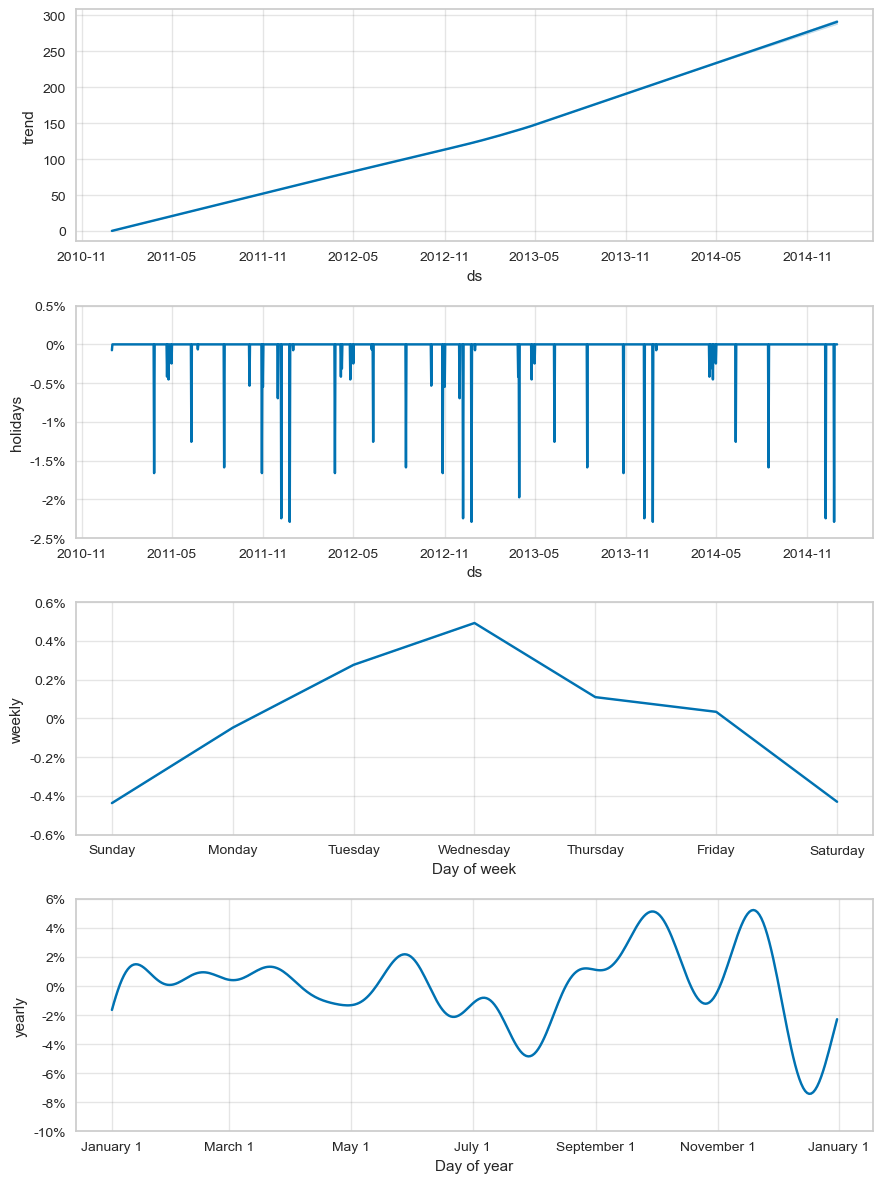

In [82]:
m3.plot_components(forecast_3)

In [83]:
# Calculate MAPE
# first 90 days
group_3_mape_1 = np.mean(np.abs((y_3_true[:90] - y_3_pred[:90]) / y_3_true[:90])) * 100
# second 90 days
group_3_mape_2 = np.mean(np.abs((y_3_true[90:180] - y_3_pred[90:180]) / y_3_true[90:180])) * 100
# third 90 days
group_3_mape_3 = np.mean(np.abs((y_3_true[180:270] - y_3_pred[180:270]) / y_3_true[180:270])) * 100
# fourth 90 days
group_3_mape_4 = np.mean(np.abs((y_3_true[270:360] - y_3_pred[270:360]) / y_3_true[270:360])) * 100
print(f'MAPE: {group_3_mape_1}%')
print(f'MAPE: {group_3_mape_2}%')
print(f'MAPE: {group_3_mape_3}%')
print(f'MAPE: {group_3_mape_4}%')

MAPE: 320.8208798636306%
MAPE: 407.67913954691676%
MAPE: 287.7273985987238%
MAPE: 572.8598423475805%


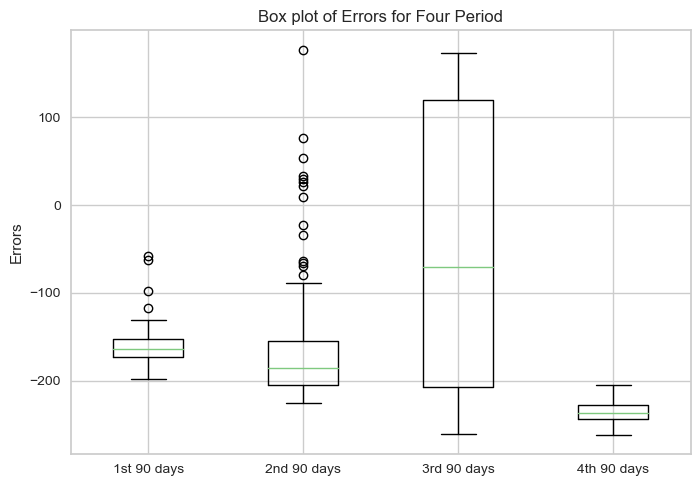

In [84]:
data1 = y_3_true[:90] - y_3_pred[:90]
data2 = y_3_true[90:180] - y_3_pred[90:180]
data3 = y_3_true[180:270] - y_3_pred[180:270]
data4 = y_3_true[270:360] - y_3_pred[270:360]

# Combine the data into a list of arrays
data_to_plot = [data1, data2, data3, data4]

# Create the box plot
plt.boxplot(data_to_plot)

# Customize the plot
plt.title('Box plot of Errors for Four Period')
plt.ylabel('Errors')
plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

# Display the plot
plt.show()

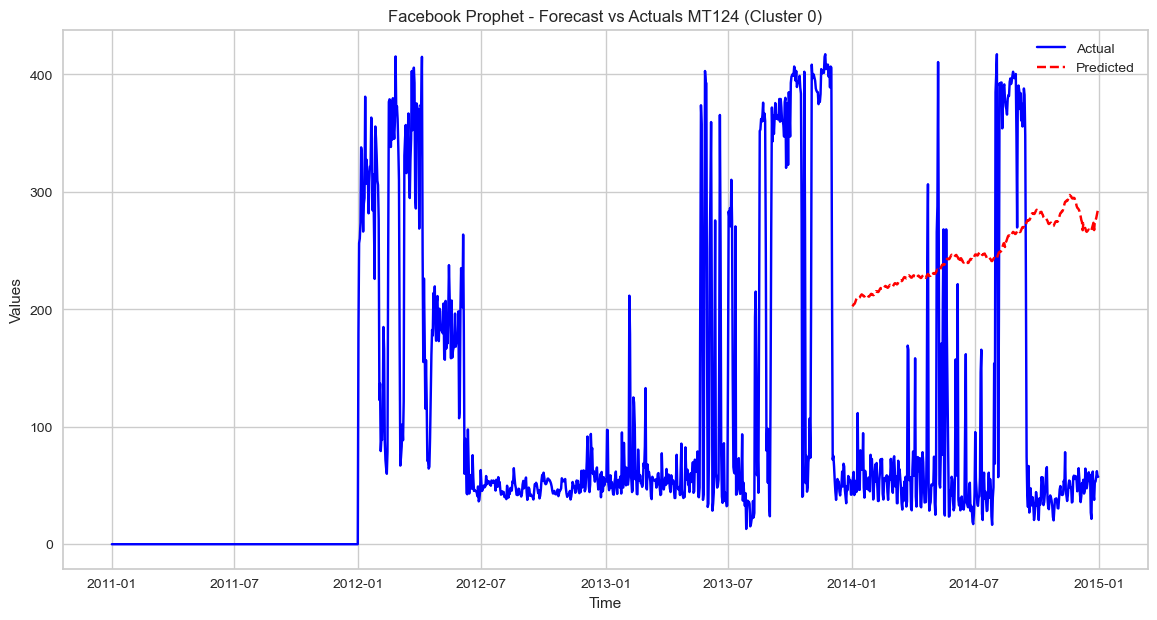

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(df_3['ds'], df_3['y'], label='Actual', color='blue')
plt.plot(df_3_test['ds'], y_3_pred, label='Predicted', color='red', linestyle='--')
plt.title('Facebook Prophet - Forecast vs Actuals MT124 (Cluster 0)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

## Temporal Fusion Transformers

In [19]:
from sklearn.model_selection import train_test_split

# Prepare the three dataframes as specified
df_1 = df_per_day[['Time', 'MT_002']].copy()
df_2 = df_per_day[['Time', 'MT_182']].copy()
df_3 = df_per_day[['Time', 'MT_001']].copy()

# Convert 'Time' to datetime
df_1['Time'] = pd.to_datetime(df_1['Time'], format='%Y-%m-%d')
df_2['Time'] = pd.to_datetime(df_2['Time'], format='%Y-%m-%d')
df_3['Time'] = pd.to_datetime(df_3['Time'], format='%Y-%m-%d')

# Rename columns
df_1.rename(columns = {'Time':'ds', 'MT_002':'y'}, inplace = True)
df_2.rename(columns = {'Time':'ds', 'MT_182':'y'}, inplace = True)
df_3.rename(columns = {'Time':'ds', 'MT_001':'y'}, inplace = True)

# Function to split data into train, validation, and test sets
def split_data(df):
    # Splitting into train+validation (80%) and test (20%)
    train_val, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)
    
    # Splitting train+validation into train (87.5% of 80% -> 70% of total) and validation (12.5% of 80% -> 10% of total)
    train, val = train_test_split(train_val, test_size=0.125, random_state=42, shuffle=False)
    
    return train, val, test

# Splitting the data for each cluster
train_1, val_1, test_1 = split_data(df_1)
train_2, val_2, test_2 = split_data(df_2)
train_3, val_3, test_3 = split_data(df_3)

# Outputting the shape of each split to verify the correctness of the splits
(train_1.shape, val_1.shape, test_1.shape), (train_2.shape, val_2.shape, test_2.shape), (train_3.shape, val_3.shape, test_3.shape)

(((1022, 2), (146, 2), (293, 2)),
 ((1022, 2), (146, 2), (293, 2)),
 ((1022, 2), (146, 2), (293, 2)))

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class GatedLinearUnit(nn.Module):
    def __init__(self, input_size):
        super(GatedLinearUnit, self).__init__()
        self.fc = nn.Linear(input_size, input_size * 2)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc(x)
        return x[:, :x.shape[1]//2] * self.sigmoid(x[:, x.shape[1]//2:])

class TemporalFusionTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TemporalFusionTransformer, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.attention = nn.MultiheadAttention(hidden_size, num_heads=1, batch_first=True)
        self.glu = GatedLinearUnit(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        x, _ = self.attention(x, x, x)
        x = self.glu(x)
        x = self.fc(x[:, -1, :])  # Taking the last time step's output
        return x

#### Use MT_002 for group 1, use MT_182 for group 2, and MT_001 for group 3

### Group 1

Epoch 1/100
18/18 - 2s - loss: 0.1054 - val_loss: 0.0104 - 2s/epoch - 139ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0128 - val_loss: 0.0050 - 295ms/epoch - 16ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0063 - val_loss: 0.0029 - 299ms/epoch - 17ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0056 - val_loss: 0.0022 - 258ms/epoch - 14ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0055 - val_loss: 0.0022 - 275ms/epoch - 15ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0054 - val_loss: 0.0021 - 250ms/epoch - 14ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0053 - val_loss: 0.0025 - 248ms/epoch - 14ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0053 - val_loss: 0.0025 - 263ms/epoch - 15ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0053 - val_loss: 0.0020 - 253ms/epoch - 14ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0051 - val_loss: 0.0020 - 265ms/epoch - 15ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0051 - val_loss: 0.0022 - 242ms/epoch - 13ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0050 - val_loss: 0.0020 - 242ms/epoch - 13ms/step
Epo

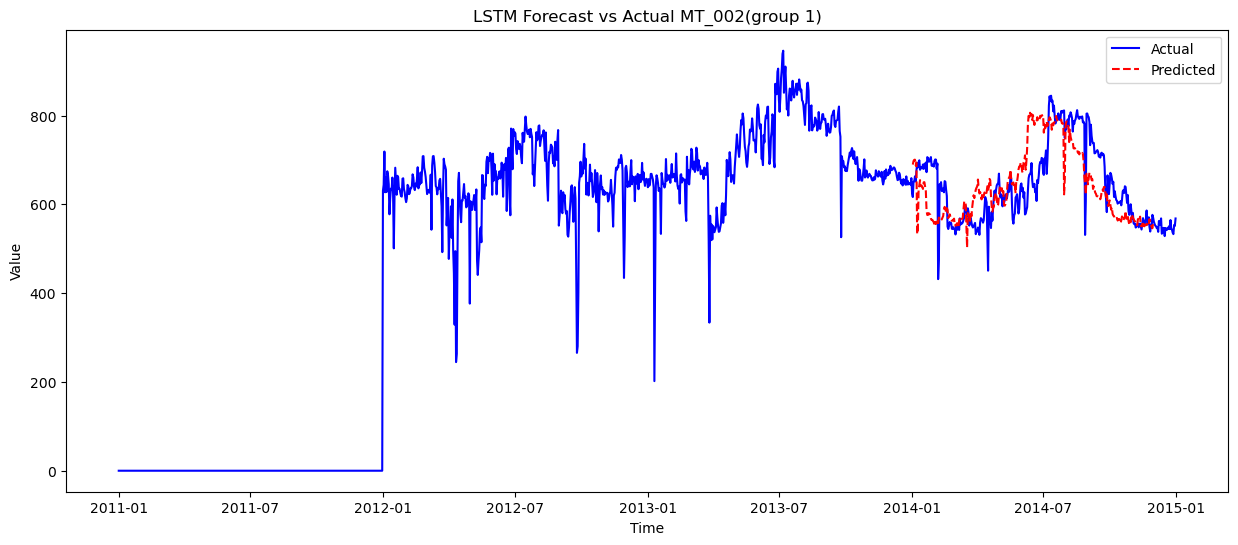

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error

# Load and prepare the data
data = df_per_day
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['MT_002'].values.reshape(-1,1))

# Convert to sequences
def to_sequences(data, seq_size=1):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size), 0]
        x.append(window)
        y.append(data[i+seq_size, 0])

    return np.array(x), np.array(y)

seq_size = 30  # Number of time steps to look back
# Larger sequences (lookback) may improve forecasting
x, y = to_sequences(data_scaled, seq_size)

train_size = 1097
test_size = len(x) - train_size
x_train, x_test = x[0:train_size], x[train_size:len(x)+1]
y_train, y_test = y[0:train_size], y[train_size:len(y)+1]

# Reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], seq_size, 1))
x_test = np.reshape(x_test, (x_test.shape[0], seq_size, 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=2)

# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse transforms
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAPE
mape_value = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100
print(f'MAPE: {mape_value}')

test_indices = range(len(y_train_inv[0]), len(y_train_inv[0]) + len(test_predict))

# Plot actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Actual', color='blue')
plt.plot(data.index[test_indices], test_predict, label='Predicted', color='red', linestyle='--')

plt.title('LSTM Forecast vs Actual MT_002(group 1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [22]:
# Calculate MAPE
y_true = y_test_inv[0]
y_pred = test_predict[:,0]
# first 90 days
group_1_mape_1 = np.mean(np.abs((y_true[:90] - y_pred[:90]) / y_true[:90])) * 100
# second 90 days
group_1_mape_2 = np.mean(np.abs((y_true[90:180] - y_pred[90:180]) / y_true[90:180])) * 100
# third 90 days
group_1_mape_3 = np.mean(np.abs((y_true[180:270] - y_pred[180:270]) / y_true[180:270])) * 100
# fourth 90 days
group_1_mape_4 = np.mean(np.abs((y_true[270:360] - y_pred[270:360]) / y_true[270:360])) * 100
print(f'MAPE: {group_1_mape_1}%')
print(f'MAPE: {group_1_mape_2}%')
print(f'MAPE: {group_1_mape_3}%')
print(f'MAPE: {group_1_mape_4}%')

MAPE: 4.008045435031741%
MAPE: 2.7576213669669882%
MAPE: 2.917843628630097%
MAPE: 2.467126465751471%


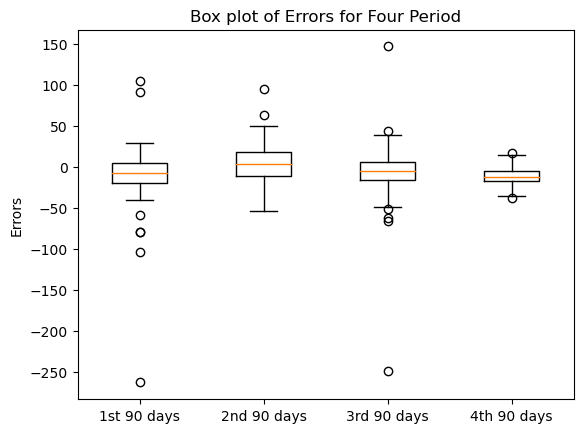

In [23]:
data1 = y_true[:90] - y_pred[:90]
data2 = y_true[90:180] - y_pred[90:180]
data3 = y_true[180:270] - y_pred[180:270]
data4 = y_true[270:360] - y_pred[270:360]

# Combine the data into a list of arrays
data_to_plot = [data1, data2, data3, data4]

# Create the box plot
plt.boxplot(data_to_plot)

# Customize the plot
plt.title('Box plot of Errors for Four Period')
plt.ylabel('Errors')
plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

# Display the plot
plt.show()

### Group 2

Epoch 1/100
18/18 - 2s - loss: 0.0532 - val_loss: 0.0068 - 2s/epoch - 116ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0101 - val_loss: 0.0041 - 325ms/epoch - 18ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0066 - val_loss: 0.0054 - 294ms/epoch - 16ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0054 - val_loss: 0.0032 - 308ms/epoch - 17ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0051 - val_loss: 0.0033 - 244ms/epoch - 14ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0048 - val_loss: 0.0029 - 312ms/epoch - 17ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0046 - val_loss: 0.0032 - 266ms/epoch - 15ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0046 - val_loss: 0.0028 - 287ms/epoch - 16ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0045 - val_loss: 0.0033 - 280ms/epoch - 16ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0046 - val_loss: 0.0027 - 265ms/epoch - 15ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0045 - val_loss: 0.0029 - 268ms/epoch - 15ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0045 - val_loss: 0.0027 - 272ms/epoch - 15ms/step
Epo

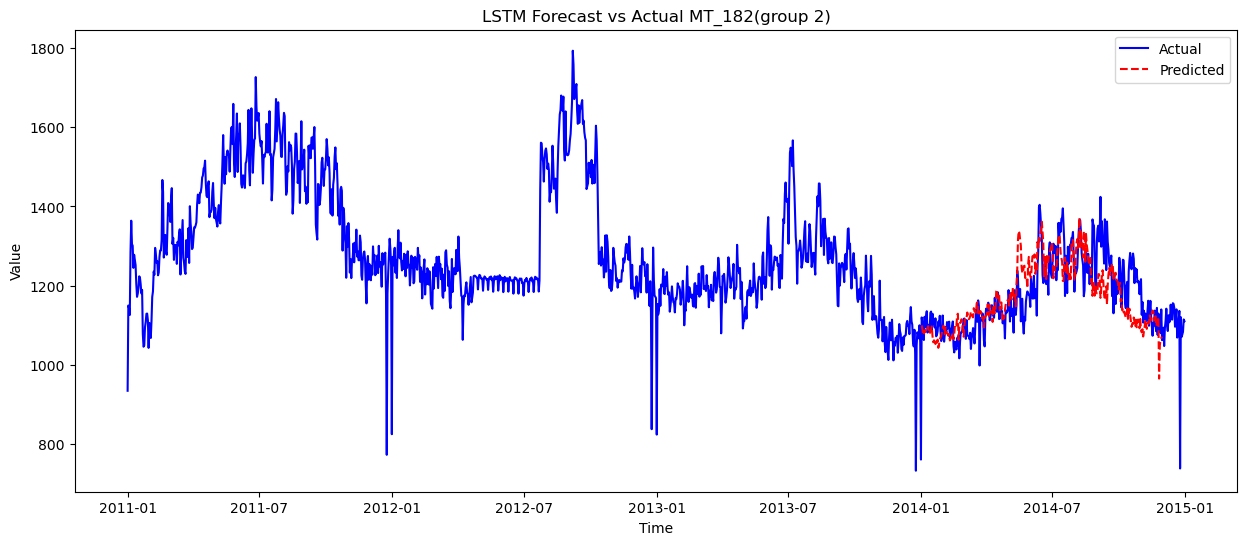

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error

# Load and prepare the data
data = df_per_day.reset_index()
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['MT_182'].values.reshape(-1,1))

# Convert to sequences
def to_sequences(data, seq_size=1):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size), 0]
        x.append(window)
        y.append(data[i+seq_size, 0])

    return np.array(x), np.array(y)

seq_size = 30  # Number of time steps to look back
# Larger sequences (lookback) may improve forecasting
x, y = to_sequences(data_scaled, seq_size)

train_size = 1097
test_size = len(x) - train_size
x_train, x_test = x[0:train_size], x[train_size:len(x)+1]
y_train, y_test = y[0:train_size], y[train_size:len(y)+1]

# Reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], seq_size, 1))
x_test = np.reshape(x_test, (x_test.shape[0], seq_size, 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=2)

# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse transforms
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAPE
mape_value = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100
print(f'MAPE: {mape_value}')

test_indices = range(len(y_train_inv[0]), len(y_train_inv[0]) + len(test_predict))

# Plot actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Actual', color='blue')
plt.plot(data.index[test_indices], test_predict, label='Predicted', color='red', linestyle='--')

plt.title('LSTM Forecast vs Actual MT_182(group 2)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [32]:
# Calculate MAPE
y_true = y_test_inv[0]
y_pred = test_predict[:,0]
# first 90 days
group_1_mape_1 = np.mean(np.abs((y_true[:90] - y_pred[:90]) / y_true[:90])) * 100
# second 90 days
group_1_mape_2 = np.mean(np.abs((y_true[90:180] - y_pred[90:180]) / y_true[90:180])) * 100
# third 90 days
group_1_mape_3 = np.mean(np.abs((y_true[180:270] - y_pred[180:270]) / y_true[180:270])) * 100
# fourth 90 days
group_1_mape_4 = np.mean(np.abs((y_true[270:360] - y_pred[270:360]) / y_true[270:360])) * 100
print(f'MAPE: {group_1_mape_1}%')
print(f'MAPE: {group_1_mape_2}%')
print(f'MAPE: {group_1_mape_3}%')
print(f'MAPE: {group_1_mape_4}%')

MAPE: 1.9910075162389846%
MAPE: 3.0710918741849653%
MAPE: 3.221357562518738%
MAPE: 3.183403323142172%


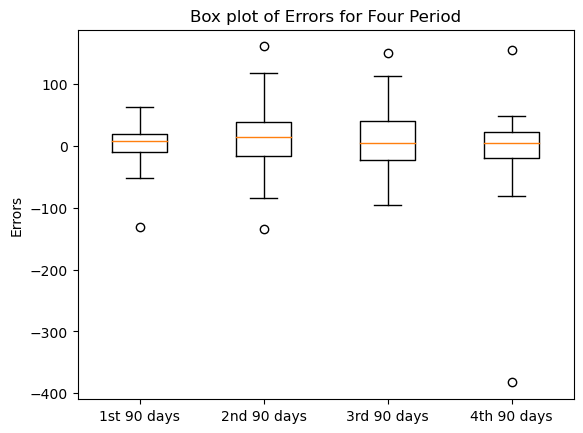

In [33]:
data1 = y_true[:90] - y_pred[:90]
data2 = y_true[90:180] - y_pred[90:180]
data3 = y_true[180:270] - y_pred[180:270]
data4 = y_true[270:360] - y_pred[270:360]

# Combine the data into a list of arrays
data_to_plot = [data1, data2, data3, data4]

# Create the box plot
plt.boxplot(data_to_plot)

# Customize the plot
plt.title('Box plot of Errors for Four Period')
plt.ylabel('Errors')
plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

# Display the plot
plt.show()

### Group 3

Epoch 1/100
18/18 - 3s - loss: 0.0627 - val_loss: 0.0339 - 3s/epoch - 167ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0319 - val_loss: 0.0343 - 235ms/epoch - 13ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0272 - val_loss: 0.0273 - 232ms/epoch - 13ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0255 - val_loss: 0.0261 - 232ms/epoch - 13ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0233 - val_loss: 0.0243 - 232ms/epoch - 13ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0220 - val_loss: 0.0240 - 243ms/epoch - 13ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0212 - val_loss: 0.0233 - 243ms/epoch - 14ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0198 - val_loss: 0.0237 - 246ms/epoch - 14ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0194 - val_loss: 0.0224 - 243ms/epoch - 14ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0182 - val_loss: 0.0228 - 241ms/epoch - 13ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0182 - val_loss: 0.0223 - 245ms/epoch - 14ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0174 - val_loss: 0.0219 - 244ms/epoch - 14ms/step
Epo

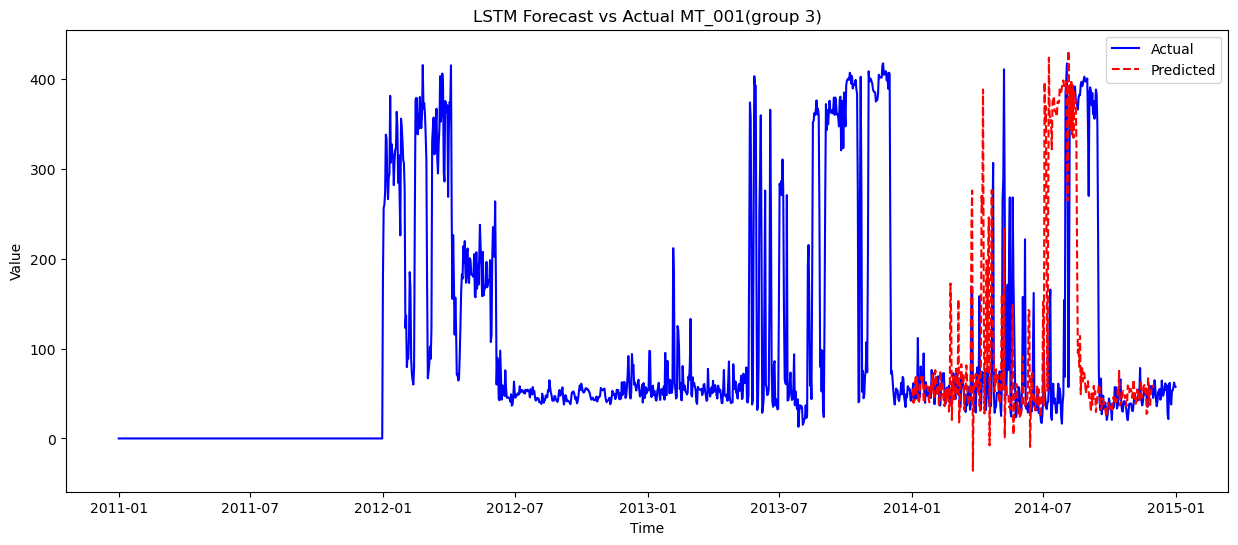

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error

# Load and prepare the data
data = df_per_day.reset_index()
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['MT_001'].values.reshape(-1,1))

# Convert to sequences
def to_sequences(data, seq_size=1):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size), 0]
        x.append(window)
        y.append(data[i+seq_size, 0])

    return np.array(x), np.array(y)

seq_size = 30  # Number of time steps to look back
# Larger sequences (lookback) may improve forecasting
x, y = to_sequences(data_scaled, seq_size)

train_size = 1097
test_size = len(x) - train_size
x_train, x_test = x[0:train_size], x[train_size:len(x)+1]
y_train, y_test = y[0:train_size], y[train_size:len(y)+1]

# Reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], seq_size, 1))
x_test = np.reshape(x_test, (x_test.shape[0], seq_size, 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=2)

# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse transforms
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAPE
mape_value = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0]) * 100
print(f'MAPE: {mape_value}')

test_indices = range(len(y_train_inv[0]), len(y_train_inv[0]) + len(test_predict))

# Plot actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Actual', color='blue')
plt.plot(data.index[test_indices], test_predict, label='Predicted', color='red', linestyle='--')

plt.title('LSTM Forecast vs Actual MT_001(group 3)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [35]:
# Calculate MAPE
y_true = y_test_inv[0]
y_pred = test_predict[:,0]
# first 90 days
group_1_mape_1 = np.mean(np.abs((y_true[:90] - y_pred[:90]) / y_true[:90])) * 100
# second 90 days
group_1_mape_2 = np.mean(np.abs((y_true[90:180] - y_pred[90:180]) / y_true[90:180])) * 100
# third 90 days
group_1_mape_3 = np.mean(np.abs((y_true[180:270] - y_pred[180:270]) / y_true[180:270])) * 100
# fourth 90 days
group_1_mape_4 = np.mean(np.abs((y_true[270:360] - y_pred[270:360]) / y_true[270:360])) * 100
print(f'MAPE: {group_1_mape_1}%')
print(f'MAPE: {group_1_mape_2}%')
print(f'MAPE: {group_1_mape_3}%')
print(f'MAPE: {group_1_mape_4}%')

MAPE: 37.75808145267887%
MAPE: 69.04689211826205%
MAPE: 37.258391722114396%
MAPE: 14.881517835545333%


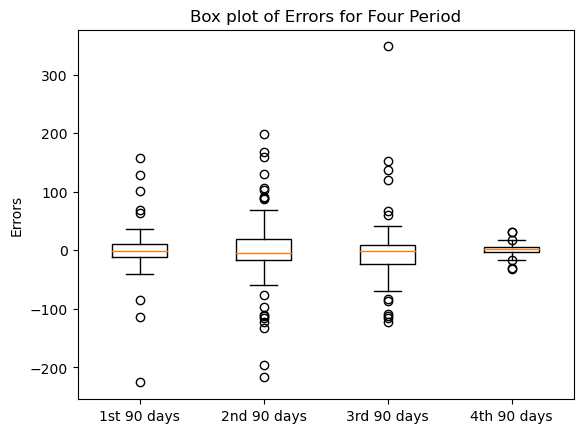

In [36]:
data1 = y_true[:90] - y_pred[:90]
data2 = y_true[90:180] - y_pred[90:180]
data3 = y_true[180:270] - y_pred[180:270]
data4 = y_true[270:360] - y_pred[270:360]

# Combine the data into a list of arrays
data_to_plot = [data1, data2, data3, data4]

# Create the box plot
plt.boxplot(data_to_plot)

# Customize the plot
plt.title('Box plot of Errors for Four Period')
plt.ylabel('Errors')
plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

# Display the plot
plt.show()

## Random Forest Regressor

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = df_per_day

train_size = int(0.7 * len(data))
val_size = int(0.1 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

In [77]:
# Calculate sizes for each part
part_size = len(test_data) // 4

# Split test data into four equal parts
test_parts = [test_data[i*part_size:(i+1)*part_size] for i in range(4)]

# Display the sizes of each part
for i, part in enumerate(test_parts):
    print(f"Size of part {i+1}: {len(part)}")

# Example usage of the parts
part1 = test_parts[0]
part2 = test_parts[1]
part3 = test_parts[2]
part4 = test_parts[3]

Size of part 1: 73
Size of part 2: 73
Size of part 3: 73
Size of part 4: 73


In [78]:
clusters = ['MT_002', 'MT_182', 'MT_001']

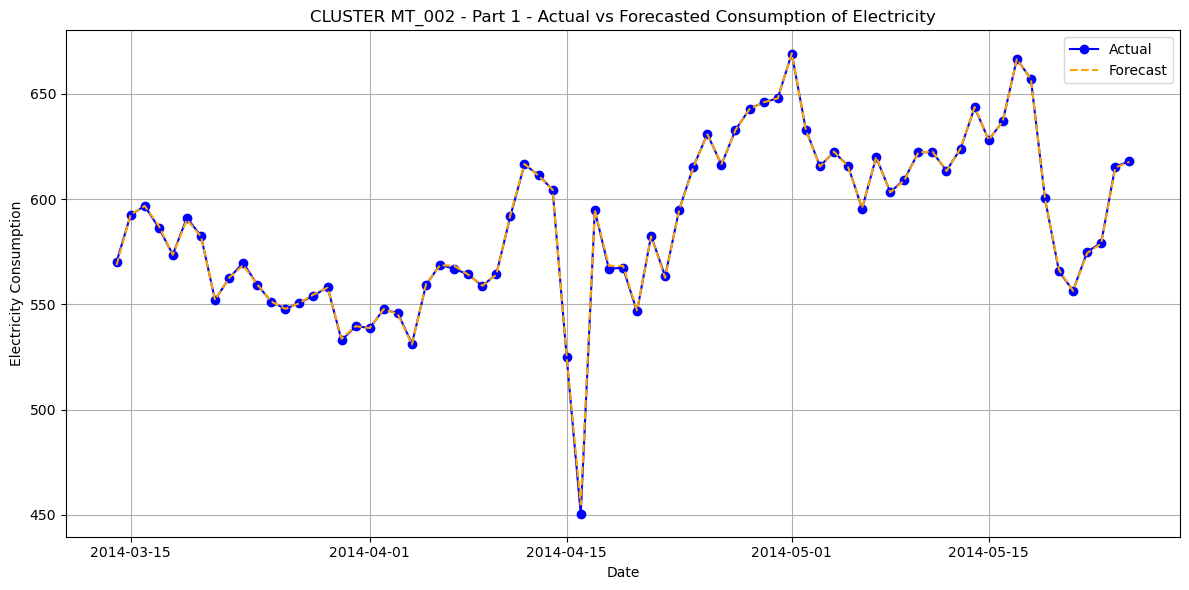

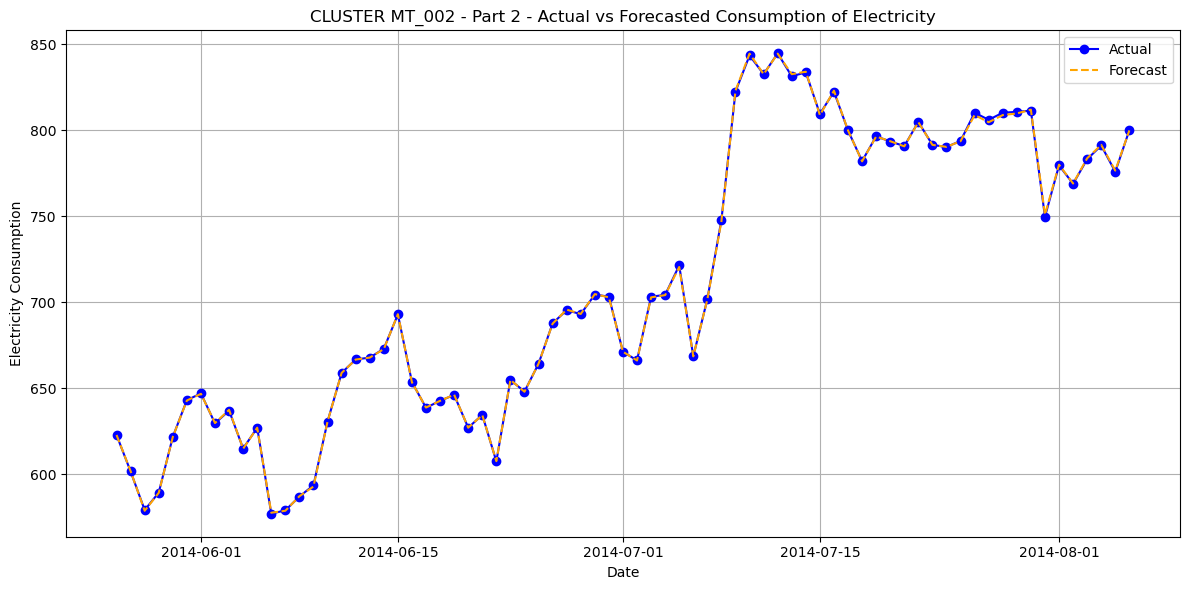

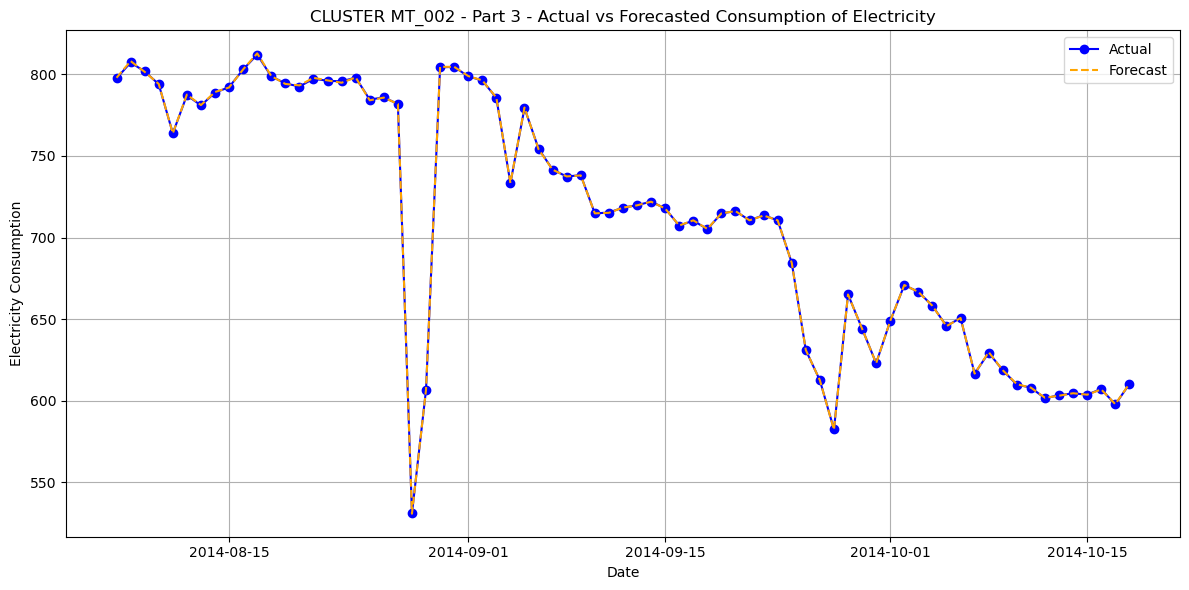

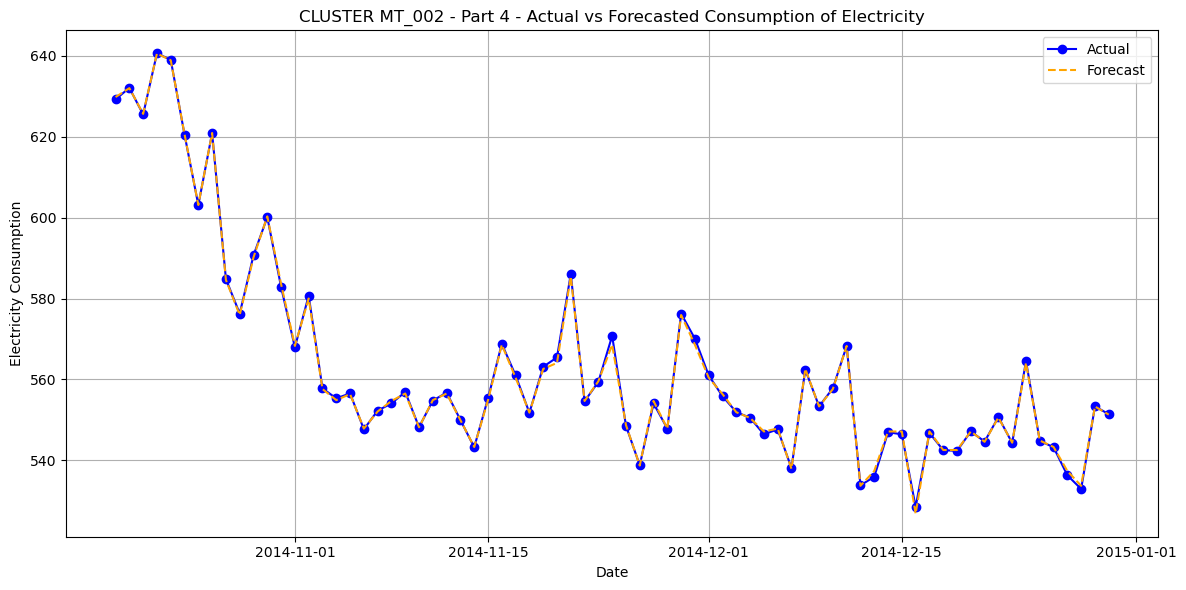

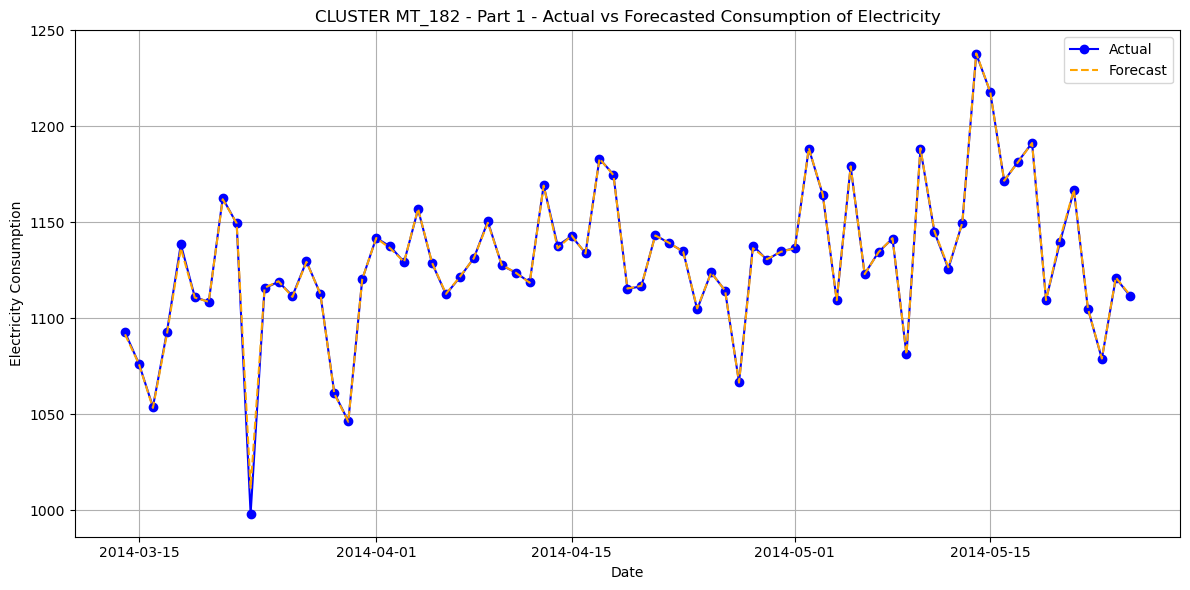

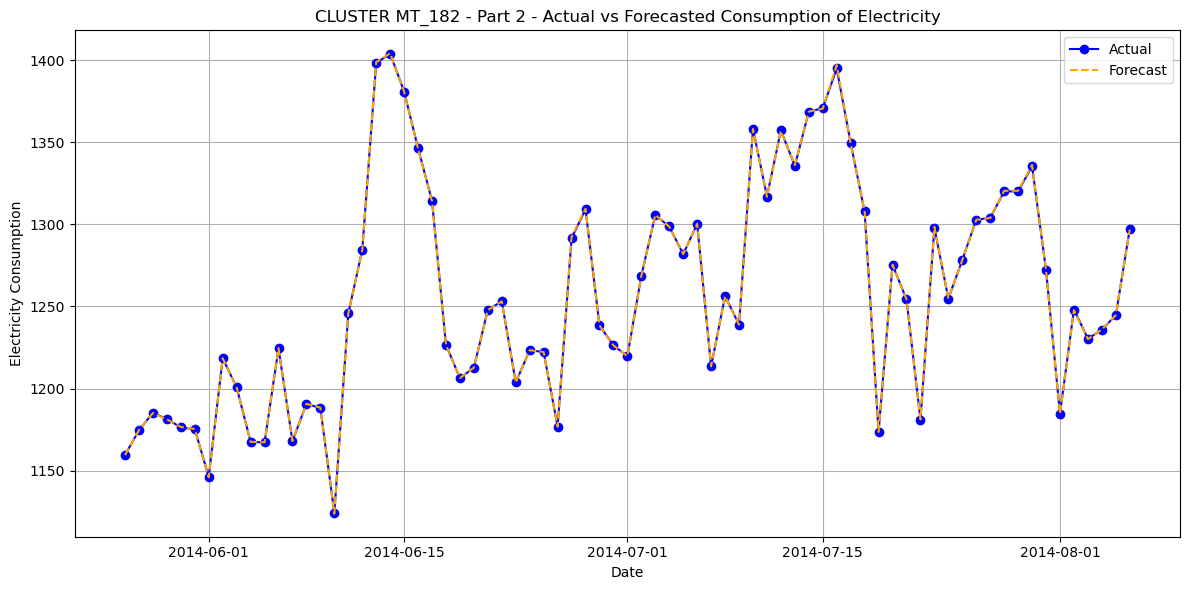

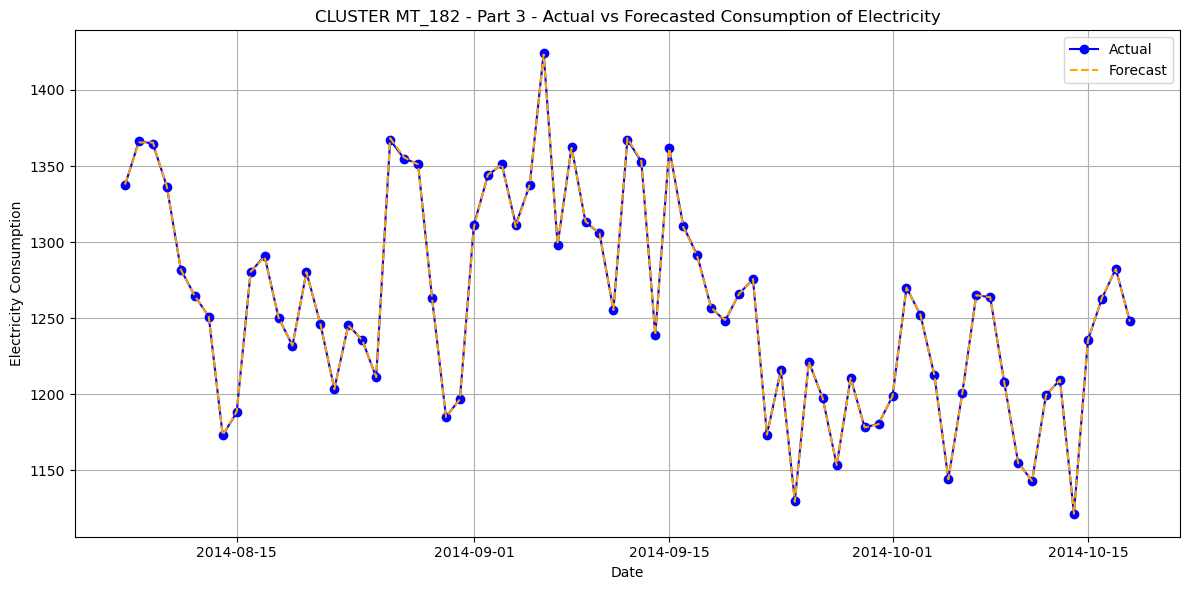

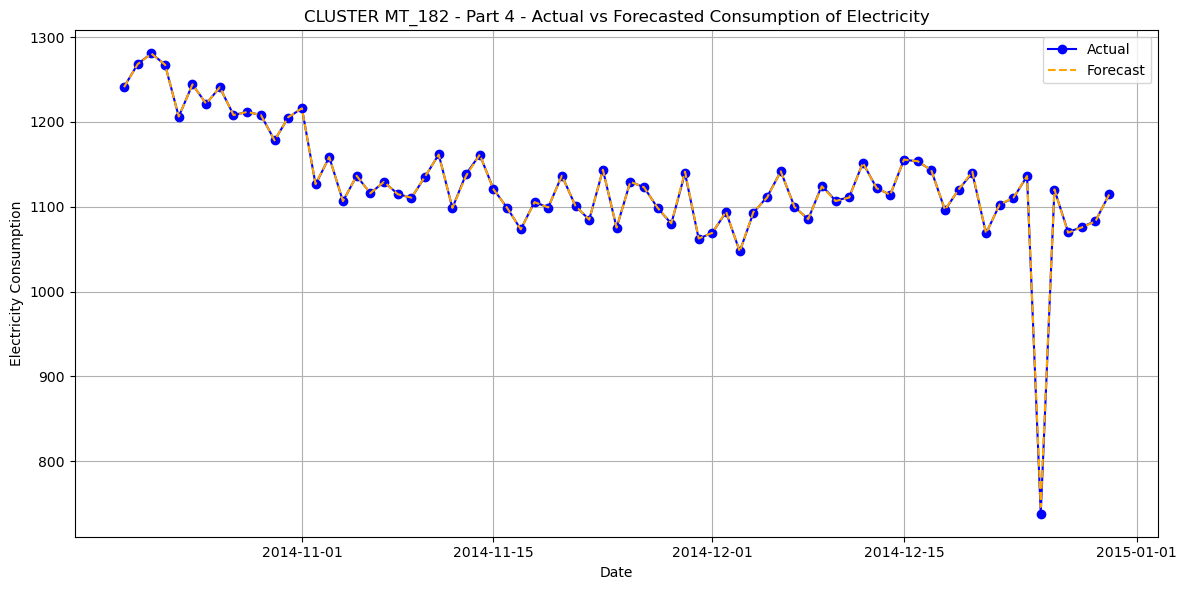

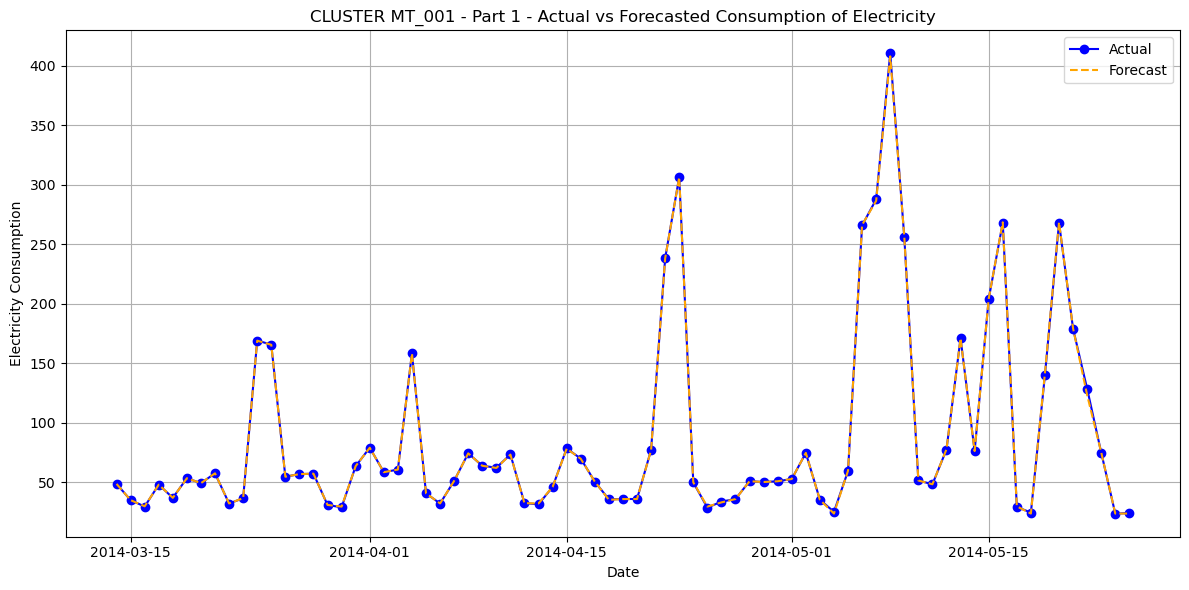

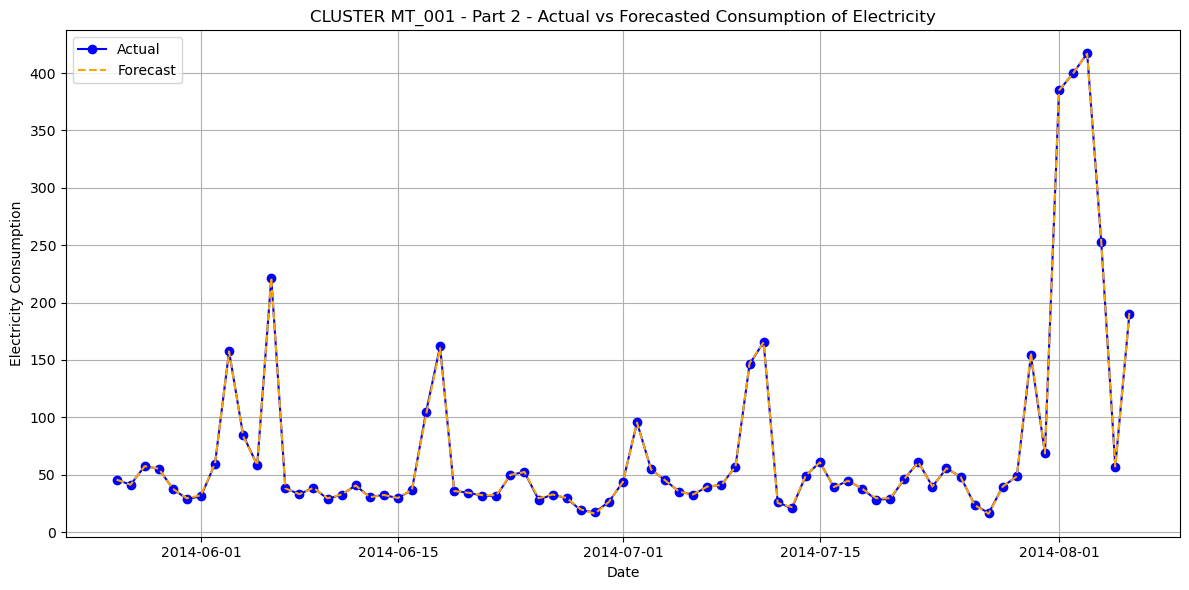

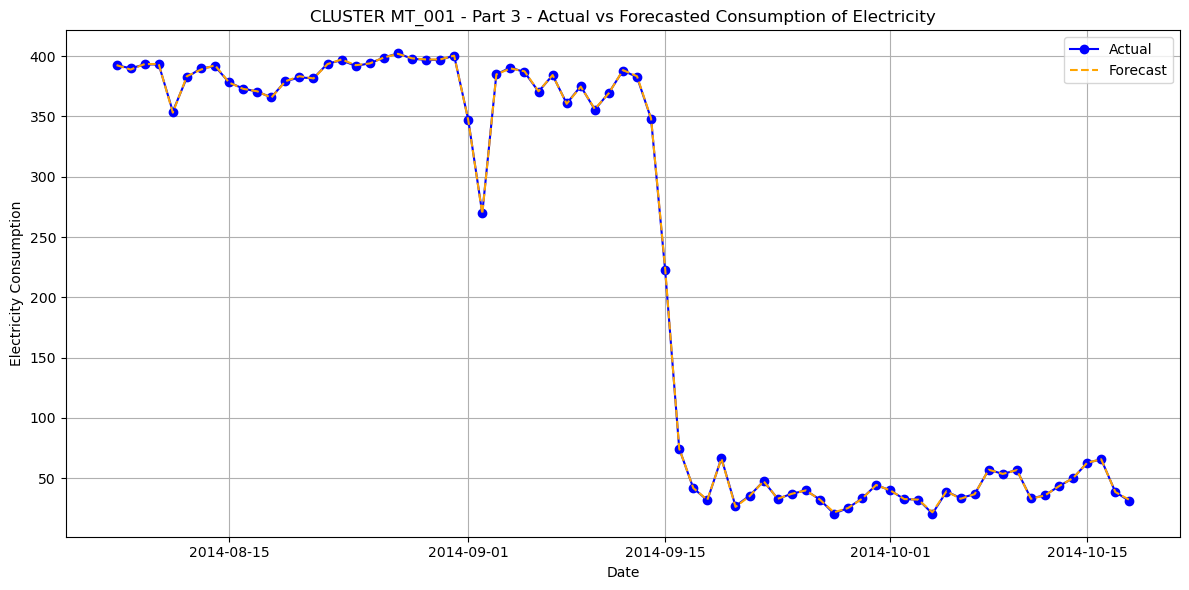

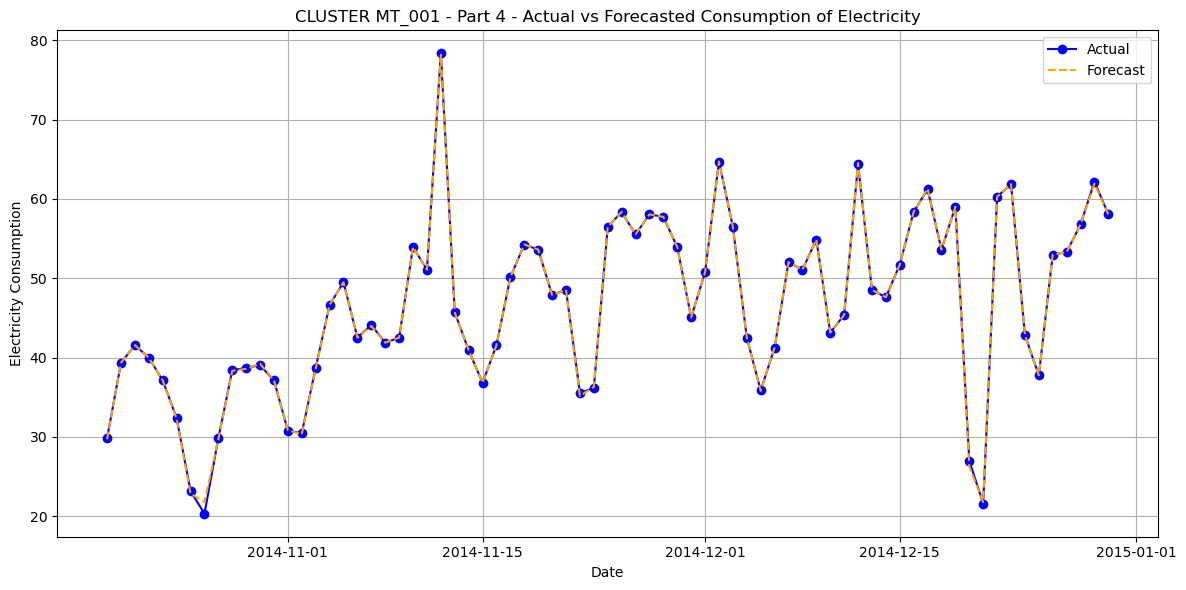

In [79]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Combine training and validation sets
train_val_data = pd.concat([train_data, val_data])

for c in clusters:
    # Prepare features and target variables
    X_train_val = train_val_data[c].values.reshape(-1, 1)
    y_train_val = train_val_data[c].values

    # Train Random Forest model on combined training and validation sets
    model_rf = RandomForestRegressor(n_estimators=5, random_state=42)
    model_rf.fit(X_train_val, y_train_val)

    # Initialize lists to store forecasted values
    forecast_list_rf = []

    # Generate forecasts for each part of the test data
    for part in test_parts:
        # Prepare features for the current part
        X_test = part[c].values.reshape(-1, 1)
        
        # Generate forecast using the trained model
        forecast_rf = model_rf.predict(X_test)
        forecast_list_rf.append(forecast_rf)

    # Plot actual data and forecasted values for each part
    for i, part in enumerate(test_parts):
        plt.figure(figsize=(12, 6))
        plt.plot(part['Time'], part[c], label='Actual', linestyle='-', marker='o', color='blue')
        plt.plot(part['Time'], forecast_list_rf[i], label='Forecast', linestyle='--', color='orange')
        plt.xlabel('Date')
        plt.ylabel('Electricity Consumption')
        plt.title(f'CLUSTER {c} - Part {i+1} - Actual vs Forecasted Consumption of Electricity')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



For CLUSTER MT_002 :
Metrics for Random Forest - Part 1: MAPE = 10.56%
Metrics for Random Forest - Part 2: MAPE = 5.79%
Metrics for Random Forest - Part 3: MAPE = 4.83%
Metrics for Random Forest - Part 4: MAPE = 13.09%


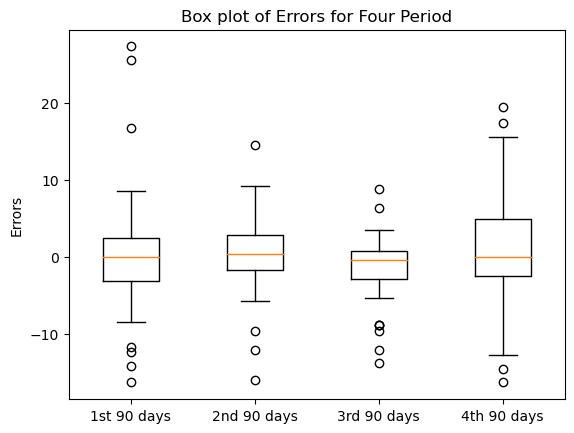



For CLUSTER MT_182 :
Metrics for Random Forest - Part 1: MAPE = 23.97%
Metrics for Random Forest - Part 2: MAPE = 2.37%
Metrics for Random Forest - Part 3: MAPE = 3.07%
Metrics for Random Forest - Part 4: MAPE = 24.22%


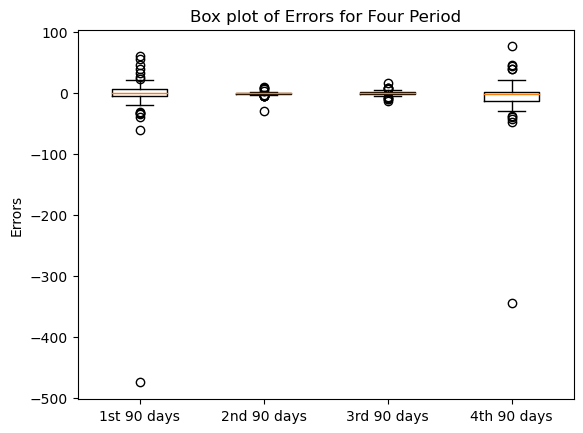



For CLUSTER MT_001 :
Metrics for Random Forest - Part 1: MAPE = 91.31%
Metrics for Random Forest - Part 2: MAPE = 161.15%
Metrics for Random Forest - Part 3: MAPE = 72.00%
Metrics for Random Forest - Part 4: MAPE = 58.20%


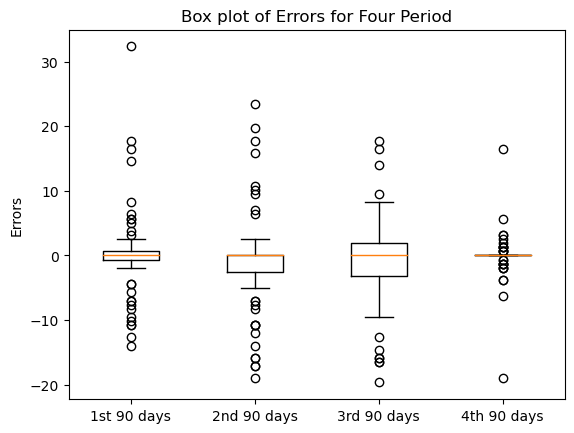

In [110]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define a function to calculate MAPE
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

for c in clusters:
# Initialize lists to store MAPEs, RMSEs, and forecasted values
    mape_list_rf = []
    # rmse_list_rf = []
    forecast_list_rf = []

    data_to_plot = []

    print("\n\nFor CLUSTER", c, ":")
    
    # Train Random Forest models and generate forecasts for each part
    for i, part in enumerate(test_parts):
        # Prepare features and target variables
        X_train = train_data[c].values.reshape(-1, 1)
        y_train = train_data[c].values
        X_test = part[c].values.reshape(-1, 1)
        
        # Train Random Forest model
        model_rf = RandomForestRegressor(n_estimators=5, random_state=42)
        model_rf.fit(X_train, y_train)
        
        # Generate forecast
        forecast_rf = model_rf.predict(X_test)
        forecast_list_rf.append(forecast_rf)
        
        # Calculate MAPE and RMSE
        mape_rf = calculate_mape(part[c], forecast_rf)
        mape_list_rf.append(mape_rf*30)

        data_to_plot.append((part[c] - forecast_rf))

        print(f"Metrics for Random Forest - Part {i+1}: MAPE = {mape_rf:.2f}%")

    # Create the box plot
    plt.boxplot(data_to_plot)

    # Customize the plot
    plt.title('Box plot of Errors for Four Period')
    plt.ylabel('Errors')
    plt.xticks([1, 2, 3, 4], ['1st 90 days', '2nd 90 days', '3rd 90 days', '4th 90 days'])

    # Display the plot
    plt.show()